In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Tabular Q-learning agent (notebook)

This notebooks can be run directly from VSCode, to generate a
traditional Jupyter Notebook to open in your browser
 you can run the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name

'Tabular Q-learning agent (notebook)\n\nThis notebooks can be run directly from VSCode, to generate a\ntraditional Jupyter Notebook to open in your browser\n you can run the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n'

In [2]:
import sys
import logging
from typing import cast
import gym
import numpy as np
import matplotlib.pyplot as plt  # type:ignore
from cyberbattle.agents.baseline.learner import TrainedLearner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_tabularqlearning as a
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
import cyberbattle.agents.baseline.learner as learner
from cyberbattle._env.cyberbattle_env import AttackerGoal

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
# Benchmark parameters:
#   Parameters from DeepDoubleQ paper
#    - learning_rate = 0.00025
#    - linear epsilon decay
#    - gamma = 0.99
#   Eliminated gamma_values
#       0.0,
#       0.0015,  # too small
#       0.15,  # too big
#       0.25,  # too big
#       0.35,  # too big
#
# NOTE: Given the relatively low number of training episodes (50,
# a high learning rate of .99 gives better result
# than a lower learning rate of 0.25 (i.e. maximal rewards reached faster on average).
# Ideally we should decay the learning rate just like gamma and train over a
# much larger number of episodes

cyberbattlechain_10 = gym.make('CyberBattleChain-v0', size=10, attacker_goal=AttackerGoal(own_atleast_percent=1.0))


ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=12,
    maximum_total_credentials=12,
    identifiers=cyberbattlechain_10.identifiers
)

iteration_count = 9000
training_episode_count = 5
eval_episode_count = 5
gamma_sweep = [
    0.015,  # about right
]


def qlearning_run(gamma, gym_env):
    """Execute one run of the q-learning algorithm for the
    specified gamma value"""
    return learner.epsilon_greedy_search(
        gym_env,
        ep,
        a.QTabularLearner(ep, gamma=gamma, learning_rate=0.90, exploit_percentile=100),
        episode_count=training_episode_count,
        iteration_count=iteration_count,
        epsilon=0.90,
        render=False,
        epsilon_multdecay=0.75,  # 0.999,
        epsilon_minimum=0.01,
        verbosity=Verbosity.Quiet,
        title="Q-learning"
    )

###### Q-learning
Learning with: episode_count=5,iteration_count=9000,ϵ=0.9,ϵ_min=0.01, ϵ_multdecay=0.75,γ=0.015,learning_rate=0.9,Q%=100
  ## Episode: 1/5 'Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.9,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:    9.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  109.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  109.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  111.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  111.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  113.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  113.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  119.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  119.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  127.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  127.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:  133.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:  133.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  142.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  142.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 85|reward:  242.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 85|reward:  242.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  251.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  251.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 104|reward:  351.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 104|reward:  351.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 1|Iteration 107|reward:  353.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 1|Iteration 107|reward:  353.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 1|Iteration 121|reward:  362.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 1|Iteration 121|reward:  362.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 1|Iteration 124|reward:  462.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 1|Iteration 124|reward:  462.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 1|Iteration 130|reward:  468.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 1|Iteration 130|reward:  468.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 1|Iteration 133|reward:  474.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 1|Iteration 133|reward:  474.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 1|Iteration 152|reward:  480.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 1|Iteration 152|reward:  480.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 1|Iteration 174|reward:  486.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 1|Iteration 174|reward:  486.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 1|Iteration 195|reward:  492.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 1|Iteration 195|reward:  492.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 1|Iteration 207|reward:  494.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 1|Iteration 207|reward:  494.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 1|Iteration 223|reward:  498.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 1|Iteration 223|reward:  498.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 1|Iteration 224|reward:  507.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 1|Iteration 224|reward:  507.0|last_reward_at:  224|Elapsed Time: 0:00:00||

Episode 1|Iteration 232|reward:  607.0|last_reward_at:  224|Elapsed Time: 0:00:00||

Episode 1|Iteration 232|reward:  607.0|last_reward_at:  232|Elapsed Time: 0:00:00||

Episode 1|Iteration 260|reward:  613.0|last_reward_at:  232|Elapsed Time: 0:00:00||

Episode 1|Iteration 260|reward:  613.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 1|Iteration 282|reward:  615.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 1|Iteration 282|reward:  615.0|last_reward_at:  282|Elapsed Time: 0:00:00||

Episode 1|Iteration 300|reward:  624.0|last_reward_at:  282|Elapsed Time: 0:00:00||

Episode 1|Iteration 300|reward:  624.0|last_reward_at:  300|Elapsed Time: 0:00:00||

Episode 1|Iteration 304|reward:  632.0|last_reward_at:  300|Elapsed Time: 0:00:00||

Episode 1|Iteration 304|reward:  632.0|last_reward_at:  304|Elapsed Time: 0:00:00||

Episode 1|Iteration 314|reward:  732.0|last_reward_at:  304|Elapsed Time: 0:00:00||

Episode 1|Iteration 314|reward:  732.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 1|Iteration 342|reward:  732.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 1|Iteration 360|reward:  738.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 1|Iteration 360|reward:  738.0|last_reward_at:  360|Elapsed Time: 0:00:01||

Episode 1|Iteration 381|reward:  740.0|last_reward_at:  360|Elapsed Time: 0:00:01||

Episode 1|Iteration 381|reward:  740.0|last_reward_at:  381|Elapsed Time: 0:00:01||

Episode 1|Iteration 390|reward:  746.0|last_reward_at:  381|Elapsed Time: 0:00:01||

Episode 1|Iteration 390|reward:  746.0|last_reward_at:  390|Elapsed Time: 0:00:01||

Episode 1|Iteration 392|reward:  755.0|last_reward_at:  390|Elapsed Time: 0:00:01||

Episode 1|Iteration 392|reward:  755.0|last_reward_at:  392|Elapsed Time: 0:00:01||

Episode 1|Iteration 397|reward:  855.0|last_reward_at:  392|Elapsed Time: 0:00:01||

Episode 1|Iteration 397|reward:  855.0|last_reward_at:  397|Elapsed Time: 0:00:01||

Episode 1|Iteration 404|reward:  861.0|last_reward_at:  397|Elapsed Time: 0:00:01||

Episode 1|Iteration 404|reward:  861.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 1|Iteration 413|reward:  867.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 1|Iteration 413|reward:  867.0|last_reward_at:  413|Elapsed Time: 0:00:01||

Episode 1|Iteration 430|reward:  875.0|last_reward_at:  413|Elapsed Time: 0:00:01||

Episode 1|Iteration 430|reward:  875.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 1|Iteration 456|reward:  875.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 1|Iteration 463|reward:  884.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 1|Iteration 463|reward:  884.0|last_reward_at:  463|Elapsed Time: 0:00:01||

Episode 1|Iteration 468|reward:  886.0|last_reward_at:  463|Elapsed Time: 0:00:01||

Episode 1|Iteration 468|reward:  886.0|last_reward_at:  468|Elapsed Time: 0:00:01||

Episode 1|Iteration 483|reward:  986.0|last_reward_at:  468|Elapsed Time: 0:00:01||

Episode 1|Iteration 483|reward:  986.0|last_reward_at:  483|Elapsed Time: 0:00:01||

Episode 1|Iteration 505|reward:  986.0|last_reward_at:  483|Elapsed Time: 0:00:01||

Episode 1|Iteration 534|reward:  986.0|last_reward_at:  483|Elapsed Time: 0:00:01||

Episode 1|Iteration 563|reward:  986.0|last_reward_at:  483|Elapsed Time: 0:00:01||

Episode 1|Iteration 592|reward:  986.0|last_reward_at:  483|Elapsed Time: 0:00:01||

Episode 1|Iteration 620|reward:  986.0|last_reward_at:  483|Elapsed Time: 0:00:01||

Episode 1|Iteration 648|reward:  986.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 1|Iteration 673|reward:  986.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 1|Iteration 697|reward:  986.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 1|Iteration 723|reward:  986.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 1|Iteration 750|reward:  986.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 1|Iteration 779|reward:  986.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 1|Iteration 798|reward:  986.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 1|Iteration 822|reward:  986.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 1|Iteration 848|reward:  986.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 1|Iteration 877|reward:  986.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 1|Iteration 889|reward:  995.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 1|Iteration 889|reward:  995.0|last_reward_at:  889|Elapsed Time: 0:00:02||

Episode 1|Iteration 893|reward: 1001.0|last_reward_at:  889|Elapsed Time: 0:00:03||

Episode 1|Iteration 893|reward: 1001.0|last_reward_at:  893|Elapsed Time: 0:00:03||

Episode 1|Iteration 901|reward: 1101.0|last_reward_at:  893|Elapsed Time: 0:00:03||

Episode 1|Iteration 901|reward: 1101.0|last_reward_at:  901|Elapsed Time: 0:00:03||

Episode 1|Iteration 915|reward: 1103.0|last_reward_at:  901|Elapsed Time: 0:00:03||

Episode 1|Iteration 915|reward: 1103.0|last_reward_at:  915|Elapsed Time: 0:00:03||

Episode 1|Iteration 941|reward: 1103.0|last_reward_at:  915|Elapsed Time: 0:00:03||

Episode 1|Iteration 951|reward: 1109.0|last_reward_at:  915|Elapsed Time: 0:00:03||

Episode 1|Iteration 951|reward: 1109.0|last_reward_at:  951|Elapsed Time: 0:00:03||

Episode 1|Iteration 962|reward: 1111.0|last_reward_at:  951|Elapsed Time: 0:00:03||

Episode 1|Iteration 962|reward: 1111.0|last_reward_at:  962|Elapsed Time: 0:00:03||

Episode 1|Iteration 986|reward: 1111.0|last_reward_at:  962|Elapsed Time: 0:00:03||

Episode 1|Iteration 987|reward: 1117.0|last_reward_at:  962|Elapsed Time: 0:00:03||

Episode 1|Iteration 987|reward: 1117.0|last_reward_at:  987|Elapsed Time: 0:00:03||

Episode 1|Iteration 1013|reward: 1117.0|last_reward_at:  987|Elapsed Time: 0:00:03||

Episode 1|Iteration 1034|reward: 1126.0|last_reward_at:  987|Elapsed Time: 0:00:03||

Episode 1|Iteration 1034|reward: 1126.0|last_reward_at: 1034|Elapsed Time: 0:00:03||

Episode 1|Iteration 1038|reward: 1226.0|last_reward_at: 1034|Elapsed Time: 0:00:03||

Episode 1|Iteration 1038|reward: 1226.0|last_reward_at: 1038|Elapsed Time: 0:00:03||

Episode 1|Iteration 1061|reward: 1226.0|last_reward_at: 1038|Elapsed Time: 0:00:03||

Episode 1|Iteration 1075|reward: 1232.0|last_reward_at: 1038|Elapsed Time: 0:00:03||

Episode 1|Iteration 1075|reward: 1232.0|last_reward_at: 1075|Elapsed Time: 0:00:03||

Episode 1|Iteration 1095|reward: 1241.0|last_reward_at: 1075|Elapsed Time: 0:00:03||

Episode 1|Iteration 1095|reward: 1241.0|last_reward_at: 1095|Elapsed Time: 0:00:03||

Episode 1|Iteration 1097|reward: 6241.0|last_reward_at: 1095|Elapsed Time: 0:00:03||

Episode 1|Iteration 1097|reward: 6241.0|last_reward_at: 1097|Elapsed Time: 0:00:03||

  Episode 1 ended at t=1097 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/268 (0.07)
    explore-remote: 20/346 (0.05)
    explore-connect: 0/400 (0.00)
    exploit-local: 1/11 (0.08)
    exploit-remote: 0/21 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 50
  ## Episode: 2/5 'Q-learning' ϵ=0.6750, γ=0.015,learning_rate=0.9,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  109.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  126.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  126.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  226.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  226.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  235.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  235.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  241.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  241.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  245.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  245.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  247.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  247.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  347.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  347.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  353.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  353.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:  355.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:  355.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward:  364.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward:  364.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  464.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  464.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  470.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  470.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 52|reward:  476.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 52|reward:  476.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  478.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  478.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 69|reward:  484.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 69|reward:  484.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 2|Iteration 70|reward:  493.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 2|Iteration 70|reward:  493.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 2|Iteration 80|reward:  593.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 2|Iteration 80|reward:  593.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 2|Iteration 109|reward:  593.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  602.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  602.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 2|Iteration 115|reward:  702.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 2|Iteration 115|reward:  702.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 2|Iteration 128|reward:  708.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 2|Iteration 128|reward:  708.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 2|Iteration 129|reward:  717.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 2|Iteration 129|reward:  717.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 2|Iteration 132|reward:  817.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 2|Iteration 132|reward:  817.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 2|Iteration 136|reward:  826.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 2|Iteration 136|reward:  826.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 2|Iteration 137|reward:  926.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 2|Iteration 137|reward:  926.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 2|Iteration 141|reward:  928.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 2|Iteration 141|reward:  928.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 2|Iteration 147|reward:  934.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 2|Iteration 147|reward:  934.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 2|Iteration 154|reward:  940.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 2|Iteration 154|reward:  940.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 2|Iteration 158|reward:  949.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 2|Iteration 158|reward:  949.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 2|Iteration 159|reward: 1049.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 2|Iteration 159|reward: 1049.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 2|Iteration 162|reward: 1055.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 2|Iteration 162|reward: 1055.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 2|Iteration 165|reward: 1061.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 2|Iteration 165|reward: 1061.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 2|Iteration 166|reward: 1063.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 2|Iteration 166|reward: 1063.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 2|Iteration 173|reward: 1065.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 2|Iteration 173|reward: 1065.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 2|Iteration 174|reward: 1074.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 2|Iteration 174|reward: 1074.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 2|Iteration 175|reward: 1174.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 2|Iteration 175|reward: 1174.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 2|Iteration 190|reward: 1176.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 2|Iteration 190|reward: 1176.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 2|Iteration 200|reward: 1178.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 2|Iteration 200|reward: 1178.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 2|Iteration 211|reward: 1184.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 2|Iteration 211|reward: 1184.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 2|Iteration 220|reward: 1190.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 2|Iteration 220|reward: 1190.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 2|Iteration 229|reward: 1199.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 2|Iteration 229|reward: 1199.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 2|Iteration 232|reward: 6199.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 2|Iteration 232|reward: 6199.0|last_reward_at:  232|Elapsed Time: 0:00:00||

  Episode 2 ended at t=232 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/35 (0.12)
    explore-remote: 16/64 (0.20)
    explore-connect: 0/67 (0.00)
    exploit-local: 10/13 (0.43)
    exploit-remote: 2/9 (0.18)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 35
  ## Episode: 3/5 'Q-learning' ϵ=0.5063, γ=0.015,learning_rate=0.9,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  109.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  118.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  218.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  218.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  227.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  227.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  327.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  327.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  333.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  333.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  335.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  335.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  337.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  337.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  339.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  339.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  345.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  345.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  351.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  351.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  360.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  360.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  460.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  460.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  466.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  466.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  472.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  472.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  474.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  474.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 66|reward:  478.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 66|reward:  478.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 3|Iteration 71|reward:  484.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 3|Iteration 71|reward:  484.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 3|Iteration 75|reward:  490.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 3|Iteration 75|reward:  490.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 88|reward:  492.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 88|reward:  492.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  492.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 3|Iteration 115|reward:  498.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 3|Iteration 115|reward:  498.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 3|Iteration 147|reward:  498.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 3|Iteration 168|reward:  507.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 3|Iteration 168|reward:  507.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 3|Iteration 170|reward:  607.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 3|Iteration 170|reward:  607.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 3|Iteration 176|reward:  616.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 3|Iteration 176|reward:  616.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 3|Iteration 178|reward:  716.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 3|Iteration 178|reward:  716.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 3|Iteration 187|reward:  722.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 3|Iteration 187|reward:  722.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 3|Iteration 191|reward:  731.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 3|Iteration 191|reward:  731.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 3|Iteration 192|reward:  831.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 3|Iteration 192|reward:  831.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 3|Iteration 200|reward:  837.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 3|Iteration 200|reward:  837.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 3|Iteration 203|reward:  839.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 3|Iteration 203|reward:  839.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 3|Iteration 207|reward:  845.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 3|Iteration 207|reward:  845.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 3|Iteration 209|reward:  854.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 3|Iteration 209|reward:  854.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 3|Iteration 210|reward:  954.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 3|Iteration 210|reward:  954.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 3|Iteration 212|reward:  960.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 3|Iteration 212|reward:  960.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 3|Iteration 217|reward:  966.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 3|Iteration 217|reward:  966.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 3|Iteration 221|reward:  972.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 3|Iteration 221|reward:  972.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 3|Iteration 226|reward:  974.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 3|Iteration 226|reward:  974.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  976.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  976.0|last_reward_at:  228|Elapsed Time: 0:00:00||

Episode 3|Iteration 235|reward:  982.0|last_reward_at:  228|Elapsed Time: 0:00:00||

Episode 3|Iteration 235|reward:  982.0|last_reward_at:  235|Elapsed Time: 0:00:00||

Episode 3|Iteration 255|reward:  986.0|last_reward_at:  235|Elapsed Time: 0:00:00||

Episode 3|Iteration 255|reward:  986.0|last_reward_at:  255|Elapsed Time: 0:00:00||

Episode 3|Iteration 265|reward:  992.0|last_reward_at:  255|Elapsed Time: 0:00:00||

Episode 3|Iteration 265|reward:  992.0|last_reward_at:  265|Elapsed Time: 0:00:00||

Episode 3|Iteration 273|reward: 1001.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 3|Iteration 273|reward: 1001.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 3|Iteration 274|reward: 1101.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 3|Iteration 274|reward: 1101.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 3|Iteration 295|reward: 1101.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 3|Iteration 300|reward: 1110.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 3|Iteration 300|reward: 1110.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 3|Iteration 303|reward: 1210.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 3|Iteration 303|reward: 1210.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 3|Iteration 304|reward: 1216.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 3|Iteration 304|reward: 1216.0|last_reward_at:  304|Elapsed Time: 0:00:01||

Episode 3|Iteration 327|reward: 1222.0|last_reward_at:  304|Elapsed Time: 0:00:01||

Episode 3|Iteration 327|reward: 1222.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 3|Iteration 342|reward: 1222.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 3|Iteration 363|reward: 1222.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 3|Iteration 373|reward: 1231.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 3|Iteration 373|reward: 1231.0|last_reward_at:  373|Elapsed Time: 0:00:01||

Episode 3|Iteration 374|reward: 6231.0|last_reward_at:  373|Elapsed Time: 0:00:01||

Episode 3|Iteration 374|reward: 6231.0|last_reward_at:  374|Elapsed Time: 0:00:01||

  Episode 3 ended at t=374 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/65 (0.08)
    explore-remote: 13/94 (0.12)
    explore-connect: 0/84 (0.00)
    exploit-local: 14/30 (0.32)
    exploit-remote: 6/51 (0.11)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 79
  ## Episode: 4/5 'Q-learning' ϵ=0.3797, γ=0.015,learning_rate=0.9,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  218.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  227.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  227.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  327.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  327.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  333.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  333.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  335.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  335.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  344.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  344.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  444.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  444.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  450.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  450.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  456.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  456.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  458.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  458.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  464.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  464.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  468.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  468.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  474.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  474.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  480.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  480.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  482.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  482.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  488.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  488.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 49|reward:  490.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 49|reward:  490.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward:  496.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward:  496.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  505.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  505.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 77|reward:  605.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 77|reward:  605.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 4|Iteration 91|reward:  607.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 4|Iteration 91|reward:  607.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 4|Iteration 109|reward:  616.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 4|Iteration 109|reward:  616.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 4|Iteration 110|reward:  716.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 4|Iteration 110|reward:  716.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  722.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  722.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 4|Iteration 125|reward:  731.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 4|Iteration 125|reward:  731.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 4|Iteration 126|reward:  831.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 4|Iteration 126|reward:  831.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 4|Iteration 136|reward:  837.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 4|Iteration 136|reward:  837.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 4|Iteration 139|reward:  839.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 4|Iteration 139|reward:  839.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 4|Iteration 149|reward:  845.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 4|Iteration 149|reward:  845.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 4|Iteration 153|reward:  854.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 4|Iteration 153|reward:  854.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 4|Iteration 154|reward:  954.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 4|Iteration 154|reward:  954.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 4|Iteration 156|reward:  960.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 4|Iteration 156|reward:  960.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 4|Iteration 170|reward:  966.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 4|Iteration 170|reward:  966.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 4|Iteration 176|reward:  972.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 4|Iteration 176|reward:  972.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 4|Iteration 186|reward:  978.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 4|Iteration 186|reward:  978.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 4|Iteration 189|reward:  980.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 4|Iteration 189|reward:  980.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 4|Iteration 193|reward:  989.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 4|Iteration 193|reward:  989.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 4|Iteration 195|reward: 1089.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 4|Iteration 195|reward: 1089.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 4|Iteration 202|reward: 1091.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 4|Iteration 202|reward: 1091.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 4|Iteration 226|reward: 1091.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 4|Iteration 237|reward: 1097.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 4|Iteration 237|reward: 1097.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 4|Iteration 246|reward: 1106.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 4|Iteration 246|reward: 1106.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 4|Iteration 247|reward: 1206.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 4|Iteration 247|reward: 1206.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 4|Iteration 270|reward: 1206.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 4|Iteration 277|reward: 1215.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 4|Iteration 277|reward: 1215.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 4|Iteration 278|reward: 6215.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 4|Iteration 278|reward: 6215.0|last_reward_at:  278|Elapsed Time: 0:00:01||

  Episode 4 ended at t=278 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/54 (0.11)
    explore-remote: 13/51 (0.20)
    explore-connect: 0/55 (0.00)
    exploit-local: 12/31 (0.28)
    exploit-remote: 4/40 (0.09)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 66
  ## Episode: 5/5 'Q-learning' ϵ=0.2848, γ=0.015,learning_rate=0.9,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  227.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  327.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  333.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  342.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  442.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  442.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  448.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  448.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  454.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  454.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  460.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  460.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  466.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  466.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  468.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  468.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  470.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  470.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 49|reward:  474.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 49|reward:  474.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 5|Iteration 50|reward:  483.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 5|Iteration 50|reward:  483.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  583.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  583.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 56|reward:  585.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 56|reward:  585.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 5|Iteration 61|reward:  594.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 5|Iteration 61|reward:  594.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 5|Iteration 62|reward:  694.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 5|Iteration 62|reward:  694.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  703.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  703.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 69|reward:  803.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 69|reward:  803.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 76|reward:  805.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 76|reward:  805.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 5|Iteration 79|reward:  814.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 5|Iteration 79|reward:  814.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 5|Iteration 80|reward:  914.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 5|Iteration 80|reward:  914.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 5|Iteration 83|reward:  920.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 5|Iteration 83|reward:  920.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 5|Iteration 84|reward:  926.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 5|Iteration 84|reward:  926.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 5|Iteration 87|reward:  932.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 5|Iteration 87|reward:  932.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 5|Iteration 88|reward:  941.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 5|Iteration 88|reward:  941.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 5|Iteration 89|reward: 1041.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 5|Iteration 89|reward: 1041.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 5|Iteration 90|reward: 1047.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 5|Iteration 90|reward: 1047.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 5|Iteration 92|reward: 1056.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 5|Iteration 92|reward: 1056.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 5|Iteration 93|reward: 1156.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 5|Iteration 93|reward: 1156.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 5|Iteration 95|reward: 1158.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 5|Iteration 95|reward: 1158.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 5|Iteration 96|reward: 1160.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 5|Iteration 96|reward: 1160.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 5|Iteration 103|reward: 1162.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 5|Iteration 103|reward: 1162.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 5|Iteration 104|reward: 1171.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 5|Iteration 104|reward: 1171.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 5|Iteration 105|reward: 6171.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 5|Iteration 105|reward: 6171.0|last_reward_at:  105|Elapsed Time: 0:00:00||

  Episode 5 ended at t=105 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/21 (0.22)
    explore-remote: 6/10 (0.38)
    explore-connect: 0/19 (0.00)
    exploit-local: 10/7 (0.59)
    exploit-remote: 6/9 (0.40)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 34
simulation ended


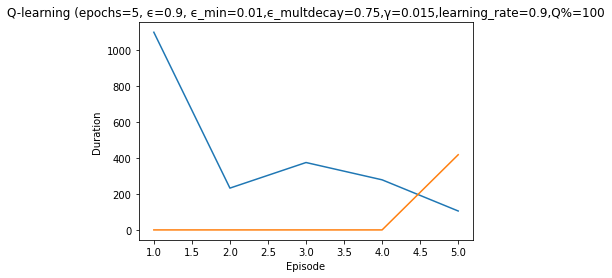

In [4]:
# Run Q-learning with gamma-sweep
qlearning_results = [qlearning_run(gamma, cyberbattlechain_10) for gamma in gamma_sweep]

qlearning_bestrun_10 = qlearning_results[0]

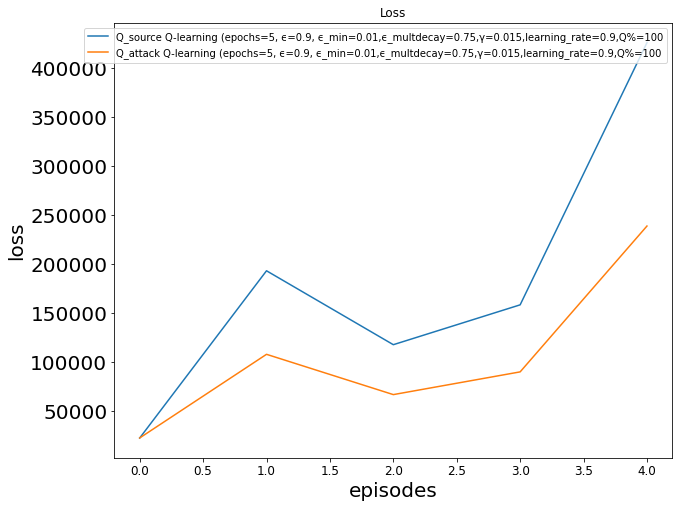

In [5]:

p.new_plot_loss()
for results in qlearning_results:
    p.plot_all_episodes_loss(cast(a.QTabularLearner, results['learner']).loss_qsource.all_episodes, 'Q_source', results['title'])
    p.plot_all_episodes_loss(cast(a.QTabularLearner, results['learner']).loss_qattack.all_episodes, 'Q_attack', results['title'])
plt.legend(loc="upper right")
plt.show()

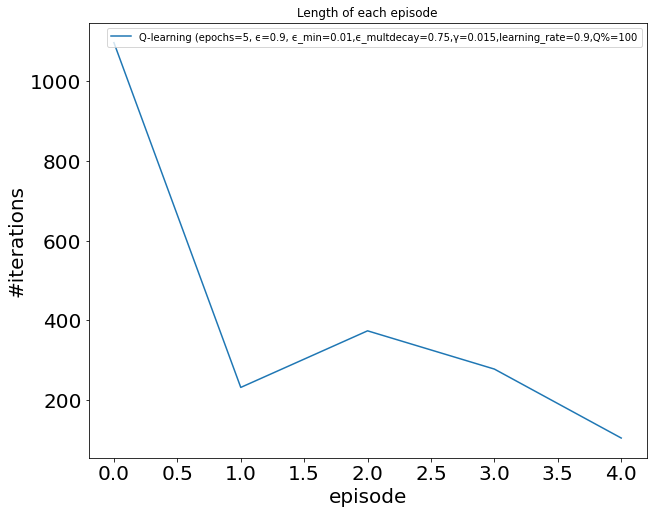

In [6]:

p.plot_episodes_length(qlearning_results)

###### Exploiting Q-matrix
Learning with: episode_count=5,iteration_count=9000,ϵ=0.3,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=100
  ## Episode: 1/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  227.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  327.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  333.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  339.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  339.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  345.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  345.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  347.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  347.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  353.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  353.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward:  355.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward:  355.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward:  357.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward:  357.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:  359.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:  359.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  368.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  368.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  468.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  468.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 61|reward:  477.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 61|reward:  477.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  577.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  577.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 71|reward:  583.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 71|reward:  583.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 76|reward:  589.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 76|reward:  589.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 1|Iteration 79|reward:  591.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 1|Iteration 79|reward:  591.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  593.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  593.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 111|reward:  593.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 138|reward:  593.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 168|reward:  593.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 189|reward:  602.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 189|reward:  602.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 1|Iteration 190|reward:  702.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 1|Iteration 190|reward:  702.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 1|Iteration 194|reward:  711.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 1|Iteration 194|reward:  711.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 1|Iteration 197|reward:  713.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 1|Iteration 197|reward:  713.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 1|Iteration 198|reward:  813.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 1|Iteration 198|reward:  813.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 1|Iteration 223|reward:  819.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 1|Iteration 223|reward:  819.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 1|Iteration 227|reward:  825.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 1|Iteration 227|reward:  825.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 1|Iteration 236|reward:  831.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 1|Iteration 236|reward:  831.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 1|Iteration 253|reward:  839.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 1|Iteration 253|reward:  839.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 1|Iteration 275|reward:  839.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 1|Iteration 291|reward:  845.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 1|Iteration 291|reward:  845.0|last_reward_at:  291|Elapsed Time: 0:00:01||

Episode 1|Iteration 300|reward:  851.0|last_reward_at:  291|Elapsed Time: 0:00:01||

Episode 1|Iteration 300|reward:  851.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 1|Iteration 312|reward:  860.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 1|Iteration 312|reward:  860.0|last_reward_at:  312|Elapsed Time: 0:00:01||

Episode 1|Iteration 313|reward:  960.0|last_reward_at:  312|Elapsed Time: 0:00:01||

Episode 1|Iteration 313|reward:  960.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 1|Iteration 316|reward:  969.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 1|Iteration 316|reward:  969.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 1|Iteration 317|reward: 1069.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 1|Iteration 317|reward: 1069.0|last_reward_at:  317|Elapsed Time: 0:00:01||

Episode 1|Iteration 322|reward: 1075.0|last_reward_at:  317|Elapsed Time: 0:00:01||

Episode 1|Iteration 322|reward: 1075.0|last_reward_at:  322|Elapsed Time: 0:00:01||

Episode 1|Iteration 328|reward: 1077.0|last_reward_at:  322|Elapsed Time: 0:00:01||

Episode 1|Iteration 328|reward: 1077.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 1|Iteration 329|reward: 1083.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 1|Iteration 329|reward: 1083.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 1|Iteration 338|reward: 1089.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 1|Iteration 338|reward: 1089.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 1|Iteration 352|reward: 1091.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 1|Iteration 352|reward: 1091.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 1|Iteration 353|reward: 1097.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 1|Iteration 353|reward: 1097.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 1|Iteration 357|reward: 1103.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 1|Iteration 357|reward: 1103.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 1|Iteration 379|reward: 1103.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 1|Iteration 397|reward: 1105.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 1|Iteration 397|reward: 1105.0|last_reward_at:  397|Elapsed Time: 0:00:01||

Episode 1|Iteration 418|reward: 1105.0|last_reward_at:  397|Elapsed Time: 0:00:01||

Episode 1|Iteration 440|reward: 1105.0|last_reward_at:  397|Elapsed Time: 0:00:01||

Episode 1|Iteration 456|reward: 1105.0|last_reward_at:  397|Elapsed Time: 0:00:02||

Episode 1|Iteration 478|reward: 1105.0|last_reward_at:  397|Elapsed Time: 0:00:02||

Episode 1|Iteration 497|reward: 1105.0|last_reward_at:  397|Elapsed Time: 0:00:02||

Episode 1|Iteration 504|reward: 1113.0|last_reward_at:  397|Elapsed Time: 0:00:02||

Episode 1|Iteration 504|reward: 1113.0|last_reward_at:  504|Elapsed Time: 0:00:02||

Episode 1|Iteration 517|reward: 1119.0|last_reward_at:  504|Elapsed Time: 0:00:02||

Episode 1|Iteration 517|reward: 1119.0|last_reward_at:  517|Elapsed Time: 0:00:02||

Episode 1|Iteration 535|reward: 1119.0|last_reward_at:  517|Elapsed Time: 0:00:02||

Episode 1|Iteration 537|reward: 1128.0|last_reward_at:  517|Elapsed Time: 0:00:02||

Episode 1|Iteration 537|reward: 1128.0|last_reward_at:  537|Elapsed Time: 0:00:02||

Episode 1|Iteration 538|reward: 1228.0|last_reward_at:  537|Elapsed Time: 0:00:02||

Episode 1|Iteration 538|reward: 1228.0|last_reward_at:  538|Elapsed Time: 0:00:02||

Episode 1|Iteration 543|reward: 1237.0|last_reward_at:  538|Elapsed Time: 0:00:02||

Episode 1|Iteration 543|reward: 1237.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 1|Iteration 544|reward: 6237.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 1|Iteration 544|reward: 6237.0|last_reward_at:  544|Elapsed Time: 0:00:02||

  Episode 1 ended at t=544 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/102 (0.10)
    explore-remote: 16/122 (0.12)
    explore-connect: 0/135 (0.00)
    exploit-local: 9/61 (0.13)
    exploit-remote: 4/73 (0.05)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 221
  ## Episode: 2/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  113.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  113.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  122.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  122.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  222.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  222.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  231.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  231.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  331.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  331.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  333.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  339.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  339.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  345.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  345.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  347.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  347.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  353.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  353.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  359.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  359.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  368.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  368.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  468.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  468.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  474.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  474.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  476.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  476.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 59|reward:  485.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 59|reward:  485.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  585.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  585.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 61|reward:  591.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 61|reward:  591.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 2|Iteration 70|reward:  593.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 2|Iteration 70|reward:  593.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 2|Iteration 71|reward:  599.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 2|Iteration 71|reward:  599.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  605.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  605.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 2|Iteration 77|reward:  613.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 2|Iteration 77|reward:  613.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 2|Iteration 90|reward:  619.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 2|Iteration 90|reward:  619.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 2|Iteration 100|reward:  625.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 2|Iteration 100|reward:  625.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 2|Iteration 128|reward:  625.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 2|Iteration 156|reward:  625.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 2|Iteration 172|reward:  627.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 2|Iteration 172|reward:  627.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 2|Iteration 200|reward:  627.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 2|Iteration 203|reward:  636.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 2|Iteration 203|reward:  636.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 2|Iteration 204|reward:  736.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 2|Iteration 204|reward:  736.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 2|Iteration 210|reward:  745.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 2|Iteration 210|reward:  745.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 2|Iteration 212|reward:  845.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 2|Iteration 212|reward:  845.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 2|Iteration 214|reward:  851.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 2|Iteration 214|reward:  851.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward:  851.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 2|Iteration 234|reward:  853.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 2|Iteration 234|reward:  853.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 2|Iteration 249|reward:  859.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 2|Iteration 249|reward:  859.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 2|Iteration 258|reward:  867.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 2|Iteration 258|reward:  867.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 2|Iteration 282|reward:  867.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 2|Iteration 306|reward:  867.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 2|Iteration 307|reward:  873.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 2|Iteration 307|reward:  873.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 2|Iteration 319|reward:  875.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 2|Iteration 319|reward:  875.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 2|Iteration 342|reward:  875.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 2|Iteration 356|reward:  884.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 2|Iteration 356|reward:  884.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 2|Iteration 357|reward:  984.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 2|Iteration 357|reward:  984.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 2|Iteration 371|reward:  993.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 2|Iteration 371|reward:  993.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 2|Iteration 372|reward: 1093.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 2|Iteration 372|reward: 1093.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 2|Iteration 382|reward: 1095.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 2|Iteration 382|reward: 1095.0|last_reward_at:  382|Elapsed Time: 0:00:01||

Episode 2|Iteration 400|reward: 1095.0|last_reward_at:  382|Elapsed Time: 0:00:01||

Episode 2|Iteration 410|reward: 1097.0|last_reward_at:  382|Elapsed Time: 0:00:01||

Episode 2|Iteration 410|reward: 1097.0|last_reward_at:  410|Elapsed Time: 0:00:01||

Episode 2|Iteration 433|reward: 1097.0|last_reward_at:  410|Elapsed Time: 0:00:01||

Episode 2|Iteration 440|reward: 1103.0|last_reward_at:  410|Elapsed Time: 0:00:01||

Episode 2|Iteration 440|reward: 1103.0|last_reward_at:  440|Elapsed Time: 0:00:01||

Episode 2|Iteration 456|reward: 1103.0|last_reward_at:  440|Elapsed Time: 0:00:01||

Episode 2|Iteration 475|reward: 1103.0|last_reward_at:  440|Elapsed Time: 0:00:02||

Episode 2|Iteration 496|reward: 1103.0|last_reward_at:  440|Elapsed Time: 0:00:02||

Episode 2|Iteration 518|reward: 1103.0|last_reward_at:  440|Elapsed Time: 0:00:02||

Episode 2|Iteration 525|reward: 1109.0|last_reward_at:  440|Elapsed Time: 0:00:02||

Episode 2|Iteration 525|reward: 1109.0|last_reward_at:  525|Elapsed Time: 0:00:02||

Episode 2|Iteration 548|reward: 1109.0|last_reward_at:  525|Elapsed Time: 0:00:02||

Episode 2|Iteration 570|reward: 1109.0|last_reward_at:  525|Elapsed Time: 0:00:02||

Episode 2|Iteration 582|reward: 1115.0|last_reward_at:  525|Elapsed Time: 0:00:02||

Episode 2|Iteration 582|reward: 1115.0|last_reward_at:  582|Elapsed Time: 0:00:02||

Episode 2|Iteration 601|reward: 1115.0|last_reward_at:  582|Elapsed Time: 0:00:02||

Episode 2|Iteration 620|reward: 1115.0|last_reward_at:  582|Elapsed Time: 0:00:02||

Episode 2|Iteration 642|reward: 1115.0|last_reward_at:  582|Elapsed Time: 0:00:02||

Episode 2|Iteration 663|reward: 1123.0|last_reward_at:  582|Elapsed Time: 0:00:02||

Episode 2|Iteration 663|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:02||

Episode 2|Iteration 683|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:03||

Episode 2|Iteration 705|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:03||

Episode 2|Iteration 726|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:03||

Episode 2|Iteration 746|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:03||

Episode 2|Iteration 764|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:03||

Episode 2|Iteration 785|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:03||

Episode 2|Iteration 798|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:03||

Episode 2|Iteration 818|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:03||

Episode 2|Iteration 841|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:03||

Episode 2|Iteration 859|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:03||

Episode 2|Iteration 877|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:04||

Episode 2|Iteration 900|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:04||

Episode 2|Iteration 912|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:04||

Episode 2|Iteration 929|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:04||

Episode 2|Iteration 951|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:04||

Episode 2|Iteration 974|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:04||

Episode 2|Iteration 996|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:04||

Episode 2|Iteration 1018|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:04||

Episode 2|Iteration 1041|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:04||

Episode 2|Iteration 1063|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:04||

Episode 2|Iteration 1083|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:05||

Episode 2|Iteration 1105|reward: 1123.0|last_reward_at:  663|Elapsed Time: 0:00:05||

Episode 2|Iteration 1119|reward: 1132.0|last_reward_at:  663|Elapsed Time: 0:00:05||

Episode 2|Iteration 1119|reward: 1132.0|last_reward_at: 1119|Elapsed Time: 0:00:05||

Episode 2|Iteration 1120|reward: 1232.0|last_reward_at: 1119|Elapsed Time: 0:00:05||

Episode 2|Iteration 1120|reward: 1232.0|last_reward_at: 1120|Elapsed Time: 0:00:05||

Episode 2|Iteration 1128|reward: 1241.0|last_reward_at: 1120|Elapsed Time: 0:00:05||

Episode 2|Iteration 1128|reward: 1241.0|last_reward_at: 1128|Elapsed Time: 0:00:05||

Episode 2|Iteration 1129|reward: 6241.0|last_reward_at: 1128|Elapsed Time: 0:00:05||

Episode 2|Iteration 1129|reward: 6241.0|last_reward_at: 1129|Elapsed Time: 0:00:05||

  Episode 2 ended at t=1129 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/206 (0.06)
    explore-remote: 17/246 (0.06)
    explore-connect: 0/287 (0.00)
    exploit-local: 7/187 (0.04)
    exploit-remote: 3/152 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 447
  ## Episode: 3/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  109.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  126.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  126.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  226.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  226.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  235.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  235.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  335.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  335.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  337.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  337.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  339.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  339.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  345.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  345.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  354.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  354.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  454.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  454.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  463.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  463.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  563.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  563.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  569.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  569.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  575.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  575.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  581.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  581.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  583.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  583.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  585.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  585.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 61|reward:  591.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 61|reward:  591.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:  593.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:  593.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 3|Iteration 75|reward:  599.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 3|Iteration 75|reward:  599.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 78|reward:  605.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 78|reward:  605.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 3|Iteration 81|reward:  611.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 3|Iteration 81|reward:  611.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 3|Iteration 88|reward:  617.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 3|Iteration 88|reward:  617.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 3|Iteration 95|reward:  625.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 3|Iteration 95|reward:  625.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 3|Iteration 107|reward:  627.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 3|Iteration 107|reward:  627.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 3|Iteration 132|reward:  627.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 3|Iteration 158|reward:  627.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 3|Iteration 177|reward:  627.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 3|Iteration 201|reward:  627.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 3|Iteration 226|reward:  627.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 3|Iteration 235|reward:  636.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 3|Iteration 235|reward:  636.0|last_reward_at:  235|Elapsed Time: 0:00:00||

Episode 3|Iteration 239|reward:  736.0|last_reward_at:  235|Elapsed Time: 0:00:00||

Episode 3|Iteration 239|reward:  736.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 3|Iteration 244|reward:  745.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 3|Iteration 244|reward:  745.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 3|Iteration 245|reward:  845.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 3|Iteration 245|reward:  845.0|last_reward_at:  245|Elapsed Time: 0:00:01||

Episode 3|Iteration 251|reward:  847.0|last_reward_at:  245|Elapsed Time: 0:00:01||

Episode 3|Iteration 251|reward:  847.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 3|Iteration 262|reward:  849.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 3|Iteration 262|reward:  849.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 3|Iteration 287|reward:  849.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 3|Iteration 314|reward:  849.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 3|Iteration 333|reward:  849.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 3|Iteration 334|reward:  855.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 3|Iteration 334|reward:  855.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 3|Iteration 355|reward:  855.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 3|Iteration 376|reward:  855.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 3|Iteration 401|reward:  855.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 3|Iteration 406|reward:  864.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 3|Iteration 406|reward:  864.0|last_reward_at:  406|Elapsed Time: 0:00:01||

Episode 3|Iteration 408|reward:  964.0|last_reward_at:  406|Elapsed Time: 0:00:01||

Episode 3|Iteration 408|reward:  964.0|last_reward_at:  408|Elapsed Time: 0:00:01||

Episode 3|Iteration 412|reward:  973.0|last_reward_at:  408|Elapsed Time: 0:00:01||

Episode 3|Iteration 412|reward:  973.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 3|Iteration 413|reward: 1073.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 3|Iteration 413|reward: 1073.0|last_reward_at:  413|Elapsed Time: 0:00:01||

Episode 3|Iteration 415|reward: 1079.0|last_reward_at:  413|Elapsed Time: 0:00:01||

Episode 3|Iteration 415|reward: 1079.0|last_reward_at:  415|Elapsed Time: 0:00:01||

Episode 3|Iteration 439|reward: 1079.0|last_reward_at:  415|Elapsed Time: 0:00:01||

Episode 3|Iteration 453|reward: 1085.0|last_reward_at:  415|Elapsed Time: 0:00:01||

Episode 3|Iteration 453|reward: 1085.0|last_reward_at:  453|Elapsed Time: 0:00:01||

Episode 3|Iteration 459|reward: 1087.0|last_reward_at:  453|Elapsed Time: 0:00:01||

Episode 3|Iteration 459|reward: 1087.0|last_reward_at:  459|Elapsed Time: 0:00:01||

Episode 3|Iteration 477|reward: 1093.0|last_reward_at:  459|Elapsed Time: 0:00:02||

Episode 3|Iteration 477|reward: 1093.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 3|Iteration 497|reward: 1095.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 3|Iteration 497|reward: 1095.0|last_reward_at:  497|Elapsed Time: 0:00:02||

Episode 3|Iteration 501|reward: 1101.0|last_reward_at:  497|Elapsed Time: 0:00:02||

Episode 3|Iteration 501|reward: 1101.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 3|Iteration 524|reward: 1101.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 3|Iteration 535|reward: 1107.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 3|Iteration 535|reward: 1107.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 3|Iteration 557|reward: 1107.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 3|Iteration 570|reward: 1107.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 3|Iteration 589|reward: 1107.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 3|Iteration 611|reward: 1107.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 3|Iteration 633|reward: 1107.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 3|Iteration 655|reward: 1107.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 3|Iteration 677|reward: 1107.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 3|Iteration 699|reward: 1107.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 3|Iteration 722|reward: 1107.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 3|Iteration 744|reward: 1107.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 3|Iteration 765|reward: 1107.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 3|Iteration 786|reward: 1107.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 3|Iteration 798|reward: 1107.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 3|Iteration 814|reward: 1107.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 3|Iteration 817|reward: 1115.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 3|Iteration 817|reward: 1115.0|last_reward_at:  817|Elapsed Time: 0:00:03||

Episode 3|Iteration 838|reward: 1115.0|last_reward_at:  817|Elapsed Time: 0:00:03||

Episode 3|Iteration 861|reward: 1115.0|last_reward_at:  817|Elapsed Time: 0:00:03||

Episode 3|Iteration 881|reward: 1115.0|last_reward_at:  817|Elapsed Time: 0:00:03||

Episode 3|Iteration 903|reward: 1115.0|last_reward_at:  817|Elapsed Time: 0:00:04||

Episode 3|Iteration 912|reward: 1115.0|last_reward_at:  817|Elapsed Time: 0:00:04||

Episode 3|Iteration 926|reward: 1115.0|last_reward_at:  817|Elapsed Time: 0:00:04||

Episode 3|Iteration 947|reward: 1115.0|last_reward_at:  817|Elapsed Time: 0:00:04||

Episode 3|Iteration 968|reward: 1115.0|last_reward_at:  817|Elapsed Time: 0:00:04||

Episode 3|Iteration 984|reward: 1124.0|last_reward_at:  817|Elapsed Time: 0:00:04||

Episode 3|Iteration 984|reward: 1124.0|last_reward_at:  984|Elapsed Time: 0:00:04||

Episode 3|Iteration 985|reward: 1224.0|last_reward_at:  984|Elapsed Time: 0:00:04||

Episode 3|Iteration 985|reward: 1224.0|last_reward_at:  985|Elapsed Time: 0:00:04||

Episode 3|Iteration 992|reward: 1233.0|last_reward_at:  985|Elapsed Time: 0:00:04||

Episode 3|Iteration 992|reward: 1233.0|last_reward_at:  992|Elapsed Time: 0:00:04||

Episode 3|Iteration 994|reward: 6233.0|last_reward_at:  992|Elapsed Time: 0:00:04||

Episode 3|Iteration 994|reward: 6233.0|last_reward_at:  994|Elapsed Time: 0:00:04||

  Episode 3 ended at t=994 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/180 (0.06)
    explore-remote: 16/242 (0.06)
    explore-connect: 0/229 (0.00)
    exploit-local: 8/147 (0.05)
    exploit-remote: 4/146 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 368
  ## Episode: 4/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  329.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  329.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  335.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  335.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:  341.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:  341.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  343.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  343.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:  349.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:  349.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  355.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  355.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:  361.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:  361.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  369.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  369.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  371.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  371.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  377.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  377.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 66|reward:  377.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 70|reward:  379.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 70|reward:  379.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 4|Iteration 98|reward:  379.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 4|Iteration 101|reward:  388.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 4|Iteration 101|reward:  388.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 4|Iteration 102|reward:  488.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 4|Iteration 102|reward:  488.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 4|Iteration 103|reward:  497.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 4|Iteration 103|reward:  497.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 4|Iteration 104|reward:  597.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 4|Iteration 104|reward:  597.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 4|Iteration 105|reward:  603.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 4|Iteration 105|reward:  603.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 4|Iteration 108|reward:  612.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 4|Iteration 108|reward:  612.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 4|Iteration 109|reward:  712.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 4|Iteration 109|reward:  712.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  721.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  721.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 4|Iteration 115|reward:  821.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 4|Iteration 115|reward:  821.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 4|Iteration 116|reward:  823.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 4|Iteration 116|reward:  823.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 4|Iteration 124|reward:  829.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 4|Iteration 124|reward:  829.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 4|Iteration 128|reward:  835.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 4|Iteration 128|reward:  835.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 4|Iteration 129|reward:  837.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 4|Iteration 129|reward:  837.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 4|Iteration 131|reward:  839.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 4|Iteration 131|reward:  839.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 4|Iteration 157|reward:  839.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 4|Iteration 163|reward:  845.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 4|Iteration 163|reward:  845.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 4|Iteration 188|reward:  845.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 4|Iteration 198|reward:  854.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 4|Iteration 198|reward:  854.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 4|Iteration 199|reward:  954.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 4|Iteration 199|reward:  954.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 4|Iteration 200|reward:  960.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 4|Iteration 200|reward:  960.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 4|Iteration 203|reward:  969.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 4|Iteration 203|reward:  969.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 4|Iteration 205|reward: 1069.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 4|Iteration 205|reward: 1069.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 4|Iteration 208|reward: 1075.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 4|Iteration 208|reward: 1075.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 4|Iteration 216|reward: 1077.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 4|Iteration 216|reward: 1077.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 4|Iteration 223|reward: 1086.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 4|Iteration 223|reward: 1086.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 4|Iteration 226|reward: 1088.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 4|Iteration 226|reward: 1088.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 4|Iteration 227|reward: 1188.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 4|Iteration 227|reward: 1188.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 4|Iteration 230|reward: 1194.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 4|Iteration 230|reward: 1194.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 4|Iteration 232|reward: 1203.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 4|Iteration 232|reward: 1203.0|last_reward_at:  232|Elapsed Time: 0:00:00||

Episode 4|Iteration 233|reward: 6203.0|last_reward_at:  232|Elapsed Time: 0:00:00||

Episode 4|Iteration 233|reward: 6203.0|last_reward_at:  233|Elapsed Time: 0:00:00||

  Episode 4 ended at t=233 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/36 (0.23)
    explore-remote: 12/56 (0.18)
    explore-connect: 0/73 (0.00)
    exploit-local: 8/4 (0.67)
    exploit-remote: 3/19 (0.14)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 122
  ## Episode: 5/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  220.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  220.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  229.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  229.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  329.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  329.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  335.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  335.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  344.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  350.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  350.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  450.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  450.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  459.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  459.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  559.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  559.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  565.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  565.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  567.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  567.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  573.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  573.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  579.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  579.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:  585.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:  585.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  587.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  587.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  596.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  596.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:  696.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:  696.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 5|Iteration 48|reward:  705.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 5|Iteration 48|reward:  705.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 5|Iteration 49|reward:  805.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 5|Iteration 49|reward:  805.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  811.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  811.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 57|reward:  813.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 57|reward:  813.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 5|Iteration 63|reward:  819.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 5|Iteration 63|reward:  819.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 5|Iteration 67|reward:  825.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 5|Iteration 67|reward:  825.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 5|Iteration 72|reward:  827.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 5|Iteration 72|reward:  827.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 74|reward:  829.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 74|reward:  829.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 5|Iteration 82|reward:  835.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 5|Iteration 82|reward:  835.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 5|Iteration 87|reward:  841.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 5|Iteration 87|reward:  841.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:  843.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:  843.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 92|reward:  845.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 92|reward:  845.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  845.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 5|Iteration 137|reward:  851.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 5|Iteration 137|reward:  851.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 5|Iteration 150|reward:  857.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 5|Iteration 150|reward:  857.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 5|Iteration 163|reward:  865.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 5|Iteration 163|reward:  865.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 5|Iteration 169|reward:  871.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 5|Iteration 169|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 5|Iteration 195|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 5|Iteration 219|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 5|Iteration 244|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 5|Iteration 264|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 5|Iteration 285|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 5|Iteration 305|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 5|Iteration 330|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 5|Iteration 354|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 5|Iteration 378|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 5|Iteration 404|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 5|Iteration 424|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 5|Iteration 446|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:02||

Episode 5|Iteration 456|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:02||

Episode 5|Iteration 478|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:02||

Episode 5|Iteration 499|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:02||

Episode 5|Iteration 521|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:02||

Episode 5|Iteration 540|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:02||

Episode 5|Iteration 559|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:02||

Episode 5|Iteration 584|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:02||

Episode 5|Iteration 607|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:02||

Episode 5|Iteration 629|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:02||

Episode 5|Iteration 652|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:03||

Episode 5|Iteration 674|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:03||

Episode 5|Iteration 695|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:03||

Episode 5|Iteration 718|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:03||

Episode 5|Iteration 741|reward:  871.0|last_reward_at:  169|Elapsed Time: 0:00:03||

Episode 5|Iteration 758|reward:  880.0|last_reward_at:  169|Elapsed Time: 0:00:03||

Episode 5|Iteration 758|reward:  880.0|last_reward_at:  758|Elapsed Time: 0:00:03||

Episode 5|Iteration 759|reward:  980.0|last_reward_at:  758|Elapsed Time: 0:00:03||

Episode 5|Iteration 759|reward:  980.0|last_reward_at:  759|Elapsed Time: 0:00:03||

Episode 5|Iteration 770|reward:  989.0|last_reward_at:  759|Elapsed Time: 0:00:03||

Episode 5|Iteration 770|reward:  989.0|last_reward_at:  770|Elapsed Time: 0:00:03||

Episode 5|Iteration 771|reward: 1089.0|last_reward_at:  770|Elapsed Time: 0:00:03||

Episode 5|Iteration 771|reward: 1089.0|last_reward_at:  771|Elapsed Time: 0:00:03||

Episode 5|Iteration 792|reward: 1091.0|last_reward_at:  771|Elapsed Time: 0:00:03||

Episode 5|Iteration 792|reward: 1091.0|last_reward_at:  792|Elapsed Time: 0:00:03||

Episode 5|Iteration 808|reward: 1093.0|last_reward_at:  792|Elapsed Time: 0:00:03||

Episode 5|Iteration 808|reward: 1093.0|last_reward_at:  808|Elapsed Time: 0:00:03||

Episode 5|Iteration 814|reward: 1099.0|last_reward_at:  808|Elapsed Time: 0:00:03||

Episode 5|Iteration 814|reward: 1099.0|last_reward_at:  814|Elapsed Time: 0:00:03||

Episode 5|Iteration 836|reward: 1099.0|last_reward_at:  814|Elapsed Time: 0:00:03||

Episode 5|Iteration 853|reward: 1099.0|last_reward_at:  814|Elapsed Time: 0:00:04||

Episode 5|Iteration 872|reward: 1099.0|last_reward_at:  814|Elapsed Time: 0:00:04||

Episode 5|Iteration 876|reward: 1105.0|last_reward_at:  814|Elapsed Time: 0:00:04||

Episode 5|Iteration 876|reward: 1105.0|last_reward_at:  876|Elapsed Time: 0:00:04||

Episode 5|Iteration 897|reward: 1111.0|last_reward_at:  876|Elapsed Time: 0:00:04||

Episode 5|Iteration 897|reward: 1111.0|last_reward_at:  897|Elapsed Time: 0:00:04||

Episode 5|Iteration 912|reward: 1111.0|last_reward_at:  897|Elapsed Time: 0:00:04||

Episode 5|Iteration 934|reward: 1111.0|last_reward_at:  897|Elapsed Time: 0:00:04||

Episode 5|Iteration 954|reward: 1111.0|last_reward_at:  897|Elapsed Time: 0:00:04||

Episode 5|Iteration 973|reward: 1111.0|last_reward_at:  897|Elapsed Time: 0:00:04||

Episode 5|Iteration 993|reward: 1111.0|last_reward_at:  897|Elapsed Time: 0:00:04||

Episode 5|Iteration 1013|reward: 1111.0|last_reward_at:  897|Elapsed Time: 0:00:04||

Episode 5|Iteration 1026|reward: 1111.0|last_reward_at:  897|Elapsed Time: 0:00:04||

Episode 5|Iteration 1043|reward: 1111.0|last_reward_at:  897|Elapsed Time: 0:00:04||

Episode 5|Iteration 1045|reward: 1119.0|last_reward_at:  897|Elapsed Time: 0:00:05||

Episode 5|Iteration 1045|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:05||

Episode 5|Iteration 1068|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:05||

Episode 5|Iteration 1091|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:05||

Episode 5|Iteration 1113|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:05||

Episode 5|Iteration 1135|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:05||

Episode 5|Iteration 1158|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:05||

Episode 5|Iteration 1180|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:05||

Episode 5|Iteration 1203|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:05||

Episode 5|Iteration 1225|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:05||

Episode 5|Iteration 1248|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:05||

Episode 5|Iteration 1269|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:06||

Episode 5|Iteration 1290|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:06||

Episode 5|Iteration 1313|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:06||

Episode 5|Iteration 1335|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:06||

Episode 5|Iteration 1355|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:06||

Episode 5|Iteration 1368|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:06||

Episode 5|Iteration 1386|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:06||

Episode 5|Iteration 1408|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:06||

Episode 5|Iteration 1425|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:06||

Episode 5|Iteration 1445|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:06||

Episode 5|Iteration 1465|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:07||

Episode 5|Iteration 1481|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:07||

Episode 5|Iteration 1501|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:07||

Episode 5|Iteration 1521|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:07||

Episode 5|Iteration 1541|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:07||

Episode 5|Iteration 1560|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:07||

Episode 5|Iteration 1582|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:07||

Episode 5|Iteration 1595|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:07||

Episode 5|Iteration 1616|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:07||

Episode 5|Iteration 1636|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:07||

Episode 5|Iteration 1659|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:07||

Episode 5|Iteration 1677|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:08||

Episode 5|Iteration 1699|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:08||

Episode 5|Iteration 1719|reward: 1119.0|last_reward_at: 1045|Elapsed Time: 0:00:08||

Episode 5|Iteration 1724|reward: 1128.0|last_reward_at: 1045|Elapsed Time: 0:00:08||

Episode 5|Iteration 1724|reward: 1128.0|last_reward_at: 1724|Elapsed Time: 0:00:08||

Episode 5|Iteration 1725|reward: 1228.0|last_reward_at: 1724|Elapsed Time: 0:00:08||

Episode 5|Iteration 1725|reward: 1228.0|last_reward_at: 1725|Elapsed Time: 0:00:08||

Episode 5|Iteration 1731|reward: 1237.0|last_reward_at: 1725|Elapsed Time: 0:00:08||

Episode 5|Iteration 1731|reward: 1237.0|last_reward_at: 1731|Elapsed Time: 0:00:08||

Episode 5|Iteration 1733|reward: 6237.0|last_reward_at: 1731|Elapsed Time: 0:00:08||

Episode 5|Iteration 1733|reward: 6237.0|last_reward_at: 1733|Elapsed Time: 0:00:08||

  Episode 5 ended at t=1733 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/320 (0.04)
    explore-remote: 17/421 (0.04)
    explore-connect: 0/435 (0.00)
    exploit-local: 7/299 (0.02)
    exploit-remote: 3/207 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 693
simulation ended


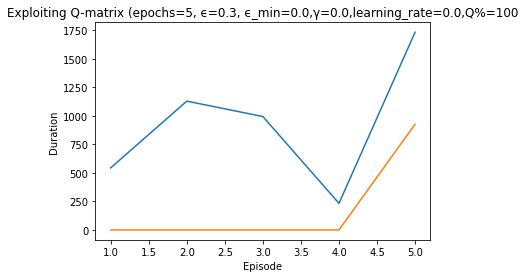

In [7]:


nolearning_results = learner.epsilon_greedy_search(
    cyberbattlechain_10,
    ep,
    learner=a.QTabularLearner(ep, trained=qlearning_bestrun_10['learner'],
                              gamma=0.0, learning_rate=0.0, exploit_percentile=100),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.30,  # 0.35,
    render=False,
    title="Exploiting Q-matrix",
    verbosity=Verbosity.Quiet
)

###### Random search
Learning with: episode_count=5,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=100
  ## Episode: 1/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   13.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   13.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:   15.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:   15.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  115.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  115.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward:  121.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward:  121.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward:  129.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward:  129.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 52|reward:  138.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 52|reward:  138.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 1|Iteration 78|reward:  144.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 1|Iteration 78|reward:  144.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  144.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 1|Iteration 132|reward:  244.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 1|Iteration 132|reward:  244.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 1|Iteration 135|reward:  253.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 1|Iteration 135|reward:  253.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 1|Iteration 147|reward:  257.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 1|Iteration 147|reward:  257.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 1|Iteration 153|reward:  259.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 1|Iteration 153|reward:  259.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 1|Iteration 187|reward:  259.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 1|Iteration 218|reward:  265.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 1|Iteration 218|reward:  265.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 1|Iteration 255|reward:  265.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 1|Iteration 293|reward:  265.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 1|Iteration 330|reward:  265.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 1|Iteration 367|reward:  265.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 1|Iteration 397|reward:  265.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 1|Iteration 431|reward:  265.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 1|Iteration 456|reward:  265.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 1|Iteration 490|reward:  265.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 1|Iteration 529|reward:  265.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 1|Iteration 570|reward:  265.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 1|Iteration 608|reward:  265.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 1|Iteration 648|reward:  265.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 1|Iteration 684|reward:  265.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 1|Iteration 707|reward:  365.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 1|Iteration 707|reward:  365.0|last_reward_at:  707|Elapsed Time: 0:00:01||

Episode 1|Iteration 718|reward:  371.0|last_reward_at:  707|Elapsed Time: 0:00:01||

Episode 1|Iteration 718|reward:  371.0|last_reward_at:  718|Elapsed Time: 0:00:01||

Episode 1|Iteration 724|reward:  380.0|last_reward_at:  718|Elapsed Time: 0:00:02||

Episode 1|Iteration 724|reward:  380.0|last_reward_at:  724|Elapsed Time: 0:00:02||

Episode 1|Iteration 725|reward:  386.0|last_reward_at:  724|Elapsed Time: 0:00:02||

Episode 1|Iteration 725|reward:  386.0|last_reward_at:  725|Elapsed Time: 0:00:02||

Episode 1|Iteration 744|reward:  394.0|last_reward_at:  725|Elapsed Time: 0:00:02||

Episode 1|Iteration 744|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:02||

Episode 1|Iteration 783|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:02||

Episode 1|Iteration 817|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:02||

Episode 1|Iteration 852|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:02||

Episode 1|Iteration 881|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:02||

Episode 1|Iteration 911|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:02||

Episode 1|Iteration 943|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:02||

Episode 1|Iteration 978|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:02||

Episode 1|Iteration 1017|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:02||

Episode 1|Iteration 1045|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:02||

Episode 1|Iteration 1076|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:03||

Episode 1|Iteration 1112|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:03||

Episode 1|Iteration 1140|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:03||

Episode 1|Iteration 1178|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:03||

Episode 1|Iteration 1216|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:03||

Episode 1|Iteration 1254|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:03||

Episode 1|Iteration 1292|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:03||

Episode 1|Iteration 1329|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:03||

Episode 1|Iteration 1365|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:03||

Episode 1|Iteration 1403|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:03||

Episode 1|Iteration 1436|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:04||

Episode 1|Iteration 1469|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:04||

Episode 1|Iteration 1501|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:04||

Episode 1|Iteration 1532|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:04||

Episode 1|Iteration 1566|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:04||

Episode 1|Iteration 1595|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:04||

Episode 1|Iteration 1629|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:04||

Episode 1|Iteration 1663|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:04||

Episode 1|Iteration 1697|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:04||

Episode 1|Iteration 1733|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:04||

Episode 1|Iteration 1768|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:05||

Episode 1|Iteration 1798|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:05||

Episode 1|Iteration 1823|reward:  394.0|last_reward_at:  744|Elapsed Time: 0:00:05||

Episode 1|Iteration 1835|reward:  494.0|last_reward_at:  744|Elapsed Time: 0:00:05||

Episode 1|Iteration 1835|reward:  494.0|last_reward_at: 1835|Elapsed Time: 0:00:05||

Episode 1|Iteration 1861|reward:  503.0|last_reward_at: 1835|Elapsed Time: 0:00:05||

Episode 1|Iteration 1861|reward:  503.0|last_reward_at: 1861|Elapsed Time: 0:00:05||

Episode 1|Iteration 1868|reward:  509.0|last_reward_at: 1861|Elapsed Time: 0:00:05||

Episode 1|Iteration 1868|reward:  509.0|last_reward_at: 1868|Elapsed Time: 0:00:05||

Episode 1|Iteration 1871|reward:  513.0|last_reward_at: 1868|Elapsed Time: 0:00:05||

Episode 1|Iteration 1871|reward:  513.0|last_reward_at: 1871|Elapsed Time: 0:00:05||

Episode 1|Iteration 1892|reward:  515.0|last_reward_at: 1871|Elapsed Time: 0:00:05||

Episode 1|Iteration 1892|reward:  515.0|last_reward_at: 1892|Elapsed Time: 0:00:05||

Episode 1|Iteration 1926|reward:  515.0|last_reward_at: 1892|Elapsed Time: 0:00:05||

Episode 1|Iteration 1952|reward:  515.0|last_reward_at: 1892|Elapsed Time: 0:00:05||

Episode 1|Iteration 1986|reward:  515.0|last_reward_at: 1892|Elapsed Time: 0:00:05||

Episode 1|Iteration 2021|reward:  515.0|last_reward_at: 1892|Elapsed Time: 0:00:05||

Episode 1|Iteration 2051|reward:  515.0|last_reward_at: 1892|Elapsed Time: 0:00:05||

Episode 1|Iteration 2076|reward:  615.0|last_reward_at: 1892|Elapsed Time: 0:00:06||

Episode 1|Iteration 2076|reward:  615.0|last_reward_at: 2076|Elapsed Time: 0:00:06||

Episode 1|Iteration 2101|reward:  615.0|last_reward_at: 2076|Elapsed Time: 0:00:06||

Episode 1|Iteration 2133|reward:  615.0|last_reward_at: 2076|Elapsed Time: 0:00:06||

Episode 1|Iteration 2162|reward:  615.0|last_reward_at: 2076|Elapsed Time: 0:00:06||

Episode 1|Iteration 2196|reward:  615.0|last_reward_at: 2076|Elapsed Time: 0:00:06||

Episode 1|Iteration 2230|reward:  615.0|last_reward_at: 2076|Elapsed Time: 0:00:06||

Episode 1|Iteration 2234|reward:  624.0|last_reward_at: 2076|Elapsed Time: 0:00:06||

Episode 1|Iteration 2234|reward:  624.0|last_reward_at: 2234|Elapsed Time: 0:00:06||

Episode 1|Iteration 2262|reward:  630.0|last_reward_at: 2234|Elapsed Time: 0:00:06||

Episode 1|Iteration 2262|reward:  630.0|last_reward_at: 2262|Elapsed Time: 0:00:06||

Episode 1|Iteration 2279|reward:  630.0|last_reward_at: 2262|Elapsed Time: 0:00:06||

Episode 1|Iteration 2284|reward:  638.0|last_reward_at: 2262|Elapsed Time: 0:00:06||

Episode 1|Iteration 2284|reward:  638.0|last_reward_at: 2284|Elapsed Time: 0:00:06||

Episode 1|Iteration 2314|reward:  638.0|last_reward_at: 2284|Elapsed Time: 0:00:06||

Episode 1|Iteration 2317|reward:  644.0|last_reward_at: 2284|Elapsed Time: 0:00:06||

Episode 1|Iteration 2317|reward:  644.0|last_reward_at: 2317|Elapsed Time: 0:00:06||

Episode 1|Iteration 2349|reward:  644.0|last_reward_at: 2317|Elapsed Time: 0:00:06||

Episode 1|Iteration 2377|reward:  644.0|last_reward_at: 2317|Elapsed Time: 0:00:07||

Episode 1|Iteration 2409|reward:  644.0|last_reward_at: 2317|Elapsed Time: 0:00:07||

Episode 1|Iteration 2433|reward:  644.0|last_reward_at: 2317|Elapsed Time: 0:00:07||

Episode 1|Iteration 2462|reward:  644.0|last_reward_at: 2317|Elapsed Time: 0:00:07||

Episode 1|Iteration 2494|reward:  644.0|last_reward_at: 2317|Elapsed Time: 0:00:07||

Episode 1|Iteration 2527|reward:  644.0|last_reward_at: 2317|Elapsed Time: 0:00:07||

Episode 1|Iteration 2560|reward:  644.0|last_reward_at: 2317|Elapsed Time: 0:00:07||

Episode 1|Iteration 2590|reward:  644.0|last_reward_at: 2317|Elapsed Time: 0:00:07||

Episode 1|Iteration 2621|reward:  644.0|last_reward_at: 2317|Elapsed Time: 0:00:07||

Episode 1|Iteration 2651|reward:  644.0|last_reward_at: 2317|Elapsed Time: 0:00:07||

Episode 1|Iteration 2658|reward:  744.0|last_reward_at: 2317|Elapsed Time: 0:00:07||

Episode 1|Iteration 2658|reward:  744.0|last_reward_at: 2658|Elapsed Time: 0:00:07||

Episode 1|Iteration 2690|reward:  744.0|last_reward_at: 2658|Elapsed Time: 0:00:08||

Episode 1|Iteration 2711|reward:  750.0|last_reward_at: 2658|Elapsed Time: 0:00:08||

Episode 1|Iteration 2711|reward:  750.0|last_reward_at: 2711|Elapsed Time: 0:00:08||

Episode 1|Iteration 2715|reward:  754.0|last_reward_at: 2711|Elapsed Time: 0:00:08||

Episode 1|Iteration 2715|reward:  754.0|last_reward_at: 2715|Elapsed Time: 0:00:08||

Episode 1|Iteration 2735|reward:  754.0|last_reward_at: 2715|Elapsed Time: 0:00:08||

Episode 1|Iteration 2739|reward:  756.0|last_reward_at: 2715|Elapsed Time: 0:00:08||

Episode 1|Iteration 2739|reward:  756.0|last_reward_at: 2739|Elapsed Time: 0:00:08||

Episode 1|Iteration 2766|reward:  756.0|last_reward_at: 2739|Elapsed Time: 0:00:08||

Episode 1|Iteration 2770|reward:  765.0|last_reward_at: 2739|Elapsed Time: 0:00:08||

Episode 1|Iteration 2770|reward:  765.0|last_reward_at: 2770|Elapsed Time: 0:00:08||

Episode 1|Iteration 2798|reward:  765.0|last_reward_at: 2770|Elapsed Time: 0:00:08||

Episode 1|Iteration 2801|reward:  865.0|last_reward_at: 2770|Elapsed Time: 0:00:08||

Episode 1|Iteration 2801|reward:  865.0|last_reward_at: 2801|Elapsed Time: 0:00:08||

Episode 1|Iteration 2815|reward:  871.0|last_reward_at: 2801|Elapsed Time: 0:00:08||

Episode 1|Iteration 2815|reward:  871.0|last_reward_at: 2815|Elapsed Time: 0:00:08||

Episode 1|Iteration 2842|reward:  879.0|last_reward_at: 2815|Elapsed Time: 0:00:08||

Episode 1|Iteration 2842|reward:  879.0|last_reward_at: 2842|Elapsed Time: 0:00:08||

Episode 1|Iteration 2869|reward:  879.0|last_reward_at: 2842|Elapsed Time: 0:00:08||

Episode 1|Iteration 2896|reward:  879.0|last_reward_at: 2842|Elapsed Time: 0:00:08||

Episode 1|Iteration 2921|reward:  885.0|last_reward_at: 2842|Elapsed Time: 0:00:08||

Episode 1|Iteration 2921|reward:  885.0|last_reward_at: 2921|Elapsed Time: 0:00:08||

Episode 1|Iteration 2948|reward:  885.0|last_reward_at: 2921|Elapsed Time: 0:00:09||

Episode 1|Iteration 2963|reward:  885.0|last_reward_at: 2921|Elapsed Time: 0:00:09||

Episode 1|Iteration 2990|reward:  885.0|last_reward_at: 2921|Elapsed Time: 0:00:09||

Episode 1|Iteration 2996|reward:  894.0|last_reward_at: 2921|Elapsed Time: 0:00:09||

Episode 1|Iteration 2996|reward:  894.0|last_reward_at: 2996|Elapsed Time: 0:00:09||

Episode 1|Iteration 3023|reward:  894.0|last_reward_at: 2996|Elapsed Time: 0:00:09||

Episode 1|Iteration 3049|reward:  894.0|last_reward_at: 2996|Elapsed Time: 0:00:09||

Episode 1|Iteration 3076|reward:  894.0|last_reward_at: 2996|Elapsed Time: 0:00:09||

Episode 1|Iteration 3103|reward:  894.0|last_reward_at: 2996|Elapsed Time: 0:00:09||

Episode 1|Iteration 3131|reward:  894.0|last_reward_at: 2996|Elapsed Time: 0:00:09||

Episode 1|Iteration 3155|reward:  894.0|last_reward_at: 2996|Elapsed Time: 0:00:09||

Episode 1|Iteration 3183|reward:  894.0|last_reward_at: 2996|Elapsed Time: 0:00:09||

Episode 1|Iteration 3211|reward:  894.0|last_reward_at: 2996|Elapsed Time: 0:00:10||

Episode 1|Iteration 3234|reward:  994.0|last_reward_at: 2996|Elapsed Time: 0:00:10||

Episode 1|Iteration 3234|reward:  994.0|last_reward_at: 3234|Elapsed Time: 0:00:10||

Episode 1|Iteration 3260|reward:  994.0|last_reward_at: 3234|Elapsed Time: 0:00:10||

Episode 1|Iteration 3281|reward: 1003.0|last_reward_at: 3234|Elapsed Time: 0:00:10||

Episode 1|Iteration 3281|reward: 1003.0|last_reward_at: 3281|Elapsed Time: 0:00:10||

Episode 1|Iteration 3285|reward: 1005.0|last_reward_at: 3281|Elapsed Time: 0:00:10||

Episode 1|Iteration 3285|reward: 1005.0|last_reward_at: 3285|Elapsed Time: 0:00:10||

Episode 1|Iteration 3295|reward: 1009.0|last_reward_at: 3285|Elapsed Time: 0:00:10||

Episode 1|Iteration 3295|reward: 1009.0|last_reward_at: 3295|Elapsed Time: 0:00:10||

Episode 1|Iteration 3322|reward: 1009.0|last_reward_at: 3295|Elapsed Time: 0:00:10||

Episode 1|Iteration 3347|reward: 1009.0|last_reward_at: 3295|Elapsed Time: 0:00:10||

Episode 1|Iteration 3363|reward: 1015.0|last_reward_at: 3295|Elapsed Time: 0:00:10||

Episode 1|Iteration 3363|reward: 1015.0|last_reward_at: 3363|Elapsed Time: 0:00:10||

Episode 1|Iteration 3388|reward: 1015.0|last_reward_at: 3363|Elapsed Time: 0:00:10||

Episode 1|Iteration 3413|reward: 1015.0|last_reward_at: 3363|Elapsed Time: 0:00:10||

Episode 1|Iteration 3441|reward: 1015.0|last_reward_at: 3363|Elapsed Time: 0:00:10||

Episode 1|Iteration 3468|reward: 1015.0|last_reward_at: 3363|Elapsed Time: 0:00:11||

Episode 1|Iteration 3487|reward: 1015.0|last_reward_at: 3363|Elapsed Time: 0:00:11||

Episode 1|Iteration 3512|reward: 1015.0|last_reward_at: 3363|Elapsed Time: 0:00:11||

Episode 1|Iteration 3532|reward: 1015.0|last_reward_at: 3363|Elapsed Time: 0:00:11||

Episode 1|Iteration 3554|reward: 1015.0|last_reward_at: 3363|Elapsed Time: 0:00:11||

Episode 1|Iteration 3570|reward: 1115.0|last_reward_at: 3363|Elapsed Time: 0:00:11||

Episode 1|Iteration 3570|reward: 1115.0|last_reward_at: 3570|Elapsed Time: 0:00:11||

Episode 1|Iteration 3579|reward: 1121.0|last_reward_at: 3570|Elapsed Time: 0:00:11||

Episode 1|Iteration 3579|reward: 1121.0|last_reward_at: 3579|Elapsed Time: 0:00:11||

Episode 1|Iteration 3586|reward: 1129.0|last_reward_at: 3579|Elapsed Time: 0:00:11||

Episode 1|Iteration 3586|reward: 1129.0|last_reward_at: 3586|Elapsed Time: 0:00:11||

Episode 1|Iteration 3603|reward: 1138.0|last_reward_at: 3586|Elapsed Time: 0:00:11||

Episode 1|Iteration 3603|reward: 1138.0|last_reward_at: 3603|Elapsed Time: 0:00:11||

Episode 1|Iteration 3626|reward: 1138.0|last_reward_at: 3603|Elapsed Time: 0:00:11||

Episode 1|Iteration 3646|reward: 1138.0|last_reward_at: 3603|Elapsed Time: 0:00:11||

Episode 1|Iteration 3659|reward: 1144.0|last_reward_at: 3603|Elapsed Time: 0:00:11||

Episode 1|Iteration 3659|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:11||

Episode 1|Iteration 3682|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:12||

Episode 1|Iteration 3706|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:12||

Episode 1|Iteration 3729|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:12||

Episode 1|Iteration 3749|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:12||

Episode 1|Iteration 3773|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:12||

Episode 1|Iteration 3796|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:12||

Episode 1|Iteration 3819|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:12||

Episode 1|Iteration 3842|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:12||

Episode 1|Iteration 3864|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:12||

Episode 1|Iteration 3884|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:12||

Episode 1|Iteration 3905|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:13||

Episode 1|Iteration 3924|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:13||

Episode 1|Iteration 3946|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:13||

Episode 1|Iteration 3967|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:13||

Episode 1|Iteration 3988|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:13||

Episode 1|Iteration 4009|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:13||

Episode 1|Iteration 4033|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:13||

Episode 1|Iteration 4058|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:13||

Episode 1|Iteration 4078|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:13||

Episode 1|Iteration 4099|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:13||

Episode 1|Iteration 4122|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:14||

Episode 1|Iteration 4146|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:14||

Episode 1|Iteration 4164|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:14||

Episode 1|Iteration 4187|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:14||

Episode 1|Iteration 4210|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:14||

Episode 1|Iteration 4233|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:14||

Episode 1|Iteration 4256|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:14||

Episode 1|Iteration 4279|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:14||

Episode 1|Iteration 4302|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:14||

Episode 1|Iteration 4326|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:14||

Episode 1|Iteration 4350|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:15||

Episode 1|Iteration 4374|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:15||

Episode 1|Iteration 4390|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:15||

Episode 1|Iteration 4410|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:15||

Episode 1|Iteration 4431|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:15||

Episode 1|Iteration 4444|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:15||

Episode 1|Iteration 4463|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:15||

Episode 1|Iteration 4485|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:15||

Episode 1|Iteration 4506|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:15||

Episode 1|Iteration 4529|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:15||

Episode 1|Iteration 4553|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:16||

Episode 1|Iteration 4577|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:16||

Episode 1|Iteration 4601|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:16||

Episode 1|Iteration 4625|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:16||

Episode 1|Iteration 4649|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:16||

Episode 1|Iteration 4668|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:16||

Episode 1|Iteration 4691|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:16||

Episode 1|Iteration 4712|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:16||

Episode 1|Iteration 4733|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:16||

Episode 1|Iteration 4754|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:16||

Episode 1|Iteration 4777|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:17||

Episode 1|Iteration 4801|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:17||

Episode 1|Iteration 4824|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:17||

Episode 1|Iteration 4841|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:17||

Episode 1|Iteration 4864|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:17||

Episode 1|Iteration 4886|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:17||

Episode 1|Iteration 4899|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:17||

Episode 1|Iteration 4922|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:17||

Episode 1|Iteration 4946|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:17||

Episode 1|Iteration 4968|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:17||

Episode 1|Iteration 4989|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:18||

Episode 1|Iteration 5009|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:18||

Episode 1|Iteration 5028|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:18||

Episode 1|Iteration 5043|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:18||

Episode 1|Iteration 5065|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:18||

Episode 1|Iteration 5089|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:18||

Episode 1|Iteration 5111|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:18||

Episode 1|Iteration 5127|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:18||

Episode 1|Iteration 5146|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:18||

Episode 1|Iteration 5167|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:18||

Episode 1|Iteration 5191|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:19||

Episode 1|Iteration 5215|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:19||

Episode 1|Iteration 5237|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:19||

Episode 1|Iteration 5250|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:19||

Episode 1|Iteration 5265|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:19||

Episode 1|Iteration 5287|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:19||

Episode 1|Iteration 5308|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:19||

Episode 1|Iteration 5329|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:19||

Episode 1|Iteration 5349|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:19||

Episode 1|Iteration 5370|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:19||

Episode 1|Iteration 5393|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:20||

Episode 1|Iteration 5418|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:20||

Episode 1|Iteration 5440|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:20||

Episode 1|Iteration 5461|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:20||

Episode 1|Iteration 5484|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:20||

Episode 1|Iteration 5508|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:20||

Episode 1|Iteration 5529|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:20||

Episode 1|Iteration 5550|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:20||

Episode 1|Iteration 5571|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:20||

Episode 1|Iteration 5583|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:20||

Episode 1|Iteration 5604|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:21||

Episode 1|Iteration 5624|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:21||

Episode 1|Iteration 5646|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:21||

Episode 1|Iteration 5663|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:21||

Episode 1|Iteration 5686|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:21||

Episode 1|Iteration 5709|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:21||

Episode 1|Iteration 5733|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:21||

Episode 1|Iteration 5756|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:21||

Episode 1|Iteration 5779|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:21||

Episode 1|Iteration 5802|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:21||

Episode 1|Iteration 5811|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:22||

Episode 1|Iteration 5830|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:22||

Episode 1|Iteration 5848|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:22||

Episode 1|Iteration 5869|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:22||

Episode 1|Iteration 5889|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:22||

Episode 1|Iteration 5912|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:22||

Episode 1|Iteration 5936|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:22||

Episode 1|Iteration 5960|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:22||

Episode 1|Iteration 5984|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:22||

Episode 1|Iteration 6008|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:22||

Episode 1|Iteration 6033|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:23||

Episode 1|Iteration 6054|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:23||

Episode 1|Iteration 6077|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:23||

Episode 1|Iteration 6099|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:23||

Episode 1|Iteration 6122|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:23||

Episode 1|Iteration 6145|reward: 1144.0|last_reward_at: 3659|Elapsed Time: 0:00:23||

Episode 1|Iteration 6163|reward: 1244.0|last_reward_at: 3659|Elapsed Time: 0:00:23||

Episode 1|Iteration 6163|reward: 1244.0|last_reward_at: 6163|Elapsed Time: 0:00:23||

Episode 1|Iteration 6187|reward: 1244.0|last_reward_at: 6163|Elapsed Time: 0:00:23||

Episode 1|Iteration 6204|reward: 1253.0|last_reward_at: 6163|Elapsed Time: 0:00:23||

Episode 1|Iteration 6204|reward: 1253.0|last_reward_at: 6204|Elapsed Time: 0:00:23||

Episode 1|Iteration 6226|reward: 1253.0|last_reward_at: 6204|Elapsed Time: 0:00:23||

Episode 1|Iteration 6248|reward: 1253.0|last_reward_at: 6204|Elapsed Time: 0:00:24||

Episode 1|Iteration 6266|reward: 1253.0|last_reward_at: 6204|Elapsed Time: 0:00:24||

Episode 1|Iteration 6286|reward: 1253.0|last_reward_at: 6204|Elapsed Time: 0:00:24||

Episode 1|Iteration 6307|reward: 1253.0|last_reward_at: 6204|Elapsed Time: 0:00:24||

Episode 1|Iteration 6329|reward: 1253.0|last_reward_at: 6204|Elapsed Time: 0:00:24||

Episode 1|Iteration 6351|reward: 1253.0|last_reward_at: 6204|Elapsed Time: 0:00:24||

Episode 1|Iteration 6373|reward: 1253.0|last_reward_at: 6204|Elapsed Time: 0:00:24||

Episode 1|Iteration 6394|reward: 1253.0|last_reward_at: 6204|Elapsed Time: 0:00:24||

Episode 1|Iteration 6416|reward: 1259.0|last_reward_at: 6204|Elapsed Time: 0:00:24||

Episode 1|Iteration 6416|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:24||

Episode 1|Iteration 6439|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:24||

Episode 1|Iteration 6462|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:25||

Episode 1|Iteration 6485|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:25||

Episode 1|Iteration 6507|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:25||

Episode 1|Iteration 6526|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:25||

Episode 1|Iteration 6549|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:25||

Episode 1|Iteration 6570|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:25||

Episode 1|Iteration 6591|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:25||

Episode 1|Iteration 6608|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:25||

Episode 1|Iteration 6627|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:25||

Episode 1|Iteration 6649|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:25||

Episode 1|Iteration 6670|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:26||

Episode 1|Iteration 6686|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:26||

Episode 1|Iteration 6706|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:26||

Episode 1|Iteration 6722|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:26||

Episode 1|Iteration 6741|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:26||

Episode 1|Iteration 6758|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:26||

Episode 1|Iteration 6775|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:26||

Episode 1|Iteration 6793|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:26||

Episode 1|Iteration 6812|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:26||

Episode 1|Iteration 6833|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:26||

Episode 1|Iteration 6854|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:27||

Episode 1|Iteration 6875|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:27||

Episode 1|Iteration 6895|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:27||

Episode 1|Iteration 6917|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:27||

Episode 1|Iteration 6940|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:27||

Episode 1|Iteration 6961|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:27||

Episode 1|Iteration 6982|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:27||

Episode 1|Iteration 7003|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:27||

Episode 1|Iteration 7025|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:27||

Episode 1|Iteration 7046|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:27||

Episode 1|Iteration 7064|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:28||

Episode 1|Iteration 7085|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:28||

Episode 1|Iteration 7106|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:28||

Episode 1|Iteration 7127|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:28||

Episode 1|Iteration 7148|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:28||

Episode 1|Iteration 7169|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:28||

Episode 1|Iteration 7188|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:28||

Episode 1|Iteration 7210|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:28||

Episode 1|Iteration 7228|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:28||

Episode 1|Iteration 7250|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:28||

Episode 1|Iteration 7269|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:29||

Episode 1|Iteration 7290|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:29||

Episode 1|Iteration 7312|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:29||

Episode 1|Iteration 7332|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:29||

Episode 1|Iteration 7354|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:29||

Episode 1|Iteration 7375|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:29||

Episode 1|Iteration 7397|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:29||

Episode 1|Iteration 7419|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:29||

Episode 1|Iteration 7440|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:29||

Episode 1|Iteration 7459|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:29||

Episode 1|Iteration 7479|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:30||

Episode 1|Iteration 7498|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:30||

Episode 1|Iteration 7519|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:30||

Episode 1|Iteration 7538|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:30||

Episode 1|Iteration 7558|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:30||

Episode 1|Iteration 7572|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:30||

Episode 1|Iteration 7591|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:30||

Episode 1|Iteration 7611|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:30||

Episode 1|Iteration 7632|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:30||

Episode 1|Iteration 7654|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:31||

Episode 1|Iteration 7676|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:31||

Episode 1|Iteration 7698|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:31||

Episode 1|Iteration 7720|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:31||

Episode 1|Iteration 7741|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:31||

Episode 1|Iteration 7763|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:31||

Episode 1|Iteration 7782|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:31||

Episode 1|Iteration 7803|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:31||

Episode 1|Iteration 7824|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:31||

Episode 1|Iteration 7845|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:31||

Episode 1|Iteration 7861|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:32||

Episode 1|Iteration 7881|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:32||

Episode 1|Iteration 7901|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:32||

Episode 1|Iteration 7922|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:32||

Episode 1|Iteration 7943|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:32||

Episode 1|Iteration 7964|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:32||

Episode 1|Iteration 7975|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:32||

Episode 1|Iteration 7995|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:32||

Episode 1|Iteration 8016|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:32||

Episode 1|Iteration 8038|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:32||

Episode 1|Iteration 8056|reward: 1259.0|last_reward_at: 6416|Elapsed Time: 0:00:32||

Episode 1|Iteration 8058|reward: 6259.0|last_reward_at: 6416|Elapsed Time: 0:00:32||

Episode 1|Iteration 8058|reward: 6259.0|last_reward_at: 8058|Elapsed Time: 0:00:32||

  Episode 1 ended at t=8058 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2204 (0.01)
    explore-remote: 20/2910 (0.01)
    explore-connect: 11/2892 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:   13.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:   13.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:   15.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  115.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  115.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  124.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  124.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 57|reward:  132.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 57|reward:  132.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 2|Iteration 59|reward:  138.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 2|Iteration 59|reward:  138.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 2|Iteration 101|reward:  138.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  144.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  144.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 2|Iteration 145|reward:  144.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 2|Iteration 164|reward:  244.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 2|Iteration 164|reward:  244.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 2|Iteration 173|reward:  250.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 2|Iteration 173|reward:  250.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 2|Iteration 186|reward:  259.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 2|Iteration 186|reward:  259.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 2|Iteration 190|reward:  263.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 2|Iteration 190|reward:  263.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward:  263.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 2|Iteration 242|reward:  265.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 2|Iteration 242|reward:  265.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 2|Iteration 281|reward:  265.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 2|Iteration 318|reward:  265.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 2|Iteration 339|reward:  365.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 2|Iteration 339|reward:  365.0|last_reward_at:  339|Elapsed Time: 0:00:00||

Episode 2|Iteration 362|reward:  374.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 2|Iteration 362|reward:  374.0|last_reward_at:  362|Elapsed Time: 0:00:01||

Episode 2|Iteration 369|reward:  382.0|last_reward_at:  362|Elapsed Time: 0:00:01||

Episode 2|Iteration 369|reward:  382.0|last_reward_at:  369|Elapsed Time: 0:00:01||

Episode 2|Iteration 384|reward:  388.0|last_reward_at:  369|Elapsed Time: 0:00:01||

Episode 2|Iteration 384|reward:  388.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 2|Iteration 420|reward:  388.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 2|Iteration 450|reward:  388.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 2|Iteration 467|reward:  394.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 2|Iteration 467|reward:  394.0|last_reward_at:  467|Elapsed Time: 0:00:01||

Episode 2|Iteration 498|reward:  394.0|last_reward_at:  467|Elapsed Time: 0:00:01||

Episode 2|Iteration 531|reward:  394.0|last_reward_at:  467|Elapsed Time: 0:00:01||

Episode 2|Iteration 566|reward:  394.0|last_reward_at:  467|Elapsed Time: 0:00:01||

Episode 2|Iteration 601|reward:  394.0|last_reward_at:  467|Elapsed Time: 0:00:01||

Episode 2|Iteration 636|reward:  394.0|last_reward_at:  467|Elapsed Time: 0:00:01||

Episode 2|Iteration 668|reward:  394.0|last_reward_at:  467|Elapsed Time: 0:00:01||

Episode 2|Iteration 704|reward:  394.0|last_reward_at:  467|Elapsed Time: 0:00:02||

Episode 2|Iteration 741|reward:  394.0|last_reward_at:  467|Elapsed Time: 0:00:02||

Episode 2|Iteration 777|reward:  394.0|last_reward_at:  467|Elapsed Time: 0:00:02||

Episode 2|Iteration 798|reward:  394.0|last_reward_at:  467|Elapsed Time: 0:00:02||

Episode 2|Iteration 834|reward:  394.0|last_reward_at:  467|Elapsed Time: 0:00:02||

Episode 2|Iteration 871|reward:  394.0|last_reward_at:  467|Elapsed Time: 0:00:02||

Episode 2|Iteration 906|reward:  394.0|last_reward_at:  467|Elapsed Time: 0:00:02||

Episode 2|Iteration 936|reward:  394.0|last_reward_at:  467|Elapsed Time: 0:00:02||

Episode 2|Iteration 970|reward:  394.0|last_reward_at:  467|Elapsed Time: 0:00:02||

Episode 2|Iteration 981|reward:  494.0|last_reward_at:  467|Elapsed Time: 0:00:02||

Episode 2|Iteration 981|reward:  494.0|last_reward_at:  981|Elapsed Time: 0:00:02||

Episode 2|Iteration 1015|reward:  494.0|last_reward_at:  981|Elapsed Time: 0:00:02||

Episode 2|Iteration 1026|reward:  503.0|last_reward_at:  981|Elapsed Time: 0:00:02||

Episode 2|Iteration 1026|reward:  503.0|last_reward_at: 1026|Elapsed Time: 0:00:02||

Episode 2|Iteration 1050|reward:  509.0|last_reward_at: 1026|Elapsed Time: 0:00:03||

Episode 2|Iteration 1050|reward:  509.0|last_reward_at: 1050|Elapsed Time: 0:00:03||

Episode 2|Iteration 1055|reward:  513.0|last_reward_at: 1050|Elapsed Time: 0:00:03||

Episode 2|Iteration 1055|reward:  513.0|last_reward_at: 1055|Elapsed Time: 0:00:03||

Episode 2|Iteration 1058|reward:  515.0|last_reward_at: 1055|Elapsed Time: 0:00:03||

Episode 2|Iteration 1058|reward:  515.0|last_reward_at: 1058|Elapsed Time: 0:00:03||

Episode 2|Iteration 1092|reward:  515.0|last_reward_at: 1058|Elapsed Time: 0:00:03||

Episode 2|Iteration 1102|reward:  615.0|last_reward_at: 1058|Elapsed Time: 0:00:03||

Episode 2|Iteration 1102|reward:  615.0|last_reward_at: 1102|Elapsed Time: 0:00:03||

Episode 2|Iteration 1112|reward:  621.0|last_reward_at: 1102|Elapsed Time: 0:00:03||

Episode 2|Iteration 1112|reward:  621.0|last_reward_at: 1112|Elapsed Time: 0:00:03||

Episode 2|Iteration 1117|reward:  630.0|last_reward_at: 1112|Elapsed Time: 0:00:03||

Episode 2|Iteration 1117|reward:  630.0|last_reward_at: 1117|Elapsed Time: 0:00:03||

Episode 2|Iteration 1132|reward:  636.0|last_reward_at: 1117|Elapsed Time: 0:00:03||

Episode 2|Iteration 1132|reward:  636.0|last_reward_at: 1132|Elapsed Time: 0:00:03||

Episode 2|Iteration 1135|reward:  644.0|last_reward_at: 1132|Elapsed Time: 0:00:03||

Episode 2|Iteration 1135|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:03||

Episode 2|Iteration 1168|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:03||

Episode 2|Iteration 1199|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:03||

Episode 2|Iteration 1230|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:03||

Episode 2|Iteration 1254|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:03||

Episode 2|Iteration 1284|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:03||

Episode 2|Iteration 1313|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:03||

Episode 2|Iteration 1340|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:04||

Episode 2|Iteration 1368|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:04||

Episode 2|Iteration 1397|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:04||

Episode 2|Iteration 1427|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:04||

Episode 2|Iteration 1456|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:04||

Episode 2|Iteration 1482|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:04||

Episode 2|Iteration 1509|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:04||

Episode 2|Iteration 1539|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:04||

Episode 2|Iteration 1565|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:04||

Episode 2|Iteration 1595|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:04||

Episode 2|Iteration 1627|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:04||

Episode 2|Iteration 1659|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:05||

Episode 2|Iteration 1692|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:05||

Episode 2|Iteration 1724|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:05||

Episode 2|Iteration 1750|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:05||

Episode 2|Iteration 1779|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:05||

Episode 2|Iteration 1810|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:05||

Episode 2|Iteration 1843|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:05||

Episode 2|Iteration 1874|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:05||

Episode 2|Iteration 1899|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:05||

Episode 2|Iteration 1924|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:06||

Episode 2|Iteration 1953|reward:  644.0|last_reward_at: 1135|Elapsed Time: 0:00:06||

Episode 2|Iteration 1966|reward:  744.0|last_reward_at: 1135|Elapsed Time: 0:00:06||

Episode 2|Iteration 1966|reward:  744.0|last_reward_at: 1966|Elapsed Time: 0:00:06||

Episode 2|Iteration 1984|reward:  753.0|last_reward_at: 1966|Elapsed Time: 0:00:06||

Episode 2|Iteration 1984|reward:  753.0|last_reward_at: 1984|Elapsed Time: 0:00:06||

Episode 2|Iteration 2011|reward:  757.0|last_reward_at: 1984|Elapsed Time: 0:00:06||

Episode 2|Iteration 2011|reward:  757.0|last_reward_at: 2011|Elapsed Time: 0:00:06||

Episode 2|Iteration 2038|reward:  759.0|last_reward_at: 2011|Elapsed Time: 0:00:06||

Episode 2|Iteration 2038|reward:  759.0|last_reward_at: 2038|Elapsed Time: 0:00:06||

Episode 2|Iteration 2044|reward:  765.0|last_reward_at: 2038|Elapsed Time: 0:00:06||

Episode 2|Iteration 2044|reward:  765.0|last_reward_at: 2044|Elapsed Time: 0:00:06||

Episode 2|Iteration 2074|reward:  765.0|last_reward_at: 2044|Elapsed Time: 0:00:06||

Episode 2|Iteration 2105|reward:  765.0|last_reward_at: 2044|Elapsed Time: 0:00:06||

Episode 2|Iteration 2133|reward:  765.0|last_reward_at: 2044|Elapsed Time: 0:00:06||

Episode 2|Iteration 2160|reward:  765.0|last_reward_at: 2044|Elapsed Time: 0:00:06||

Episode 2|Iteration 2187|reward:  765.0|last_reward_at: 2044|Elapsed Time: 0:00:06||

Episode 2|Iteration 2215|reward:  765.0|last_reward_at: 2044|Elapsed Time: 0:00:07||

Episode 2|Iteration 2246|reward:  765.0|last_reward_at: 2044|Elapsed Time: 0:00:07||

Episode 2|Iteration 2275|reward:  765.0|last_reward_at: 2044|Elapsed Time: 0:00:07||

Episode 2|Iteration 2305|reward:  765.0|last_reward_at: 2044|Elapsed Time: 0:00:07||

Episode 2|Iteration 2334|reward:  765.0|last_reward_at: 2044|Elapsed Time: 0:00:07||

Episode 2|Iteration 2363|reward:  765.0|last_reward_at: 2044|Elapsed Time: 0:00:07||

Episode 2|Iteration 2393|reward:  765.0|last_reward_at: 2044|Elapsed Time: 0:00:07||

Episode 2|Iteration 2423|reward:  765.0|last_reward_at: 2044|Elapsed Time: 0:00:07||

Episode 2|Iteration 2452|reward:  765.0|last_reward_at: 2044|Elapsed Time: 0:00:07||

Episode 2|Iteration 2479|reward:  765.0|last_reward_at: 2044|Elapsed Time: 0:00:07||

Episode 2|Iteration 2499|reward:  865.0|last_reward_at: 2044|Elapsed Time: 0:00:08||

Episode 2|Iteration 2499|reward:  865.0|last_reward_at: 2499|Elapsed Time: 0:00:08||

Episode 2|Iteration 2525|reward:  865.0|last_reward_at: 2499|Elapsed Time: 0:00:08||

Episode 2|Iteration 2544|reward:  871.0|last_reward_at: 2499|Elapsed Time: 0:00:08||

Episode 2|Iteration 2544|reward:  871.0|last_reward_at: 2544|Elapsed Time: 0:00:08||

Episode 2|Iteration 2568|reward:  879.0|last_reward_at: 2544|Elapsed Time: 0:00:08||

Episode 2|Iteration 2568|reward:  879.0|last_reward_at: 2568|Elapsed Time: 0:00:08||

Episode 2|Iteration 2579|reward:  885.0|last_reward_at: 2568|Elapsed Time: 0:00:08||

Episode 2|Iteration 2579|reward:  885.0|last_reward_at: 2579|Elapsed Time: 0:00:08||

Episode 2|Iteration 2603|reward:  885.0|last_reward_at: 2579|Elapsed Time: 0:00:08||

Episode 2|Iteration 2621|reward:  885.0|last_reward_at: 2579|Elapsed Time: 0:00:08||

Episode 2|Iteration 2649|reward:  885.0|last_reward_at: 2579|Elapsed Time: 0:00:08||

Episode 2|Iteration 2676|reward:  885.0|last_reward_at: 2579|Elapsed Time: 0:00:08||

Episode 2|Iteration 2703|reward:  885.0|last_reward_at: 2579|Elapsed Time: 0:00:08||

Episode 2|Iteration 2730|reward:  885.0|last_reward_at: 2579|Elapsed Time: 0:00:08||

Episode 2|Iteration 2757|reward:  885.0|last_reward_at: 2579|Elapsed Time: 0:00:09||

Episode 2|Iteration 2784|reward:  885.0|last_reward_at: 2579|Elapsed Time: 0:00:09||

Episode 2|Iteration 2810|reward:  885.0|last_reward_at: 2579|Elapsed Time: 0:00:09||

Episode 2|Iteration 2836|reward:  885.0|last_reward_at: 2579|Elapsed Time: 0:00:09||

Episode 2|Iteration 2863|reward:  885.0|last_reward_at: 2579|Elapsed Time: 0:00:09||

Episode 2|Iteration 2869|reward:  894.0|last_reward_at: 2579|Elapsed Time: 0:00:09||

Episode 2|Iteration 2869|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:09||

Episode 2|Iteration 2895|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:09||

Episode 2|Iteration 2923|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:09||

Episode 2|Iteration 2948|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:09||

Episode 2|Iteration 2963|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:09||

Episode 2|Iteration 2989|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:09||

Episode 2|Iteration 3016|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:10||

Episode 2|Iteration 3043|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:10||

Episode 2|Iteration 3070|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:10||

Episode 2|Iteration 3098|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:10||

Episode 2|Iteration 3124|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:10||

Episode 2|Iteration 3148|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:10||

Episode 2|Iteration 3174|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:10||

Episode 2|Iteration 3190|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:10||

Episode 2|Iteration 3215|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:10||

Episode 2|Iteration 3238|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:10||

Episode 2|Iteration 3263|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:10||

Episode 2|Iteration 3284|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:11||

Episode 2|Iteration 3304|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:11||

Episode 2|Iteration 3328|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:11||

Episode 2|Iteration 3351|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:11||

Episode 2|Iteration 3377|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:11||

Episode 2|Iteration 3404|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:11||

Episode 2|Iteration 3432|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:11||

Episode 2|Iteration 3460|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:11||

Episode 2|Iteration 3486|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:11||

Episode 2|Iteration 3510|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:11||

Episode 2|Iteration 3532|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:12||

Episode 2|Iteration 3557|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:12||

Episode 2|Iteration 3584|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:12||

Episode 2|Iteration 3611|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:12||

Episode 2|Iteration 3638|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:12||

Episode 2|Iteration 3666|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:12||

Episode 2|Iteration 3694|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:12||

Episode 2|Iteration 3720|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:12||

Episode 2|Iteration 3744|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:12||

Episode 2|Iteration 3760|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:12||

Episode 2|Iteration 3784|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:13||

Episode 2|Iteration 3809|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:13||

Episode 2|Iteration 3832|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:13||

Episode 2|Iteration 3852|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:13||

Episode 2|Iteration 3874|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:13||

Episode 2|Iteration 3899|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:13||

Episode 2|Iteration 3924|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:13||

Episode 2|Iteration 3951|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:13||

Episode 2|Iteration 3978|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:13||

Episode 2|Iteration 3999|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:13||

Episode 2|Iteration 4025|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:14||

Episode 2|Iteration 4050|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:14||

Episode 2|Iteration 4075|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:14||

Episode 2|Iteration 4102|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:14||

Episode 2|Iteration 4127|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:14||

Episode 2|Iteration 4152|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:14||

Episode 2|Iteration 4179|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:14||

Episode 2|Iteration 4203|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:14||

Episode 2|Iteration 4229|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:14||

Episode 2|Iteration 4248|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:14||

Episode 2|Iteration 4273|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:15||

Episode 2|Iteration 4300|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:15||

Episode 2|Iteration 4325|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:15||

Episode 2|Iteration 4352|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:15||

Episode 2|Iteration 4379|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:15||

Episode 2|Iteration 4406|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:15||

Episode 2|Iteration 4432|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:15||

Episode 2|Iteration 4459|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:15||

Episode 2|Iteration 4487|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:15||

Episode 2|Iteration 4513|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:15||

Episode 2|Iteration 4540|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:16||

Episode 2|Iteration 4557|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:16||

Episode 2|Iteration 4582|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:16||

Episode 2|Iteration 4604|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:16||

Episode 2|Iteration 4630|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:16||

Episode 2|Iteration 4655|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:16||

Episode 2|Iteration 4671|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:16||

Episode 2|Iteration 4697|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:16||

Episode 2|Iteration 4724|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:16||

Episode 2|Iteration 4750|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:16||

Episode 2|Iteration 4776|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:17||

Episode 2|Iteration 4802|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:17||

Episode 2|Iteration 4829|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:17||

Episode 2|Iteration 4856|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:17||

Episode 2|Iteration 4882|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:17||

Episode 2|Iteration 4899|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:17||

Episode 2|Iteration 4924|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:17||

Episode 2|Iteration 4947|reward:  894.0|last_reward_at: 2869|Elapsed Time: 0:00:17||

Episode 2|Iteration 4967|reward:  994.0|last_reward_at: 2869|Elapsed Time: 0:00:17||

Episode 2|Iteration 4967|reward:  994.0|last_reward_at: 4967|Elapsed Time: 0:00:17||

Episode 2|Iteration 4990|reward:  994.0|last_reward_at: 4967|Elapsed Time: 0:00:17||

Episode 2|Iteration 5013|reward:  994.0|last_reward_at: 4967|Elapsed Time: 0:00:17||

Episode 2|Iteration 5036|reward:  994.0|last_reward_at: 4967|Elapsed Time: 0:00:18||

Episode 2|Iteration 5062|reward:  994.0|last_reward_at: 4967|Elapsed Time: 0:00:18||

Episode 2|Iteration 5068|reward: 1003.0|last_reward_at: 4967|Elapsed Time: 0:00:18||

Episode 2|Iteration 5068|reward: 1003.0|last_reward_at: 5068|Elapsed Time: 0:00:18||

Episode 2|Iteration 5093|reward: 1003.0|last_reward_at: 5068|Elapsed Time: 0:00:18||

Episode 2|Iteration 5112|reward: 1003.0|last_reward_at: 5068|Elapsed Time: 0:00:18||

Episode 2|Iteration 5127|reward: 1003.0|last_reward_at: 5068|Elapsed Time: 0:00:18||

Episode 2|Iteration 5152|reward: 1003.0|last_reward_at: 5068|Elapsed Time: 0:00:18||

Episode 2|Iteration 5177|reward: 1003.0|last_reward_at: 5068|Elapsed Time: 0:00:18||

Episode 2|Iteration 5202|reward: 1003.0|last_reward_at: 5068|Elapsed Time: 0:00:18||

Episode 2|Iteration 5226|reward: 1003.0|last_reward_at: 5068|Elapsed Time: 0:00:18||

Episode 2|Iteration 5241|reward: 1003.0|last_reward_at: 5068|Elapsed Time: 0:00:18||

Episode 2|Iteration 5263|reward: 1003.0|last_reward_at: 5068|Elapsed Time: 0:00:19||

Episode 2|Iteration 5268|reward: 1007.0|last_reward_at: 5068|Elapsed Time: 0:00:19||

Episode 2|Iteration 5268|reward: 1007.0|last_reward_at: 5268|Elapsed Time: 0:00:19||

Episode 2|Iteration 5278|reward: 1009.0|last_reward_at: 5268|Elapsed Time: 0:00:19||

Episode 2|Iteration 5278|reward: 1009.0|last_reward_at: 5278|Elapsed Time: 0:00:19||

Episode 2|Iteration 5302|reward: 1009.0|last_reward_at: 5278|Elapsed Time: 0:00:19||

Episode 2|Iteration 5327|reward: 1009.0|last_reward_at: 5278|Elapsed Time: 0:00:19||

Episode 2|Iteration 5334|reward: 1015.0|last_reward_at: 5278|Elapsed Time: 0:00:19||

Episode 2|Iteration 5334|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:19||

Episode 2|Iteration 5355|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:19||

Episode 2|Iteration 5377|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:19||

Episode 2|Iteration 5399|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:19||

Episode 2|Iteration 5421|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:19||

Episode 2|Iteration 5445|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:19||

Episode 2|Iteration 5468|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:19||

Episode 2|Iteration 5492|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:19||

Episode 2|Iteration 5517|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:20||

Episode 2|Iteration 5543|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:20||

Episode 2|Iteration 5568|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:20||

Episode 2|Iteration 5583|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:20||

Episode 2|Iteration 5604|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:20||

Episode 2|Iteration 5628|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:20||

Episode 2|Iteration 5651|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:20||

Episode 2|Iteration 5676|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:20||

Episode 2|Iteration 5697|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:20||

Episode 2|Iteration 5721|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:20||

Episode 2|Iteration 5744|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:21||

Episode 2|Iteration 5769|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:21||

Episode 2|Iteration 5794|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:21||

Episode 2|Iteration 5811|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:21||

Episode 2|Iteration 5834|reward: 1015.0|last_reward_at: 5334|Elapsed Time: 0:00:21||

Episode 2|Iteration 5854|reward: 1115.0|last_reward_at: 5334|Elapsed Time: 0:00:21||

Episode 2|Iteration 5854|reward: 1115.0|last_reward_at: 5854|Elapsed Time: 0:00:21||

Episode 2|Iteration 5879|reward: 1115.0|last_reward_at: 5854|Elapsed Time: 0:00:21||

Episode 2|Iteration 5904|reward: 1115.0|last_reward_at: 5854|Elapsed Time: 0:00:21||

Episode 2|Iteration 5925|reward: 1115.0|last_reward_at: 5854|Elapsed Time: 0:00:21||

Episode 2|Iteration 5943|reward: 1115.0|last_reward_at: 5854|Elapsed Time: 0:00:21||

Episode 2|Iteration 5963|reward: 1115.0|last_reward_at: 5854|Elapsed Time: 0:00:22||

Episode 2|Iteration 5983|reward: 1115.0|last_reward_at: 5854|Elapsed Time: 0:00:22||

Episode 2|Iteration 5995|reward: 1121.0|last_reward_at: 5854|Elapsed Time: 0:00:22||

Episode 2|Iteration 5995|reward: 1121.0|last_reward_at: 5995|Elapsed Time: 0:00:22||

Episode 2|Iteration 6019|reward: 1121.0|last_reward_at: 5995|Elapsed Time: 0:00:22||

Episode 2|Iteration 6022|reward: 1129.0|last_reward_at: 5995|Elapsed Time: 0:00:22||

Episode 2|Iteration 6022|reward: 1129.0|last_reward_at: 6022|Elapsed Time: 0:00:22||

Episode 2|Iteration 6038|reward: 1129.0|last_reward_at: 6022|Elapsed Time: 0:00:22||

Episode 2|Iteration 6058|reward: 1129.0|last_reward_at: 6022|Elapsed Time: 0:00:22||

Episode 2|Iteration 6080|reward: 1129.0|last_reward_at: 6022|Elapsed Time: 0:00:22||

Episode 2|Iteration 6102|reward: 1129.0|last_reward_at: 6022|Elapsed Time: 0:00:22||

Episode 2|Iteration 6121|reward: 1138.0|last_reward_at: 6022|Elapsed Time: 0:00:22||

Episode 2|Iteration 6121|reward: 1138.0|last_reward_at: 6121|Elapsed Time: 0:00:22||

Episode 2|Iteration 6143|reward: 1138.0|last_reward_at: 6121|Elapsed Time: 0:00:22||

Episode 2|Iteration 6165|reward: 1138.0|last_reward_at: 6121|Elapsed Time: 0:00:22||

Episode 2|Iteration 6189|reward: 1138.0|last_reward_at: 6121|Elapsed Time: 0:00:23||

Episode 2|Iteration 6212|reward: 1138.0|last_reward_at: 6121|Elapsed Time: 0:00:23||

Episode 2|Iteration 6223|reward: 1144.0|last_reward_at: 6121|Elapsed Time: 0:00:23||

Episode 2|Iteration 6223|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:23||

Episode 2|Iteration 6247|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:23||

Episode 2|Iteration 6266|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:23||

Episode 2|Iteration 6289|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:23||

Episode 2|Iteration 6313|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:23||

Episode 2|Iteration 6337|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:23||

Episode 2|Iteration 6361|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:23||

Episode 2|Iteration 6380|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:23||

Episode 2|Iteration 6401|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:24||

Episode 2|Iteration 6423|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:24||

Episode 2|Iteration 6444|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:24||

Episode 2|Iteration 6465|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:24||

Episode 2|Iteration 6488|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:24||

Episode 2|Iteration 6512|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:24||

Episode 2|Iteration 6535|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:24||

Episode 2|Iteration 6559|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:24||

Episode 2|Iteration 6582|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:24||

Episode 2|Iteration 6605|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:24||

Episode 2|Iteration 6628|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:25||

Episode 2|Iteration 6651|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:25||

Episode 2|Iteration 6674|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:25||

Episode 2|Iteration 6697|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:25||

Episode 2|Iteration 6721|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:25||

Episode 2|Iteration 6743|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:25||

Episode 2|Iteration 6766|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:25||

Episode 2|Iteration 6789|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:25||

Episode 2|Iteration 6809|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:25||

Episode 2|Iteration 6832|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:25||

Episode 2|Iteration 6856|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:26||

Episode 2|Iteration 6880|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:26||

Episode 2|Iteration 6904|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:26||

Episode 2|Iteration 6924|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:26||

Episode 2|Iteration 6948|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:26||

Episode 2|Iteration 6971|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:26||

Episode 2|Iteration 6994|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:26||

Episode 2|Iteration 7018|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:26||

Episode 2|Iteration 7039|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:26||

Episode 2|Iteration 7062|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:26||

Episode 2|Iteration 7086|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:27||

Episode 2|Iteration 7108|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:27||

Episode 2|Iteration 7129|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:27||

Episode 2|Iteration 7153|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:27||

Episode 2|Iteration 7176|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:27||

Episode 2|Iteration 7199|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:27||

Episode 2|Iteration 7222|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:27||

Episode 2|Iteration 7245|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:27||

Episode 2|Iteration 7269|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:27||

Episode 2|Iteration 7292|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:27||

Episode 2|Iteration 7315|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:28||

Episode 2|Iteration 7333|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:28||

Episode 2|Iteration 7355|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:28||

Episode 2|Iteration 7377|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:28||

Episode 2|Iteration 7400|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:28||

Episode 2|Iteration 7416|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:28||

Episode 2|Iteration 7435|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:28||

Episode 2|Iteration 7458|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:28||

Episode 2|Iteration 7480|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:28||

Episode 2|Iteration 7503|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:29||

Episode 2|Iteration 7519|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:29||

Episode 2|Iteration 7537|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:29||

Episode 2|Iteration 7558|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:29||

Episode 2|Iteration 7580|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:29||

Episode 2|Iteration 7604|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:29||

Episode 2|Iteration 7627|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:29||

Episode 2|Iteration 7648|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:29||

Episode 2|Iteration 7671|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:29||

Episode 2|Iteration 7694|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:29||

Episode 2|Iteration 7714|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:29||

Episode 2|Iteration 7737|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:30||

Episode 2|Iteration 7760|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:30||

Episode 2|Iteration 7781|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:30||

Episode 2|Iteration 7803|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:30||

Episode 2|Iteration 7825|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:30||

Episode 2|Iteration 7849|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:30||

Episode 2|Iteration 7861|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:30||

Episode 2|Iteration 7884|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:30||

Episode 2|Iteration 7907|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:30||

Episode 2|Iteration 7927|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:30||

Episode 2|Iteration 7950|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:31||

Episode 2|Iteration 7973|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:31||

Episode 2|Iteration 7995|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:31||

Episode 2|Iteration 8017|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:31||

Episode 2|Iteration 8040|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:31||

Episode 2|Iteration 8062|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:31||

Episode 2|Iteration 8084|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:31||

Episode 2|Iteration 8108|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:31||

Episode 2|Iteration 8131|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:31||

Episode 2|Iteration 8154|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:31||

Episode 2|Iteration 8177|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:32||

Episode 2|Iteration 8199|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:32||

Episode 2|Iteration 8220|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:32||

Episode 2|Iteration 8241|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:32||

Episode 2|Iteration 8264|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:32||

Episode 2|Iteration 8286|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:32||

Episode 2|Iteration 8305|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:32||

Episode 2|Iteration 8328|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:32||

Episode 2|Iteration 8351|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:32||

Episode 2|Iteration 8373|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:33||

Episode 2|Iteration 8395|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:33||

Episode 2|Iteration 8418|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:33||

Episode 2|Iteration 8431|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:33||

Episode 2|Iteration 8451|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:33||

Episode 2|Iteration 8473|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:33||

Episode 2|Iteration 8493|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:33||

Episode 2|Iteration 8514|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:33||

Episode 2|Iteration 8536|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:33||

Episode 2|Iteration 8559|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:33||

Episode 2|Iteration 8576|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:33||

Episode 2|Iteration 8599|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:34||

Episode 2|Iteration 8618|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:34||

Episode 2|Iteration 8642|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:34||

Episode 2|Iteration 8659|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:34||

Episode 2|Iteration 8681|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:34||

Episode 2|Iteration 8705|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:34||

Episode 2|Iteration 8727|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:34||

Episode 2|Iteration 8750|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:34||

Episode 2|Iteration 8770|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:34||

Episode 2|Iteration 8791|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:34||

Episode 2|Iteration 8809|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:35||

Episode 2|Iteration 8830|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:35||

Episode 2|Iteration 8850|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:35||

Episode 2|Iteration 8866|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:35||

Episode 2|Iteration 8887|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:35||

Episode 2|Iteration 8906|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:35||

Episode 2|Iteration 8928|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:35||

Episode 2|Iteration 8949|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:35||

Episode 2|Iteration 8969|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:35||

Episode 2|Iteration 8989|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:36||

Episode 2|Iteration 9000|reward: 1144.0|last_reward_at: 6223|Elapsed Time: 0:00:36||

  Episode 2 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2530 (0.01)
    explore-remote: 20/3239 (0.01)
    explore-connect: 9/3183 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:    9.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:   11.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:   11.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  111.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  111.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  120.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  120.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  128.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  128.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward:  130.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward:  130.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  136.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  136.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  142.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  142.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 67|reward:  242.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 67|reward:  242.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 3|Iteration 103|reward:  248.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 3|Iteration 103|reward:  248.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 3|Iteration 123|reward:  257.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 3|Iteration 123|reward:  257.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 3|Iteration 129|reward:  261.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 3|Iteration 129|reward:  261.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 3|Iteration 140|reward:  263.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 3|Iteration 140|reward:  263.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 3|Iteration 174|reward:  263.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 3|Iteration 212|reward:  263.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 3|Iteration 243|reward:  263.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 3|Iteration 251|reward:  363.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 3|Iteration 251|reward:  363.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 3|Iteration 263|reward:  372.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 3|Iteration 263|reward:  372.0|last_reward_at:  263|Elapsed Time: 0:00:00||

Episode 3|Iteration 268|reward:  472.0|last_reward_at:  263|Elapsed Time: 0:00:00||

Episode 3|Iteration 268|reward:  472.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 3|Iteration 270|reward:  478.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 3|Iteration 270|reward:  478.0|last_reward_at:  270|Elapsed Time: 0:00:00||

Episode 3|Iteration 274|reward:  484.0|last_reward_at:  270|Elapsed Time: 0:00:00||

Episode 3|Iteration 274|reward:  484.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 3|Iteration 303|reward:  484.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 3|Iteration 305|reward:  490.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 3|Iteration 305|reward:  490.0|last_reward_at:  305|Elapsed Time: 0:00:00||

Episode 3|Iteration 319|reward:  492.0|last_reward_at:  305|Elapsed Time: 0:00:00||

Episode 3|Iteration 319|reward:  492.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 3|Iteration 321|reward:  498.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 3|Iteration 321|reward:  498.0|last_reward_at:  321|Elapsed Time: 0:00:00||

Episode 3|Iteration 342|reward:  498.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 3|Iteration 353|reward:  507.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 3|Iteration 353|reward:  507.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 3|Iteration 368|reward:  511.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 3|Iteration 368|reward:  511.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 3|Iteration 400|reward:  511.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 3|Iteration 434|reward:  511.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 3|Iteration 456|reward:  511.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 3|Iteration 488|reward:  511.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 3|Iteration 521|reward:  511.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 3|Iteration 553|reward:  511.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 3|Iteration 587|reward:  511.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 3|Iteration 616|reward:  611.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 3|Iteration 616|reward:  611.0|last_reward_at:  616|Elapsed Time: 0:00:01||

Episode 3|Iteration 649|reward:  611.0|last_reward_at:  616|Elapsed Time: 0:00:01||

Episode 3|Iteration 673|reward:  620.0|last_reward_at:  616|Elapsed Time: 0:00:02||

Episode 3|Iteration 673|reward:  620.0|last_reward_at:  673|Elapsed Time: 0:00:02||

Episode 3|Iteration 693|reward:  626.0|last_reward_at:  673|Elapsed Time: 0:00:02||

Episode 3|Iteration 693|reward:  626.0|last_reward_at:  693|Elapsed Time: 0:00:02||

Episode 3|Iteration 702|reward:  634.0|last_reward_at:  693|Elapsed Time: 0:00:02||

Episode 3|Iteration 702|reward:  634.0|last_reward_at:  702|Elapsed Time: 0:00:02||

Episode 3|Iteration 724|reward:  640.0|last_reward_at:  702|Elapsed Time: 0:00:02||

Episode 3|Iteration 724|reward:  640.0|last_reward_at:  724|Elapsed Time: 0:00:02||

Episode 3|Iteration 756|reward:  640.0|last_reward_at:  724|Elapsed Time: 0:00:02||

Episode 3|Iteration 788|reward:  640.0|last_reward_at:  724|Elapsed Time: 0:00:02||

Episode 3|Iteration 820|reward:  640.0|last_reward_at:  724|Elapsed Time: 0:00:02||

Episode 3|Iteration 851|reward:  640.0|last_reward_at:  724|Elapsed Time: 0:00:02||

Episode 3|Iteration 884|reward:  640.0|last_reward_at:  724|Elapsed Time: 0:00:02||

Episode 3|Iteration 912|reward:  640.0|last_reward_at:  724|Elapsed Time: 0:00:02||

Episode 3|Iteration 940|reward:  640.0|last_reward_at:  724|Elapsed Time: 0:00:02||

Episode 3|Iteration 973|reward:  640.0|last_reward_at:  724|Elapsed Time: 0:00:03||

Episode 3|Iteration 1006|reward:  640.0|last_reward_at:  724|Elapsed Time: 0:00:03||

Episode 3|Iteration 1026|reward:  640.0|last_reward_at:  724|Elapsed Time: 0:00:03||

Episode 3|Iteration 1059|reward:  640.0|last_reward_at:  724|Elapsed Time: 0:00:03||

Episode 3|Iteration 1090|reward:  640.0|last_reward_at:  724|Elapsed Time: 0:00:03||

Episode 3|Iteration 1121|reward:  640.0|last_reward_at:  724|Elapsed Time: 0:00:03||

Episode 3|Iteration 1140|reward:  640.0|last_reward_at:  724|Elapsed Time: 0:00:03||

Episode 3|Iteration 1160|reward:  740.0|last_reward_at:  724|Elapsed Time: 0:00:03||

Episode 3|Iteration 1160|reward:  740.0|last_reward_at: 1160|Elapsed Time: 0:00:03||

Episode 3|Iteration 1191|reward:  740.0|last_reward_at: 1160|Elapsed Time: 0:00:03||

Episode 3|Iteration 1221|reward:  740.0|last_reward_at: 1160|Elapsed Time: 0:00:03||

Episode 3|Iteration 1236|reward:  749.0|last_reward_at: 1160|Elapsed Time: 0:00:03||

Episode 3|Iteration 1236|reward:  749.0|last_reward_at: 1236|Elapsed Time: 0:00:03||

Episode 3|Iteration 1254|reward:  749.0|last_reward_at: 1236|Elapsed Time: 0:00:03||

Episode 3|Iteration 1256|reward:  753.0|last_reward_at: 1236|Elapsed Time: 0:00:03||

Episode 3|Iteration 1256|reward:  753.0|last_reward_at: 1256|Elapsed Time: 0:00:03||

Episode 3|Iteration 1276|reward:  755.0|last_reward_at: 1256|Elapsed Time: 0:00:03||

Episode 3|Iteration 1276|reward:  755.0|last_reward_at: 1276|Elapsed Time: 0:00:03||

Episode 3|Iteration 1283|reward:  761.0|last_reward_at: 1276|Elapsed Time: 0:00:04||

Episode 3|Iteration 1283|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:04||

Episode 3|Iteration 1312|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:04||

Episode 3|Iteration 1343|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:04||

Episode 3|Iteration 1368|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:04||

Episode 3|Iteration 1386|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:04||

Episode 3|Iteration 1416|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:04||

Episode 3|Iteration 1445|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:04||

Episode 3|Iteration 1475|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:04||

Episode 3|Iteration 1503|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:04||

Episode 3|Iteration 1532|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:04||

Episode 3|Iteration 1563|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:05||

Episode 3|Iteration 1594|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:05||

Episode 3|Iteration 1623|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:05||

Episode 3|Iteration 1654|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:05||

Episode 3|Iteration 1684|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:05||

Episode 3|Iteration 1709|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:05||

Episode 3|Iteration 1736|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:05||

Episode 3|Iteration 1765|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:05||

Episode 3|Iteration 1792|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:05||

Episode 3|Iteration 1822|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:05||

Episode 3|Iteration 1850|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:06||

Episode 3|Iteration 1879|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:06||

Episode 3|Iteration 1909|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:06||

Episode 3|Iteration 1937|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:06||

Episode 3|Iteration 1966|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:06||

Episode 3|Iteration 1995|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:06||

Episode 3|Iteration 2025|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:06||

Episode 3|Iteration 2051|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:06||

Episode 3|Iteration 2079|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:06||

Episode 3|Iteration 2108|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:06||

Episode 3|Iteration 2139|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:07||

Episode 3|Iteration 2165|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:07||

Episode 3|Iteration 2192|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:07||

Episode 3|Iteration 2220|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:07||

Episode 3|Iteration 2248|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:07||

Episode 3|Iteration 2276|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:07||

Episode 3|Iteration 2306|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:07||

Episode 3|Iteration 2337|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:07||

Episode 3|Iteration 2367|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:07||

Episode 3|Iteration 2393|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:07||

Episode 3|Iteration 2423|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:07||

Episode 3|Iteration 2453|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:08||

Episode 3|Iteration 2484|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:08||

Episode 3|Iteration 2507|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:08||

Episode 3|Iteration 2537|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:08||

Episode 3|Iteration 2566|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:08||

Episode 3|Iteration 2595|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:08||

Episode 3|Iteration 2621|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:08||

Episode 3|Iteration 2648|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:08||

Episode 3|Iteration 2676|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:08||

Episode 3|Iteration 2706|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:08||

Episode 3|Iteration 2735|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:09||

Episode 3|Iteration 2762|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:09||

Episode 3|Iteration 2791|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:09||

Episode 3|Iteration 2820|reward:  761.0|last_reward_at: 1283|Elapsed Time: 0:00:09||

Episode 3|Iteration 2848|reward:  861.0|last_reward_at: 1283|Elapsed Time: 0:00:09||

Episode 3|Iteration 2848|reward:  861.0|last_reward_at: 2848|Elapsed Time: 0:00:09||

Episode 3|Iteration 2877|reward:  861.0|last_reward_at: 2848|Elapsed Time: 0:00:09||

Episode 3|Iteration 2906|reward:  861.0|last_reward_at: 2848|Elapsed Time: 0:00:09||

Episode 3|Iteration 2934|reward:  870.0|last_reward_at: 2848|Elapsed Time: 0:00:09||

Episode 3|Iteration 2934|reward:  870.0|last_reward_at: 2934|Elapsed Time: 0:00:09||

Episode 3|Iteration 2935|reward:  878.0|last_reward_at: 2934|Elapsed Time: 0:00:09||

Episode 3|Iteration 2935|reward:  878.0|last_reward_at: 2935|Elapsed Time: 0:00:09||

Episode 3|Iteration 2963|reward:  878.0|last_reward_at: 2935|Elapsed Time: 0:00:09||

Episode 3|Iteration 2965|reward:  884.0|last_reward_at: 2935|Elapsed Time: 0:00:09||

Episode 3|Iteration 2965|reward:  884.0|last_reward_at: 2965|Elapsed Time: 0:00:09||

Episode 3|Iteration 2992|reward:  884.0|last_reward_at: 2965|Elapsed Time: 0:00:09||

Episode 3|Iteration 3020|reward:  884.0|last_reward_at: 2965|Elapsed Time: 0:00:10||

Episode 3|Iteration 3048|reward:  884.0|last_reward_at: 2965|Elapsed Time: 0:00:10||

Episode 3|Iteration 3076|reward:  884.0|last_reward_at: 2965|Elapsed Time: 0:00:10||

Episode 3|Iteration 3102|reward:  884.0|last_reward_at: 2965|Elapsed Time: 0:00:10||

Episode 3|Iteration 3125|reward:  890.0|last_reward_at: 2965|Elapsed Time: 0:00:10||

Episode 3|Iteration 3125|reward:  890.0|last_reward_at: 3125|Elapsed Time: 0:00:10||

Episode 3|Iteration 3150|reward:  890.0|last_reward_at: 3125|Elapsed Time: 0:00:10||

Episode 3|Iteration 3177|reward:  890.0|last_reward_at: 3125|Elapsed Time: 0:00:10||

Episode 3|Iteration 3203|reward:  890.0|last_reward_at: 3125|Elapsed Time: 0:00:10||

Episode 3|Iteration 3230|reward:  890.0|last_reward_at: 3125|Elapsed Time: 0:00:10||

Episode 3|Iteration 3258|reward:  890.0|last_reward_at: 3125|Elapsed Time: 0:00:10||

Episode 3|Iteration 3285|reward:  890.0|last_reward_at: 3125|Elapsed Time: 0:00:11||

Episode 3|Iteration 3304|reward:  890.0|last_reward_at: 3125|Elapsed Time: 0:00:11||

Episode 3|Iteration 3328|reward:  890.0|last_reward_at: 3125|Elapsed Time: 0:00:11||

Episode 3|Iteration 3356|reward:  890.0|last_reward_at: 3125|Elapsed Time: 0:00:11||

Episode 3|Iteration 3382|reward:  890.0|last_reward_at: 3125|Elapsed Time: 0:00:11||

Episode 3|Iteration 3408|reward:  890.0|last_reward_at: 3125|Elapsed Time: 0:00:11||

Episode 3|Iteration 3415|reward:  990.0|last_reward_at: 3125|Elapsed Time: 0:00:11||

Episode 3|Iteration 3415|reward:  990.0|last_reward_at: 3415|Elapsed Time: 0:00:11||

Episode 3|Iteration 3443|reward:  990.0|last_reward_at: 3415|Elapsed Time: 0:00:11||

Episode 3|Iteration 3471|reward:  990.0|last_reward_at: 3415|Elapsed Time: 0:00:11||

Episode 3|Iteration 3479|reward:  996.0|last_reward_at: 3415|Elapsed Time: 0:00:11||

Episode 3|Iteration 3479|reward:  996.0|last_reward_at: 3479|Elapsed Time: 0:00:11||

Episode 3|Iteration 3505|reward:  996.0|last_reward_at: 3479|Elapsed Time: 0:00:11||

Episode 3|Iteration 3532|reward:  996.0|last_reward_at: 3479|Elapsed Time: 0:00:12||

Episode 3|Iteration 3548|reward: 1000.0|last_reward_at: 3479|Elapsed Time: 0:00:12||

Episode 3|Iteration 3548|reward: 1000.0|last_reward_at: 3548|Elapsed Time: 0:00:12||

Episode 3|Iteration 3575|reward: 1000.0|last_reward_at: 3548|Elapsed Time: 0:00:12||

Episode 3|Iteration 3587|reward: 1009.0|last_reward_at: 3548|Elapsed Time: 0:00:12||

Episode 3|Iteration 3587|reward: 1009.0|last_reward_at: 3587|Elapsed Time: 0:00:12||

Episode 3|Iteration 3591|reward: 1011.0|last_reward_at: 3587|Elapsed Time: 0:00:12||

Episode 3|Iteration 3591|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:12||

Episode 3|Iteration 3615|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:12||

Episode 3|Iteration 3640|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:12||

Episode 3|Iteration 3664|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:12||

Episode 3|Iteration 3687|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:12||

Episode 3|Iteration 3712|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:12||

Episode 3|Iteration 3737|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:12||

Episode 3|Iteration 3760|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:12||

Episode 3|Iteration 3786|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:13||

Episode 3|Iteration 3812|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:13||

Episode 3|Iteration 3838|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:13||

Episode 3|Iteration 3863|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:13||

Episode 3|Iteration 3889|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:13||

Episode 3|Iteration 3912|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:13||

Episode 3|Iteration 3937|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:13||

Episode 3|Iteration 3963|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:13||

Episode 3|Iteration 3988|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:13||

Episode 3|Iteration 4013|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:13||

Episode 3|Iteration 4040|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:14||

Episode 3|Iteration 4066|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:14||

Episode 3|Iteration 4089|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:14||

Episode 3|Iteration 4102|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:14||

Episode 3|Iteration 4127|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:14||

Episode 3|Iteration 4154|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:14||

Episode 3|Iteration 4180|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:14||

Episode 3|Iteration 4205|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:14||

Episode 3|Iteration 4231|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:14||

Episode 3|Iteration 4256|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:14||

Episode 3|Iteration 4282|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:15||

Episode 3|Iteration 4308|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:15||

Episode 3|Iteration 4330|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:15||

Episode 3|Iteration 4353|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:15||

Episode 3|Iteration 4378|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:15||

Episode 3|Iteration 4404|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:15||

Episode 3|Iteration 4427|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:15||

Episode 3|Iteration 4444|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:15||

Episode 3|Iteration 4469|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:15||

Episode 3|Iteration 4495|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:15||

Episode 3|Iteration 4521|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:16||

Episode 3|Iteration 4547|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:16||

Episode 3|Iteration 4573|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:16||

Episode 3|Iteration 4599|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:16||

Episode 3|Iteration 4626|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:16||

Episode 3|Iteration 4651|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:16||

Episode 3|Iteration 4671|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:16||

Episode 3|Iteration 4695|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:16||

Episode 3|Iteration 4721|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:16||

Episode 3|Iteration 4745|reward: 1011.0|last_reward_at: 3591|Elapsed Time: 0:00:16||

Episode 3|Iteration 4747|reward: 1111.0|last_reward_at: 3591|Elapsed Time: 0:00:16||

Episode 3|Iteration 4747|reward: 1111.0|last_reward_at: 4747|Elapsed Time: 0:00:16||

Episode 3|Iteration 4773|reward: 1111.0|last_reward_at: 4747|Elapsed Time: 0:00:17||

Episode 3|Iteration 4798|reward: 1111.0|last_reward_at: 4747|Elapsed Time: 0:00:17||

Episode 3|Iteration 4811|reward: 1117.0|last_reward_at: 4747|Elapsed Time: 0:00:17||

Episode 3|Iteration 4811|reward: 1117.0|last_reward_at: 4811|Elapsed Time: 0:00:17||

Episode 3|Iteration 4813|reward: 1123.0|last_reward_at: 4811|Elapsed Time: 0:00:17||

Episode 3|Iteration 4813|reward: 1123.0|last_reward_at: 4813|Elapsed Time: 0:00:17||

Episode 3|Iteration 4838|reward: 1123.0|last_reward_at: 4813|Elapsed Time: 0:00:17||

Episode 3|Iteration 4861|reward: 1123.0|last_reward_at: 4813|Elapsed Time: 0:00:17||

Episode 3|Iteration 4885|reward: 1123.0|last_reward_at: 4813|Elapsed Time: 0:00:17||

Episode 3|Iteration 4899|reward: 1123.0|last_reward_at: 4813|Elapsed Time: 0:00:17||

Episode 3|Iteration 4906|reward: 1131.0|last_reward_at: 4813|Elapsed Time: 0:00:17||

Episode 3|Iteration 4906|reward: 1131.0|last_reward_at: 4906|Elapsed Time: 0:00:17||

Episode 3|Iteration 4930|reward: 1131.0|last_reward_at: 4906|Elapsed Time: 0:00:17||

Episode 3|Iteration 4951|reward: 1140.0|last_reward_at: 4906|Elapsed Time: 0:00:17||

Episode 3|Iteration 4951|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:17||

Episode 3|Iteration 4974|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:17||

Episode 3|Iteration 4998|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:17||

Episode 3|Iteration 5013|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:18||

Episode 3|Iteration 5034|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:18||

Episode 3|Iteration 5059|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:18||

Episode 3|Iteration 5083|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:18||

Episode 3|Iteration 5107|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:18||

Episode 3|Iteration 5127|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:18||

Episode 3|Iteration 5144|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:18||

Episode 3|Iteration 5168|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:18||

Episode 3|Iteration 5192|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:18||

Episode 3|Iteration 5217|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:18||

Episode 3|Iteration 5239|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:19||

Episode 3|Iteration 5263|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:19||

Episode 3|Iteration 5286|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:19||

Episode 3|Iteration 5307|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:19||

Episode 3|Iteration 5330|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:19||

Episode 3|Iteration 5353|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:19||

Episode 3|Iteration 5376|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:19||

Episode 3|Iteration 5399|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:19||

Episode 3|Iteration 5423|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:19||

Episode 3|Iteration 5447|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:19||

Episode 3|Iteration 5469|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:20||

Episode 3|Iteration 5492|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:20||

Episode 3|Iteration 5516|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:20||

Episode 3|Iteration 5540|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:20||

Episode 3|Iteration 5564|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:20||

Episode 3|Iteration 5583|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:20||

Episode 3|Iteration 5607|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:20||

Episode 3|Iteration 5628|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:20||

Episode 3|Iteration 5651|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:20||

Episode 3|Iteration 5673|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:20||

Episode 3|Iteration 5697|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:21||

Episode 3|Iteration 5719|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:21||

Episode 3|Iteration 5742|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:21||

Episode 3|Iteration 5765|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:21||

Episode 3|Iteration 5787|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:21||

Episode 3|Iteration 5809|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:21||

Episode 3|Iteration 5831|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:21||

Episode 3|Iteration 5854|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:21||

Episode 3|Iteration 5878|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:21||

Episode 3|Iteration 5902|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:21||

Episode 3|Iteration 5925|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:22||

Episode 3|Iteration 5947|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:22||

Episode 3|Iteration 5970|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:22||

Episode 3|Iteration 5994|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:22||

Episode 3|Iteration 6017|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:22||

Episode 3|Iteration 6038|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:22||

Episode 3|Iteration 6059|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:22||

Episode 3|Iteration 6081|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:22||

Episode 3|Iteration 6104|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:22||

Episode 3|Iteration 6127|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:22||

Episode 3|Iteration 6151|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:23||

Episode 3|Iteration 6175|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:23||

Episode 3|Iteration 6198|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:23||

Episode 3|Iteration 6222|reward: 1140.0|last_reward_at: 4951|Elapsed Time: 0:00:23||

Episode 3|Iteration 6225|reward: 1240.0|last_reward_at: 4951|Elapsed Time: 0:00:23||

Episode 3|Iteration 6225|reward: 1240.0|last_reward_at: 6225|Elapsed Time: 0:00:23||

Episode 3|Iteration 6249|reward: 1240.0|last_reward_at: 6225|Elapsed Time: 0:00:23||

Episode 3|Iteration 6266|reward: 1240.0|last_reward_at: 6225|Elapsed Time: 0:00:23||

Episode 3|Iteration 6286|reward: 1240.0|last_reward_at: 6225|Elapsed Time: 0:00:23||

Episode 3|Iteration 6307|reward: 1240.0|last_reward_at: 6225|Elapsed Time: 0:00:23||

Episode 3|Iteration 6330|reward: 1240.0|last_reward_at: 6225|Elapsed Time: 0:00:23||

Episode 3|Iteration 6353|reward: 1246.0|last_reward_at: 6225|Elapsed Time: 0:00:23||

Episode 3|Iteration 6353|reward: 1246.0|last_reward_at: 6353|Elapsed Time: 0:00:23||

Episode 3|Iteration 6354|reward: 1255.0|last_reward_at: 6353|Elapsed Time: 0:00:23||

Episode 3|Iteration 6354|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:23||

Episode 3|Iteration 6377|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:24||

Episode 3|Iteration 6399|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:24||

Episode 3|Iteration 6421|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:24||

Episode 3|Iteration 6444|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:24||

Episode 3|Iteration 6465|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:24||

Episode 3|Iteration 6487|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:24||

Episode 3|Iteration 6503|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:24||

Episode 3|Iteration 6524|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:24||

Episode 3|Iteration 6546|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:24||

Episode 3|Iteration 6569|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:25||

Episode 3|Iteration 6589|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:25||

Episode 3|Iteration 6608|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:25||

Episode 3|Iteration 6629|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:25||

Episode 3|Iteration 6651|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:25||

Episode 3|Iteration 6673|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:25||

Episode 3|Iteration 6695|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:25||

Episode 3|Iteration 6711|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:25||

Episode 3|Iteration 6733|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:25||

Episode 3|Iteration 6753|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:25||

Episode 3|Iteration 6774|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:26||

Episode 3|Iteration 6795|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:26||

Episode 3|Iteration 6817|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:26||

Episode 3|Iteration 6836|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:26||

Episode 3|Iteration 6857|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:26||

Episode 3|Iteration 6880|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:26||

Episode 3|Iteration 6902|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:26||

Episode 3|Iteration 6925|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:26||

Episode 3|Iteration 6947|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:26||

Episode 3|Iteration 6970|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:26||

Episode 3|Iteration 6993|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:27||

Episode 3|Iteration 7016|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:27||

Episode 3|Iteration 7039|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:27||

Episode 3|Iteration 7061|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:27||

Episode 3|Iteration 7084|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:27||

Episode 3|Iteration 7105|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:27||

Episode 3|Iteration 7128|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:27||

Episode 3|Iteration 7143|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:27||

Episode 3|Iteration 7166|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:27||

Episode 3|Iteration 7178|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:27||

Episode 3|Iteration 7199|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:28||

Episode 3|Iteration 7222|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:28||

Episode 3|Iteration 7245|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:28||

Episode 3|Iteration 7267|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:28||

Episode 3|Iteration 7288|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:28||

Episode 3|Iteration 7309|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:28||

Episode 3|Iteration 7329|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:28||

Episode 3|Iteration 7351|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:28||

Episode 3|Iteration 7371|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:28||

Episode 3|Iteration 7394|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:28||

Episode 3|Iteration 7406|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:28||

Episode 3|Iteration 7427|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:29||

Episode 3|Iteration 7449|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:29||

Episode 3|Iteration 7469|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:29||

Episode 3|Iteration 7491|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:29||

Episode 3|Iteration 7513|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:29||

Episode 3|Iteration 7535|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:29||

Episode 3|Iteration 7557|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:29||

Episode 3|Iteration 7577|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:29||

Episode 3|Iteration 7599|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:29||

Episode 3|Iteration 7622|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:30||

Episode 3|Iteration 7645|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:30||

Episode 3|Iteration 7666|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:30||

Episode 3|Iteration 7685|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:30||

Episode 3|Iteration 7708|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:30||

Episode 3|Iteration 7729|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:30||

Episode 3|Iteration 7747|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:30||

Episode 3|Iteration 7768|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:30||

Episode 3|Iteration 7790|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:30||

Episode 3|Iteration 7811|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:30||

Episode 3|Iteration 7833|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:31||

Episode 3|Iteration 7856|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:31||

Episode 3|Iteration 7879|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:31||

Episode 3|Iteration 7901|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:31||

Episode 3|Iteration 7924|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:31||

Episode 3|Iteration 7946|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:31||

Episode 3|Iteration 7969|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:31||

Episode 3|Iteration 7991|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:31||

Episode 3|Iteration 8013|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:31||

Episode 3|Iteration 8034|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:31||

Episode 3|Iteration 8053|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:32||

Episode 3|Iteration 8075|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:32||

Episode 3|Iteration 8089|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:32||

Episode 3|Iteration 8110|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:32||

Episode 3|Iteration 8131|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:32||

Episode 3|Iteration 8153|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:32||

Episode 3|Iteration 8175|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:32||

Episode 3|Iteration 8197|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:32||

Episode 3|Iteration 8219|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:32||

Episode 3|Iteration 8241|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:32||

Episode 3|Iteration 8263|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:33||

Episode 3|Iteration 8284|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:33||

Episode 3|Iteration 8306|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:33||

Episode 3|Iteration 8328|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:33||

Episode 3|Iteration 8348|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:33||

Episode 3|Iteration 8370|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:33||

Episode 3|Iteration 8391|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:33||

Episode 3|Iteration 8413|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:33||

Episode 3|Iteration 8428|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:33||

Episode 3|Iteration 8449|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:33||

Episode 3|Iteration 8471|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:34||

Episode 3|Iteration 8494|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:34||

Episode 3|Iteration 8516|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:34||

Episode 3|Iteration 8538|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:34||

Episode 3|Iteration 8560|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:34||

Episode 3|Iteration 8581|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:34||

Episode 3|Iteration 8603|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:34||

Episode 3|Iteration 8625|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:34||

Episode 3|Iteration 8646|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:34||

Episode 3|Iteration 8659|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:34||

Episode 3|Iteration 8679|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:35||

Episode 3|Iteration 8700|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:35||

Episode 3|Iteration 8722|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:35||

Episode 3|Iteration 8744|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:35||

Episode 3|Iteration 8766|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:35||

Episode 3|Iteration 8788|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:35||

Episode 3|Iteration 8810|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:35||

Episode 3|Iteration 8832|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:35||

Episode 3|Iteration 8850|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:35||

Episode 3|Iteration 8872|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:35||

Episode 3|Iteration 8887|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:36||

Episode 3|Iteration 8907|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:36||

Episode 3|Iteration 8928|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:36||

Episode 3|Iteration 8950|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:36||

Episode 3|Iteration 8972|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:36||

Episode 3|Iteration 8994|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:36||

Episode 3|Iteration 9000|reward: 1255.0|last_reward_at: 6354|Elapsed Time: 0:00:36||

  Episode 3 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2534 (0.01)
    explore-remote: 20/3150 (0.01)
    explore-connect: 10/3265 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:   13.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:   13.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:   15.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 57|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 103|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 149|reward:  115.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 149|reward:  115.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 4|Iteration 158|reward:  124.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 4|Iteration 158|reward:  124.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 4|Iteration 159|reward:  130.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 4|Iteration 159|reward:  130.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 4|Iteration 160|reward:  138.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 4|Iteration 160|reward:  138.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 176|reward:  144.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 176|reward:  144.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 4|Iteration 219|reward:  244.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 4|Iteration 219|reward:  244.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 4|Iteration 234|reward:  250.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 4|Iteration 234|reward:  250.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 4|Iteration 241|reward:  254.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 4|Iteration 241|reward:  254.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 4|Iteration 244|reward:  256.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 4|Iteration 244|reward:  256.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 4|Iteration 284|reward:  256.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 4|Iteration 288|reward:  265.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 4|Iteration 288|reward:  265.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 4|Iteration 328|reward:  265.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 4|Iteration 366|reward:  265.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 4|Iteration 403|reward:  265.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 4|Iteration 426|reward:  365.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 4|Iteration 426|reward:  365.0|last_reward_at:  426|Elapsed Time: 0:00:01||

Episode 4|Iteration 439|reward:  374.0|last_reward_at:  426|Elapsed Time: 0:00:01||

Episode 4|Iteration 439|reward:  374.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 4|Iteration 440|reward:  380.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 4|Iteration 440|reward:  380.0|last_reward_at:  440|Elapsed Time: 0:00:01||

Episode 4|Iteration 463|reward:  388.0|last_reward_at:  440|Elapsed Time: 0:00:01||

Episode 4|Iteration 463|reward:  388.0|last_reward_at:  463|Elapsed Time: 0:00:01||

Episode 4|Iteration 468|reward:  394.0|last_reward_at:  463|Elapsed Time: 0:00:01||

Episode 4|Iteration 468|reward:  394.0|last_reward_at:  468|Elapsed Time: 0:00:01||

Episode 4|Iteration 503|reward:  394.0|last_reward_at:  468|Elapsed Time: 0:00:01||

Episode 4|Iteration 537|reward:  394.0|last_reward_at:  468|Elapsed Time: 0:00:01||

Episode 4|Iteration 570|reward:  394.0|last_reward_at:  468|Elapsed Time: 0:00:01||

Episode 4|Iteration 608|reward:  394.0|last_reward_at:  468|Elapsed Time: 0:00:01||

Episode 4|Iteration 638|reward:  494.0|last_reward_at:  468|Elapsed Time: 0:00:01||

Episode 4|Iteration 638|reward:  494.0|last_reward_at:  638|Elapsed Time: 0:00:01||

Episode 4|Iteration 659|reward:  503.0|last_reward_at:  638|Elapsed Time: 0:00:01||

Episode 4|Iteration 659|reward:  503.0|last_reward_at:  659|Elapsed Time: 0:00:01||

Episode 4|Iteration 667|reward:  507.0|last_reward_at:  659|Elapsed Time: 0:00:01||

Episode 4|Iteration 667|reward:  507.0|last_reward_at:  667|Elapsed Time: 0:00:01||

Episode 4|Iteration 686|reward:  513.0|last_reward_at:  667|Elapsed Time: 0:00:01||

Episode 4|Iteration 686|reward:  513.0|last_reward_at:  686|Elapsed Time: 0:00:01||

Episode 4|Iteration 705|reward:  515.0|last_reward_at:  686|Elapsed Time: 0:00:01||

Episode 4|Iteration 705|reward:  515.0|last_reward_at:  705|Elapsed Time: 0:00:01||

Episode 4|Iteration 726|reward:  615.0|last_reward_at:  705|Elapsed Time: 0:00:01||

Episode 4|Iteration 726|reward:  615.0|last_reward_at:  726|Elapsed Time: 0:00:01||

Episode 4|Iteration 760|reward:  615.0|last_reward_at:  726|Elapsed Time: 0:00:02||

Episode 4|Iteration 793|reward:  621.0|last_reward_at:  726|Elapsed Time: 0:00:02||

Episode 4|Iteration 793|reward:  621.0|last_reward_at:  793|Elapsed Time: 0:00:02||

Episode 4|Iteration 820|reward:  629.0|last_reward_at:  793|Elapsed Time: 0:00:02||

Episode 4|Iteration 820|reward:  629.0|last_reward_at:  820|Elapsed Time: 0:00:02||

Episode 4|Iteration 852|reward:  629.0|last_reward_at:  820|Elapsed Time: 0:00:02||

Episode 4|Iteration 857|reward:  635.0|last_reward_at:  820|Elapsed Time: 0:00:02||

Episode 4|Iteration 857|reward:  635.0|last_reward_at:  857|Elapsed Time: 0:00:02||

Episode 4|Iteration 870|reward:  644.0|last_reward_at:  857|Elapsed Time: 0:00:02||

Episode 4|Iteration 870|reward:  644.0|last_reward_at:  870|Elapsed Time: 0:00:02||

Episode 4|Iteration 903|reward:  644.0|last_reward_at:  870|Elapsed Time: 0:00:02||

Episode 4|Iteration 936|reward:  644.0|last_reward_at:  870|Elapsed Time: 0:00:02||

Episode 4|Iteration 969|reward:  644.0|last_reward_at:  870|Elapsed Time: 0:00:02||

Episode 4|Iteration 1004|reward:  644.0|last_reward_at:  870|Elapsed Time: 0:00:02||

Episode 4|Iteration 1026|reward:  644.0|last_reward_at:  870|Elapsed Time: 0:00:02||

Episode 4|Iteration 1059|reward:  644.0|last_reward_at:  870|Elapsed Time: 0:00:02||

Episode 4|Iteration 1092|reward:  644.0|last_reward_at:  870|Elapsed Time: 0:00:03||

Episode 4|Iteration 1121|reward:  744.0|last_reward_at:  870|Elapsed Time: 0:00:03||

Episode 4|Iteration 1121|reward:  744.0|last_reward_at: 1121|Elapsed Time: 0:00:03||

Episode 4|Iteration 1127|reward:  753.0|last_reward_at: 1121|Elapsed Time: 0:00:03||

Episode 4|Iteration 1127|reward:  753.0|last_reward_at: 1127|Elapsed Time: 0:00:03||

Episode 4|Iteration 1128|reward:  757.0|last_reward_at: 1127|Elapsed Time: 0:00:03||

Episode 4|Iteration 1128|reward:  757.0|last_reward_at: 1128|Elapsed Time: 0:00:03||

Episode 4|Iteration 1157|reward:  757.0|last_reward_at: 1128|Elapsed Time: 0:00:03||

Episode 4|Iteration 1158|reward:  759.0|last_reward_at: 1128|Elapsed Time: 0:00:03||

Episode 4|Iteration 1158|reward:  759.0|last_reward_at: 1158|Elapsed Time: 0:00:03||

Episode 4|Iteration 1159|reward:  765.0|last_reward_at: 1158|Elapsed Time: 0:00:03||

Episode 4|Iteration 1159|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:03||

Episode 4|Iteration 1190|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:03||

Episode 4|Iteration 1220|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:03||

Episode 4|Iteration 1251|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:03||

Episode 4|Iteration 1282|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:03||

Episode 4|Iteration 1310|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:03||

Episode 4|Iteration 1340|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:03||

Episode 4|Iteration 1368|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:03||

Episode 4|Iteration 1398|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:04||

Episode 4|Iteration 1430|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:04||

Episode 4|Iteration 1461|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:04||

Episode 4|Iteration 1482|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:04||

Episode 4|Iteration 1500|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:04||

Episode 4|Iteration 1529|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:04||

Episode 4|Iteration 1560|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:04||

Episode 4|Iteration 1590|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:04||

Episode 4|Iteration 1620|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:04||

Episode 4|Iteration 1650|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:04||

Episode 4|Iteration 1680|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:05||

Episode 4|Iteration 1709|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:05||

Episode 4|Iteration 1739|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:05||

Episode 4|Iteration 1770|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:05||

Episode 4|Iteration 1798|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:05||

Episode 4|Iteration 1823|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:05||

Episode 4|Iteration 1852|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:05||

Episode 4|Iteration 1883|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:05||

Episode 4|Iteration 1914|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:05||

Episode 4|Iteration 1937|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:05||

Episode 4|Iteration 1967|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:06||

Episode 4|Iteration 1998|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:06||

Episode 4|Iteration 2029|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:06||

Episode 4|Iteration 2051|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:06||

Episode 4|Iteration 2080|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:06||

Episode 4|Iteration 2108|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:06||

Episode 4|Iteration 2138|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:06||

Episode 4|Iteration 2165|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:06||

Episode 4|Iteration 2194|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:06||

Episode 4|Iteration 2224|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:06||

Episode 4|Iteration 2255|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:06||

Episode 4|Iteration 2279|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:07||

Episode 4|Iteration 2307|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:07||

Episode 4|Iteration 2337|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:07||

Episode 4|Iteration 2367|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:07||

Episode 4|Iteration 2393|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:07||

Episode 4|Iteration 2417|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:07||

Episode 4|Iteration 2447|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:07||

Episode 4|Iteration 2476|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:07||

Episode 4|Iteration 2506|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:07||

Episode 4|Iteration 2536|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:07||

Episode 4|Iteration 2567|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:08||

Episode 4|Iteration 2597|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:08||

Episode 4|Iteration 2621|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:08||

Episode 4|Iteration 2649|reward:  765.0|last_reward_at: 1159|Elapsed Time: 0:00:08||

Episode 4|Iteration 2663|reward:  865.0|last_reward_at: 1159|Elapsed Time: 0:00:08||

Episode 4|Iteration 2663|reward:  865.0|last_reward_at: 2663|Elapsed Time: 0:00:08||

Episode 4|Iteration 2693|reward:  865.0|last_reward_at: 2663|Elapsed Time: 0:00:08||

Episode 4|Iteration 2703|reward:  874.0|last_reward_at: 2663|Elapsed Time: 0:00:08||

Episode 4|Iteration 2703|reward:  874.0|last_reward_at: 2703|Elapsed Time: 0:00:08||

Episode 4|Iteration 2704|reward:  882.0|last_reward_at: 2703|Elapsed Time: 0:00:08||

Episode 4|Iteration 2704|reward:  882.0|last_reward_at: 2704|Elapsed Time: 0:00:08||

Episode 4|Iteration 2728|reward:  888.0|last_reward_at: 2704|Elapsed Time: 0:00:08||

Episode 4|Iteration 2728|reward:  888.0|last_reward_at: 2728|Elapsed Time: 0:00:08||

Episode 4|Iteration 2757|reward:  888.0|last_reward_at: 2728|Elapsed Time: 0:00:08||

Episode 4|Iteration 2784|reward:  888.0|last_reward_at: 2728|Elapsed Time: 0:00:08||

Episode 4|Iteration 2812|reward:  888.0|last_reward_at: 2728|Elapsed Time: 0:00:08||

Episode 4|Iteration 2840|reward:  888.0|last_reward_at: 2728|Elapsed Time: 0:00:09||

Episode 4|Iteration 2869|reward:  888.0|last_reward_at: 2728|Elapsed Time: 0:00:09||

Episode 4|Iteration 2896|reward:  888.0|last_reward_at: 2728|Elapsed Time: 0:00:09||

Episode 4|Iteration 2906|reward:  894.0|last_reward_at: 2728|Elapsed Time: 0:00:09||

Episode 4|Iteration 2906|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:09||

Episode 4|Iteration 2933|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:09||

Episode 4|Iteration 2959|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:09||

Episode 4|Iteration 2985|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:09||

Episode 4|Iteration 3011|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:09||

Episode 4|Iteration 3040|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:09||

Episode 4|Iteration 3066|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:09||

Episode 4|Iteration 3095|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:09||

Episode 4|Iteration 3123|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:10||

Episode 4|Iteration 3152|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:10||

Episode 4|Iteration 3180|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:10||

Episode 4|Iteration 3208|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:10||

Episode 4|Iteration 3236|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:10||

Episode 4|Iteration 3263|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:10||

Episode 4|Iteration 3291|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:10||

Episode 4|Iteration 3318|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:10||

Episode 4|Iteration 3346|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:10||

Episode 4|Iteration 3374|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:11||

Episode 4|Iteration 3401|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:11||

Episode 4|Iteration 3418|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:11||

Episode 4|Iteration 3444|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:11||

Episode 4|Iteration 3472|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:11||

Episode 4|Iteration 3500|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:11||

Episode 4|Iteration 3521|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:11||

Episode 4|Iteration 3547|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:11||

Episode 4|Iteration 3575|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:11||

Episode 4|Iteration 3602|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:11||

Episode 4|Iteration 3628|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:11||

Episode 4|Iteration 3646|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:12||

Episode 4|Iteration 3671|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:12||

Episode 4|Iteration 3697|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:12||

Episode 4|Iteration 3723|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:12||

Episode 4|Iteration 3749|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:12||

Episode 4|Iteration 3774|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:12||

Episode 4|Iteration 3802|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:12||

Episode 4|Iteration 3830|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:12||

Episode 4|Iteration 3858|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:12||

Episode 4|Iteration 3874|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:12||

Episode 4|Iteration 3902|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:13||

Episode 4|Iteration 3930|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:13||

Episode 4|Iteration 3958|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:13||

Episode 4|Iteration 3985|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:13||

Episode 4|Iteration 4013|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:13||

Episode 4|Iteration 4041|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:13||

Episode 4|Iteration 4068|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:13||

Episode 4|Iteration 4093|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:13||

Episode 4|Iteration 4121|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:13||

Episode 4|Iteration 4149|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:13||

Episode 4|Iteration 4176|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:14||

Episode 4|Iteration 4204|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:14||

Episode 4|Iteration 4230|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:14||

Episode 4|Iteration 4257|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:14||

Episode 4|Iteration 4285|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:14||

Episode 4|Iteration 4312|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:14||

Episode 4|Iteration 4330|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:14||

Episode 4|Iteration 4356|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:14||

Episode 4|Iteration 4384|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:14||

Episode 4|Iteration 4411|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:14||

Episode 4|Iteration 4438|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:15||

Episode 4|Iteration 4465|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:15||

Episode 4|Iteration 4493|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:15||

Episode 4|Iteration 4521|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:15||

Episode 4|Iteration 4549|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:15||

Episode 4|Iteration 4576|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:15||

Episode 4|Iteration 4603|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:15||

Episode 4|Iteration 4630|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:15||

Episode 4|Iteration 4658|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:15||

Episode 4|Iteration 4685|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:15||

Episode 4|Iteration 4713|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:16||

Episode 4|Iteration 4737|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:16||

Episode 4|Iteration 4763|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:16||

Episode 4|Iteration 4785|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:16||

Episode 4|Iteration 4810|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:16||

Episode 4|Iteration 4835|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:16||

Episode 4|Iteration 4861|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:16||

Episode 4|Iteration 4886|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:16||

Episode 4|Iteration 4912|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:16||

Episode 4|Iteration 4938|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:16||

Episode 4|Iteration 4965|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:17||

Episode 4|Iteration 4990|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:17||

Episode 4|Iteration 5013|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:17||

Episode 4|Iteration 5039|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:17||

Episode 4|Iteration 5066|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:17||

Episode 4|Iteration 5093|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:17||

Episode 4|Iteration 5119|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:17||

Episode 4|Iteration 5142|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:17||

Episode 4|Iteration 5169|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:17||

Episode 4|Iteration 5193|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:17||

Episode 4|Iteration 5220|reward:  894.0|last_reward_at: 2906|Elapsed Time: 0:00:18||

Episode 4|Iteration 5228|reward:  994.0|last_reward_at: 2906|Elapsed Time: 0:00:18||

Episode 4|Iteration 5228|reward:  994.0|last_reward_at: 5228|Elapsed Time: 0:00:18||

Episode 4|Iteration 5256|reward:  994.0|last_reward_at: 5228|Elapsed Time: 0:00:18||

Episode 4|Iteration 5284|reward:  994.0|last_reward_at: 5228|Elapsed Time: 0:00:18||

Episode 4|Iteration 5309|reward:  994.0|last_reward_at: 5228|Elapsed Time: 0:00:18||

Episode 4|Iteration 5336|reward:  994.0|last_reward_at: 5228|Elapsed Time: 0:00:18||

Episode 4|Iteration 5355|reward:  994.0|last_reward_at: 5228|Elapsed Time: 0:00:18||

Episode 4|Iteration 5380|reward:  994.0|last_reward_at: 5228|Elapsed Time: 0:00:18||

Episode 4|Iteration 5405|reward:  994.0|last_reward_at: 5228|Elapsed Time: 0:00:18||

Episode 4|Iteration 5406|reward: 1000.0|last_reward_at: 5228|Elapsed Time: 0:00:18||

Episode 4|Iteration 5406|reward: 1000.0|last_reward_at: 5406|Elapsed Time: 0:00:18||

Episode 4|Iteration 5417|reward: 1002.0|last_reward_at: 5406|Elapsed Time: 0:00:18||

Episode 4|Iteration 5417|reward: 1002.0|last_reward_at: 5417|Elapsed Time: 0:00:18||

Episode 4|Iteration 5435|reward: 1006.0|last_reward_at: 5417|Elapsed Time: 0:00:18||

Episode 4|Iteration 5435|reward: 1006.0|last_reward_at: 5435|Elapsed Time: 0:00:18||

Episode 4|Iteration 5459|reward: 1006.0|last_reward_at: 5435|Elapsed Time: 0:00:18||

Episode 4|Iteration 5484|reward: 1006.0|last_reward_at: 5435|Elapsed Time: 0:00:19||

Episode 4|Iteration 5492|reward: 1015.0|last_reward_at: 5435|Elapsed Time: 0:00:19||

Episode 4|Iteration 5492|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:19||

Episode 4|Iteration 5516|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:19||

Episode 4|Iteration 5541|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:19||

Episode 4|Iteration 5565|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:19||

Episode 4|Iteration 5583|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:19||

Episode 4|Iteration 5606|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:19||

Episode 4|Iteration 5623|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:19||

Episode 4|Iteration 5647|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:19||

Episode 4|Iteration 5673|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:19||

Episode 4|Iteration 5697|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:20||

Episode 4|Iteration 5721|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:20||

Episode 4|Iteration 5745|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:20||

Episode 4|Iteration 5771|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:20||

Episode 4|Iteration 5796|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:20||

Episode 4|Iteration 5811|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:20||

Episode 4|Iteration 5836|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:20||

Episode 4|Iteration 5862|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:20||

Episode 4|Iteration 5887|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:20||

Episode 4|Iteration 5913|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:20||

Episode 4|Iteration 5939|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:20||

Episode 4|Iteration 5964|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:21||

Episode 4|Iteration 5989|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:21||

Episode 4|Iteration 6014|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:21||

Episode 4|Iteration 6038|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:21||

Episode 4|Iteration 6063|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:21||

Episode 4|Iteration 6089|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:21||

Episode 4|Iteration 6115|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:21||

Episode 4|Iteration 6140|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:21||

Episode 4|Iteration 6165|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:21||

Episode 4|Iteration 6190|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:21||

Episode 4|Iteration 6216|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:22||

Episode 4|Iteration 6241|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:22||

Episode 4|Iteration 6266|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:22||

Episode 4|Iteration 6290|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:22||

Episode 4|Iteration 6316|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:22||

Episode 4|Iteration 6341|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:22||

Episode 4|Iteration 6366|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:22||

Episode 4|Iteration 6380|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:22||

Episode 4|Iteration 6403|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:22||

Episode 4|Iteration 6428|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:22||

Episode 4|Iteration 6451|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:23||

Episode 4|Iteration 6474|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:23||

Episode 4|Iteration 6494|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:23||

Episode 4|Iteration 6516|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:23||

Episode 4|Iteration 6540|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:23||

Episode 4|Iteration 6564|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:23||

Episode 4|Iteration 6588|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:23||

Episode 4|Iteration 6608|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:23||

Episode 4|Iteration 6630|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:23||

Episode 4|Iteration 6653|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:23||

Episode 4|Iteration 6677|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:24||

Episode 4|Iteration 6701|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:24||

Episode 4|Iteration 6722|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:24||

Episode 4|Iteration 6747|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:24||

Episode 4|Iteration 6772|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:24||

Episode 4|Iteration 6798|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:24||

Episode 4|Iteration 6823|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:24||

Episode 4|Iteration 6836|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:24||

Episode 4|Iteration 6859|reward: 1015.0|last_reward_at: 5492|Elapsed Time: 0:00:24||

Episode 4|Iteration 6872|reward: 1115.0|last_reward_at: 5492|Elapsed Time: 0:00:24||

Episode 4|Iteration 6872|reward: 1115.0|last_reward_at: 6872|Elapsed Time: 0:00:24||

Episode 4|Iteration 6875|reward: 1124.0|last_reward_at: 6872|Elapsed Time: 0:00:24||

Episode 4|Iteration 6875|reward: 1124.0|last_reward_at: 6875|Elapsed Time: 0:00:24||

Episode 4|Iteration 6879|reward: 1132.0|last_reward_at: 6875|Elapsed Time: 0:00:24||

Episode 4|Iteration 6879|reward: 1132.0|last_reward_at: 6879|Elapsed Time: 0:00:24||

Episode 4|Iteration 6881|reward: 1138.0|last_reward_at: 6879|Elapsed Time: 0:00:24||

Episode 4|Iteration 6881|reward: 1138.0|last_reward_at: 6881|Elapsed Time: 0:00:24||

Episode 4|Iteration 6905|reward: 1138.0|last_reward_at: 6881|Elapsed Time: 0:00:24||

Episode 4|Iteration 6909|reward: 1144.0|last_reward_at: 6881|Elapsed Time: 0:00:25||

Episode 4|Iteration 6909|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:25||

Episode 4|Iteration 6934|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:25||

Episode 4|Iteration 6950|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:25||

Episode 4|Iteration 6973|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:25||

Episode 4|Iteration 6996|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:25||

Episode 4|Iteration 7019|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:25||

Episode 4|Iteration 7042|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:25||

Episode 4|Iteration 7064|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:25||

Episode 4|Iteration 7086|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:25||

Episode 4|Iteration 7110|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:25||

Episode 4|Iteration 7133|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:25||

Episode 4|Iteration 7157|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:26||

Episode 4|Iteration 7178|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:26||

Episode 4|Iteration 7201|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:26||

Episode 4|Iteration 7225|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:26||

Episode 4|Iteration 7249|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:26||

Episode 4|Iteration 7272|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:26||

Episode 4|Iteration 7292|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:26||

Episode 4|Iteration 7314|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:26||

Episode 4|Iteration 7336|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:26||

Episode 4|Iteration 7359|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:26||

Episode 4|Iteration 7382|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:27||

Episode 4|Iteration 7406|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:27||

Episode 4|Iteration 7429|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:27||

Episode 4|Iteration 7453|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:27||

Episode 4|Iteration 7476|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:27||

Episode 4|Iteration 7498|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:27||

Episode 4|Iteration 7519|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:27||

Episode 4|Iteration 7542|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:27||

Episode 4|Iteration 7566|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:27||

Episode 4|Iteration 7588|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:27||

Episode 4|Iteration 7611|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:28||

Episode 4|Iteration 7633|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:28||

Episode 4|Iteration 7654|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:28||

Episode 4|Iteration 7677|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:28||

Episode 4|Iteration 7701|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:28||

Episode 4|Iteration 7724|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:28||

Episode 4|Iteration 7747|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:28||

Episode 4|Iteration 7767|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:28||

Episode 4|Iteration 7789|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:28||

Episode 4|Iteration 7811|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:28||

Episode 4|Iteration 7833|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:29||

Episode 4|Iteration 7856|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:29||

Episode 4|Iteration 7878|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:29||

Episode 4|Iteration 7901|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:29||

Episode 4|Iteration 7923|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:29||

Episode 4|Iteration 7946|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:29||

Episode 4|Iteration 7969|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:29||

Episode 4|Iteration 7993|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:29||

Episode 4|Iteration 8016|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:29||

Episode 4|Iteration 8039|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:30||

Episode 4|Iteration 8062|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:30||

Episode 4|Iteration 8085|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:30||

Episode 4|Iteration 8109|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:30||

Episode 4|Iteration 8133|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:30||

Episode 4|Iteration 8156|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:30||

Episode 4|Iteration 8179|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:30||

Episode 4|Iteration 8202|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:30||

Episode 4|Iteration 8226|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:30||

Episode 4|Iteration 8249|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:30||

Episode 4|Iteration 8271|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:31||

Episode 4|Iteration 8294|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:31||

Episode 4|Iteration 8317|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:31||

Episode 4|Iteration 8339|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:31||

Episode 4|Iteration 8362|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:31||

Episode 4|Iteration 8384|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:31||

Episode 4|Iteration 8407|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:31||

Episode 4|Iteration 8430|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:31||

Episode 4|Iteration 8454|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:31||

Episode 4|Iteration 8478|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:31||

Episode 4|Iteration 8501|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:32||

Episode 4|Iteration 8522|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:32||

Episode 4|Iteration 8544|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:32||

Episode 4|Iteration 8567|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:32||

Episode 4|Iteration 8590|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:32||

Episode 4|Iteration 8611|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:32||

Episode 4|Iteration 8634|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:32||

Episode 4|Iteration 8657|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:32||

Episode 4|Iteration 8680|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:32||

Episode 4|Iteration 8704|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:32||

Episode 4|Iteration 8726|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:33||

Episode 4|Iteration 8746|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:33||

Episode 4|Iteration 8768|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:33||

Episode 4|Iteration 8791|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:33||

Episode 4|Iteration 8814|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:33||

Episode 4|Iteration 8836|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:33||

Episode 4|Iteration 8858|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:33||

Episode 4|Iteration 8878|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:33||

Episode 4|Iteration 8899|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:33||

Episode 4|Iteration 8921|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:33||

Episode 4|Iteration 8943|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:34||

Episode 4|Iteration 8966|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:34||

Episode 4|Iteration 8989|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:34||

Episode 4|Iteration 9000|reward: 1144.0|last_reward_at: 6909|Elapsed Time: 0:00:34||

  Episode 4 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2513 (0.01)
    explore-remote: 20/3258 (0.01)
    explore-connect: 9/3181 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:    9.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:   15.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:   15.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 63|reward:   15.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 87|reward:  115.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 87|reward:  115.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 5|Iteration 88|reward:  124.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 5|Iteration 88|reward:  124.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 5|Iteration 102|reward:  130.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 5|Iteration 102|reward:  130.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 5|Iteration 109|reward:  136.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 5|Iteration 109|reward:  136.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 5|Iteration 125|reward:  144.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 5|Iteration 125|reward:  144.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 5|Iteration 168|reward:  144.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 5|Iteration 208|reward:  244.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 5|Iteration 208|reward:  244.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 5|Iteration 228|reward:  244.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 5|Iteration 230|reward:  250.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 5|Iteration 230|reward:  250.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 5|Iteration 257|reward:  252.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 5|Iteration 257|reward:  252.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 5|Iteration 267|reward:  256.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 5|Iteration 267|reward:  256.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 5|Iteration 308|reward:  256.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 5|Iteration 336|reward:  265.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 5|Iteration 336|reward:  265.0|last_reward_at:  336|Elapsed Time: 0:00:00||

Episode 5|Iteration 378|reward:  265.0|last_reward_at:  336|Elapsed Time: 0:00:00||

Episode 5|Iteration 418|reward:  265.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 5|Iteration 456|reward:  265.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 5|Iteration 491|reward:  265.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 5|Iteration 532|reward:  265.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 5|Iteration 570|reward:  265.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 5|Iteration 610|reward:  265.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 5|Iteration 651|reward:  265.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 5|Iteration 684|reward:  265.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 5|Iteration 724|reward:  265.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 5|Iteration 765|reward:  265.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 5|Iteration 798|reward:  265.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 5|Iteration 837|reward:  265.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 5|Iteration 873|reward:  265.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 5|Iteration 892|reward:  365.0|last_reward_at:  336|Elapsed Time: 0:00:02||

Episode 5|Iteration 892|reward:  365.0|last_reward_at:  892|Elapsed Time: 0:00:02||

Episode 5|Iteration 900|reward:  371.0|last_reward_at:  892|Elapsed Time: 0:00:02||

Episode 5|Iteration 900|reward:  371.0|last_reward_at:  900|Elapsed Time: 0:00:02||

Episode 5|Iteration 907|reward:  377.0|last_reward_at:  900|Elapsed Time: 0:00:02||

Episode 5|Iteration 907|reward:  377.0|last_reward_at:  907|Elapsed Time: 0:00:02||

Episode 5|Iteration 911|reward:  386.0|last_reward_at:  907|Elapsed Time: 0:00:02||

Episode 5|Iteration 911|reward:  386.0|last_reward_at:  911|Elapsed Time: 0:00:02||

Episode 5|Iteration 926|reward:  394.0|last_reward_at:  911|Elapsed Time: 0:00:02||

Episode 5|Iteration 926|reward:  394.0|last_reward_at:  926|Elapsed Time: 0:00:02||

Episode 5|Iteration 965|reward:  394.0|last_reward_at:  926|Elapsed Time: 0:00:02||

Episode 5|Iteration 1003|reward:  394.0|last_reward_at:  926|Elapsed Time: 0:00:02||

Episode 5|Iteration 1026|reward:  394.0|last_reward_at:  926|Elapsed Time: 0:00:02||

Episode 5|Iteration 1057|reward:  394.0|last_reward_at:  926|Elapsed Time: 0:00:02||

Episode 5|Iteration 1095|reward:  394.0|last_reward_at:  926|Elapsed Time: 0:00:02||

Episode 5|Iteration 1134|reward:  394.0|last_reward_at:  926|Elapsed Time: 0:00:02||

Episode 5|Iteration 1173|reward:  394.0|last_reward_at:  926|Elapsed Time: 0:00:03||

Episode 5|Iteration 1211|reward:  394.0|last_reward_at:  926|Elapsed Time: 0:00:03||

Episode 5|Iteration 1237|reward:  494.0|last_reward_at:  926|Elapsed Time: 0:00:03||

Episode 5|Iteration 1237|reward:  494.0|last_reward_at: 1237|Elapsed Time: 0:00:03||

Episode 5|Iteration 1250|reward:  500.0|last_reward_at: 1237|Elapsed Time: 0:00:03||

Episode 5|Iteration 1250|reward:  500.0|last_reward_at: 1250|Elapsed Time: 0:00:03||

Episode 5|Iteration 1259|reward:  509.0|last_reward_at: 1250|Elapsed Time: 0:00:03||

Episode 5|Iteration 1259|reward:  509.0|last_reward_at: 1259|Elapsed Time: 0:00:03||

Episode 5|Iteration 1267|reward:  511.0|last_reward_at: 1259|Elapsed Time: 0:00:03||

Episode 5|Iteration 1267|reward:  511.0|last_reward_at: 1267|Elapsed Time: 0:00:03||

Episode 5|Iteration 1275|reward:  515.0|last_reward_at: 1267|Elapsed Time: 0:00:03||

Episode 5|Iteration 1275|reward:  515.0|last_reward_at: 1275|Elapsed Time: 0:00:03||

Episode 5|Iteration 1309|reward:  515.0|last_reward_at: 1275|Elapsed Time: 0:00:03||

Episode 5|Iteration 1341|reward:  515.0|last_reward_at: 1275|Elapsed Time: 0:00:03||

Episode 5|Iteration 1368|reward:  515.0|last_reward_at: 1275|Elapsed Time: 0:00:03||

Episode 5|Iteration 1399|reward:  515.0|last_reward_at: 1275|Elapsed Time: 0:00:03||

Episode 5|Iteration 1420|reward:  615.0|last_reward_at: 1275|Elapsed Time: 0:00:03||

Episode 5|Iteration 1420|reward:  615.0|last_reward_at: 1420|Elapsed Time: 0:00:03||

Episode 5|Iteration 1451|reward:  621.0|last_reward_at: 1420|Elapsed Time: 0:00:03||

Episode 5|Iteration 1451|reward:  621.0|last_reward_at: 1451|Elapsed Time: 0:00:03||

Episode 5|Iteration 1452|reward:  627.0|last_reward_at: 1451|Elapsed Time: 0:00:03||

Episode 5|Iteration 1452|reward:  627.0|last_reward_at: 1452|Elapsed Time: 0:00:03||

Episode 5|Iteration 1453|reward:  636.0|last_reward_at: 1452|Elapsed Time: 0:00:03||

Episode 5|Iteration 1453|reward:  636.0|last_reward_at: 1453|Elapsed Time: 0:00:03||

Episode 5|Iteration 1454|reward:  644.0|last_reward_at: 1453|Elapsed Time: 0:00:03||

Episode 5|Iteration 1454|reward:  644.0|last_reward_at: 1454|Elapsed Time: 0:00:03||

Episode 5|Iteration 1482|reward:  644.0|last_reward_at: 1454|Elapsed Time: 0:00:03||

Episode 5|Iteration 1512|reward:  644.0|last_reward_at: 1454|Elapsed Time: 0:00:04||

Episode 5|Iteration 1544|reward:  644.0|last_reward_at: 1454|Elapsed Time: 0:00:04||

Episode 5|Iteration 1576|reward:  644.0|last_reward_at: 1454|Elapsed Time: 0:00:04||

Episode 5|Iteration 1595|reward:  644.0|last_reward_at: 1454|Elapsed Time: 0:00:04||

Episode 5|Iteration 1626|reward:  644.0|last_reward_at: 1454|Elapsed Time: 0:00:04||

Episode 5|Iteration 1655|reward:  644.0|last_reward_at: 1454|Elapsed Time: 0:00:04||

Episode 5|Iteration 1682|reward:  744.0|last_reward_at: 1454|Elapsed Time: 0:00:04||

Episode 5|Iteration 1682|reward:  744.0|last_reward_at: 1682|Elapsed Time: 0:00:04||

Episode 5|Iteration 1703|reward:  744.0|last_reward_at: 1682|Elapsed Time: 0:00:04||

Episode 5|Iteration 1733|reward:  744.0|last_reward_at: 1682|Elapsed Time: 0:00:04||

Episode 5|Iteration 1763|reward:  744.0|last_reward_at: 1682|Elapsed Time: 0:00:04||

Episode 5|Iteration 1791|reward:  750.0|last_reward_at: 1682|Elapsed Time: 0:00:05||

Episode 5|Iteration 1791|reward:  750.0|last_reward_at: 1791|Elapsed Time: 0:00:05||

Episode 5|Iteration 1812|reward:  754.0|last_reward_at: 1791|Elapsed Time: 0:00:05||

Episode 5|Iteration 1812|reward:  754.0|last_reward_at: 1812|Elapsed Time: 0:00:05||

Episode 5|Iteration 1834|reward:  756.0|last_reward_at: 1812|Elapsed Time: 0:00:05||

Episode 5|Iteration 1834|reward:  756.0|last_reward_at: 1834|Elapsed Time: 0:00:05||

Episode 5|Iteration 1865|reward:  756.0|last_reward_at: 1834|Elapsed Time: 0:00:05||

Episode 5|Iteration 1895|reward:  756.0|last_reward_at: 1834|Elapsed Time: 0:00:05||

Episode 5|Iteration 1926|reward:  756.0|last_reward_at: 1834|Elapsed Time: 0:00:05||

Episode 5|Iteration 1947|reward:  765.0|last_reward_at: 1834|Elapsed Time: 0:00:05||

Episode 5|Iteration 1947|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:05||

Episode 5|Iteration 1978|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:05||

Episode 5|Iteration 2009|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:05||

Episode 5|Iteration 2039|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:05||

Episode 5|Iteration 2069|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:05||

Episode 5|Iteration 2099|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:06||

Episode 5|Iteration 2129|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:06||

Episode 5|Iteration 2159|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:06||

Episode 5|Iteration 2190|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:06||

Episode 5|Iteration 2221|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:06||

Episode 5|Iteration 2251|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:06||

Episode 5|Iteration 2279|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:06||

Episode 5|Iteration 2300|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:06||

Episode 5|Iteration 2330|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:06||

Episode 5|Iteration 2360|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:06||

Episode 5|Iteration 2390|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:07||

Episode 5|Iteration 2420|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:07||

Episode 5|Iteration 2449|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:07||

Episode 5|Iteration 2478|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:07||

Episode 5|Iteration 2506|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:07||

Episode 5|Iteration 2537|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:07||

Episode 5|Iteration 2567|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:07||

Episode 5|Iteration 2595|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:07||

Episode 5|Iteration 2621|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:07||

Episode 5|Iteration 2648|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:07||

Episode 5|Iteration 2678|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:08||

Episode 5|Iteration 2709|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:08||

Episode 5|Iteration 2735|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:08||

Episode 5|Iteration 2765|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:08||

Episode 5|Iteration 2795|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:08||

Episode 5|Iteration 2825|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:08||

Episode 5|Iteration 2849|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:08||

Episode 5|Iteration 2877|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:08||

Episode 5|Iteration 2906|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:08||

Episode 5|Iteration 2934|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:08||

Episode 5|Iteration 2960|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:09||

Episode 5|Iteration 2989|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:09||

Episode 5|Iteration 3018|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:09||

Episode 5|Iteration 3048|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:09||

Episode 5|Iteration 3076|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:09||

Episode 5|Iteration 3104|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:09||

Episode 5|Iteration 3131|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:09||

Episode 5|Iteration 3160|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:09||

Episode 5|Iteration 3189|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:09||

Episode 5|Iteration 3218|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:09||

Episode 5|Iteration 3247|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:10||

Episode 5|Iteration 3275|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:10||

Episode 5|Iteration 3304|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:10||

Episode 5|Iteration 3332|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:10||

Episode 5|Iteration 3363|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:10||

Episode 5|Iteration 3387|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:10||

Episode 5|Iteration 3416|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:10||

Episode 5|Iteration 3446|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:10||

Episode 5|Iteration 3475|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:10||

Episode 5|Iteration 3504|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:10||

Episode 5|Iteration 3532|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:11||

Episode 5|Iteration 3560|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:11||

Episode 5|Iteration 3590|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:11||

Episode 5|Iteration 3619|reward:  765.0|last_reward_at: 1947|Elapsed Time: 0:00:11||

Episode 5|Iteration 3636|reward:  865.0|last_reward_at: 1947|Elapsed Time: 0:00:11||

Episode 5|Iteration 3636|reward:  865.0|last_reward_at: 3636|Elapsed Time: 0:00:11||

Episode 5|Iteration 3666|reward:  865.0|last_reward_at: 3636|Elapsed Time: 0:00:11||

Episode 5|Iteration 3688|reward:  871.0|last_reward_at: 3636|Elapsed Time: 0:00:11||

Episode 5|Iteration 3688|reward:  871.0|last_reward_at: 3688|Elapsed Time: 0:00:11||

Episode 5|Iteration 3708|reward:  880.0|last_reward_at: 3688|Elapsed Time: 0:00:11||

Episode 5|Iteration 3708|reward:  880.0|last_reward_at: 3708|Elapsed Time: 0:00:11||

Episode 5|Iteration 3736|reward:  880.0|last_reward_at: 3708|Elapsed Time: 0:00:11||

Episode 5|Iteration 3743|reward:  886.0|last_reward_at: 3708|Elapsed Time: 0:00:11||

Episode 5|Iteration 3743|reward:  886.0|last_reward_at: 3743|Elapsed Time: 0:00:11||

Episode 5|Iteration 3760|reward:  886.0|last_reward_at: 3743|Elapsed Time: 0:00:11||

Episode 5|Iteration 3786|reward:  886.0|last_reward_at: 3743|Elapsed Time: 0:00:11||

Episode 5|Iteration 3815|reward:  886.0|last_reward_at: 3743|Elapsed Time: 0:00:12||

Episode 5|Iteration 3843|reward:  886.0|last_reward_at: 3743|Elapsed Time: 0:00:12||

Episode 5|Iteration 3852|reward:  894.0|last_reward_at: 3743|Elapsed Time: 0:00:12||

Episode 5|Iteration 3852|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:12||

Episode 5|Iteration 3874|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:12||

Episode 5|Iteration 3901|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:12||

Episode 5|Iteration 3930|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:12||

Episode 5|Iteration 3957|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:12||

Episode 5|Iteration 3985|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:12||

Episode 5|Iteration 4013|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:12||

Episode 5|Iteration 4031|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:12||

Episode 5|Iteration 4057|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:12||

Episode 5|Iteration 4084|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:13||

Episode 5|Iteration 4102|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:13||

Episode 5|Iteration 4128|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:13||

Episode 5|Iteration 4156|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:13||

Episode 5|Iteration 4184|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:13||

Episode 5|Iteration 4212|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:13||

Episode 5|Iteration 4241|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:13||

Episode 5|Iteration 4269|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:13||

Episode 5|Iteration 4297|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:13||

Episode 5|Iteration 4324|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:13||

Episode 5|Iteration 4351|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:14||

Episode 5|Iteration 4379|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:14||

Episode 5|Iteration 4407|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:14||

Episode 5|Iteration 4431|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:14||

Episode 5|Iteration 4458|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:14||

Episode 5|Iteration 4486|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:14||

Episode 5|Iteration 4513|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:14||

Episode 5|Iteration 4541|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:14||

Episode 5|Iteration 4557|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:14||

Episode 5|Iteration 4584|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:14||

Episode 5|Iteration 4611|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:15||

Episode 5|Iteration 4638|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:15||

Episode 5|Iteration 4665|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:15||

Episode 5|Iteration 4692|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:15||

Episode 5|Iteration 4719|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:15||

Episode 5|Iteration 4747|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:15||

Episode 5|Iteration 4774|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:15||

Episode 5|Iteration 4802|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:15||

Episode 5|Iteration 4830|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:15||

Episode 5|Iteration 4856|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:15||

Episode 5|Iteration 4882|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:16||

Episode 5|Iteration 4899|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:16||

Episode 5|Iteration 4926|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:16||

Episode 5|Iteration 4952|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:16||

Episode 5|Iteration 4975|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:16||

Episode 5|Iteration 5001|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:16||

Episode 5|Iteration 5028|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:16||

Episode 5|Iteration 5055|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:16||

Episode 5|Iteration 5082|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:16||

Episode 5|Iteration 5109|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:16||

Episode 5|Iteration 5127|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:16||

Episode 5|Iteration 5152|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:17||

Episode 5|Iteration 5180|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:17||

Episode 5|Iteration 5207|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:17||

Episode 5|Iteration 5234|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:17||

Episode 5|Iteration 5260|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:17||

Episode 5|Iteration 5287|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:17||

Episode 5|Iteration 5315|reward:  894.0|last_reward_at: 3852|Elapsed Time: 0:00:17||

Episode 5|Iteration 5328|reward:  994.0|last_reward_at: 3852|Elapsed Time: 0:00:17||

Episode 5|Iteration 5328|reward:  994.0|last_reward_at: 5328|Elapsed Time: 0:00:17||

Episode 5|Iteration 5354|reward:  994.0|last_reward_at: 5328|Elapsed Time: 0:00:17||

Episode 5|Iteration 5381|reward:  994.0|last_reward_at: 5328|Elapsed Time: 0:00:17||

Episode 5|Iteration 5407|reward:  994.0|last_reward_at: 5328|Elapsed Time: 0:00:18||

Episode 5|Iteration 5434|reward:  994.0|last_reward_at: 5328|Elapsed Time: 0:00:18||

Episode 5|Iteration 5444|reward: 1000.0|last_reward_at: 5328|Elapsed Time: 0:00:18||

Episode 5|Iteration 5444|reward: 1000.0|last_reward_at: 5444|Elapsed Time: 0:00:18||

Episode 5|Iteration 5460|reward: 1004.0|last_reward_at: 5444|Elapsed Time: 0:00:18||

Episode 5|Iteration 5460|reward: 1004.0|last_reward_at: 5460|Elapsed Time: 0:00:18||

Episode 5|Iteration 5463|reward: 1013.0|last_reward_at: 5460|Elapsed Time: 0:00:18||

Episode 5|Iteration 5463|reward: 1013.0|last_reward_at: 5463|Elapsed Time: 0:00:18||

Episode 5|Iteration 5482|reward: 1015.0|last_reward_at: 5463|Elapsed Time: 0:00:18||

Episode 5|Iteration 5482|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:18||

Episode 5|Iteration 5506|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:18||

Episode 5|Iteration 5532|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:18||

Episode 5|Iteration 5558|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:18||

Episode 5|Iteration 5583|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:18||

Episode 5|Iteration 5608|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:18||

Episode 5|Iteration 5633|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:18||

Episode 5|Iteration 5653|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:19||

Episode 5|Iteration 5679|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:19||

Episode 5|Iteration 5697|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:19||

Episode 5|Iteration 5722|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:19||

Episode 5|Iteration 5742|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:19||

Episode 5|Iteration 5768|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:19||

Episode 5|Iteration 5793|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:19||

Episode 5|Iteration 5811|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:19||

Episode 5|Iteration 5836|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:19||

Episode 5|Iteration 5862|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:19||

Episode 5|Iteration 5888|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:20||

Episode 5|Iteration 5913|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:20||

Episode 5|Iteration 5938|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:20||

Episode 5|Iteration 5963|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:20||

Episode 5|Iteration 5988|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:20||

Episode 5|Iteration 6014|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:20||

Episode 5|Iteration 6038|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:20||

Episode 5|Iteration 6062|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:20||

Episode 5|Iteration 6087|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:20||

Episode 5|Iteration 6111|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:20||

Episode 5|Iteration 6131|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:21||

Episode 5|Iteration 6152|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:21||

Episode 5|Iteration 6176|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:21||

Episode 5|Iteration 6201|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:21||

Episode 5|Iteration 6224|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:21||

Episode 5|Iteration 6248|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:21||

Episode 5|Iteration 6266|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:21||

Episode 5|Iteration 6289|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:21||

Episode 5|Iteration 6313|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:21||

Episode 5|Iteration 6339|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:21||

Episode 5|Iteration 6364|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:22||

Episode 5|Iteration 6380|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:22||

Episode 5|Iteration 6404|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:22||

Episode 5|Iteration 6429|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:22||

Episode 5|Iteration 6453|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:22||

Episode 5|Iteration 6478|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:22||

Episode 5|Iteration 6494|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:22||

Episode 5|Iteration 6518|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:22||

Episode 5|Iteration 6543|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:22||

Episode 5|Iteration 6568|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:22||

Episode 5|Iteration 6593|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:22||

Episode 5|Iteration 6608|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:23||

Episode 5|Iteration 6626|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:23||

Episode 5|Iteration 6650|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:23||

Episode 5|Iteration 6675|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:23||

Episode 5|Iteration 6700|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:23||

Episode 5|Iteration 6722|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:23||

Episode 5|Iteration 6746|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:23||

Episode 5|Iteration 6768|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:23||

Episode 5|Iteration 6792|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:23||

Episode 5|Iteration 6817|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:23||

Episode 5|Iteration 6836|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:23||

Episode 5|Iteration 6861|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:24||

Episode 5|Iteration 6879|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:24||

Episode 5|Iteration 6903|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:24||

Episode 5|Iteration 6928|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:24||

Episode 5|Iteration 6950|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:24||

Episode 5|Iteration 6973|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:24||

Episode 5|Iteration 6997|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:24||

Episode 5|Iteration 7022|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:24||

Episode 5|Iteration 7046|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:24||

Episode 5|Iteration 7064|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:24||

Episode 5|Iteration 7089|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:25||

Episode 5|Iteration 7114|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:25||

Episode 5|Iteration 7139|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:25||

Episode 5|Iteration 7163|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:25||

Episode 5|Iteration 7178|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:25||

Episode 5|Iteration 7202|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:25||

Episode 5|Iteration 7227|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:25||

Episode 5|Iteration 7252|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:25||

Episode 5|Iteration 7270|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:25||

Episode 5|Iteration 7292|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:25||

Episode 5|Iteration 7316|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:26||

Episode 5|Iteration 7340|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:26||

Episode 5|Iteration 7365|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:26||

Episode 5|Iteration 7390|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:26||

Episode 5|Iteration 7406|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:26||

Episode 5|Iteration 7429|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:26||

Episode 5|Iteration 7452|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:26||

Episode 5|Iteration 7477|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:26||

Episode 5|Iteration 7502|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:26||

Episode 5|Iteration 7519|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:26||

Episode 5|Iteration 7542|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:26||

Episode 5|Iteration 7567|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:27||

Episode 5|Iteration 7592|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:27||

Episode 5|Iteration 7617|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:27||

Episode 5|Iteration 7633|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:27||

Episode 5|Iteration 7657|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:27||

Episode 5|Iteration 7682|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:27||

Episode 5|Iteration 7708|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:27||

Episode 5|Iteration 7731|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:27||

Episode 5|Iteration 7747|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:27||

Episode 5|Iteration 7771|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:27||

Episode 5|Iteration 7796|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:28||

Episode 5|Iteration 7821|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:28||

Episode 5|Iteration 7844|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:28||

Episode 5|Iteration 7861|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:28||

Episode 5|Iteration 7883|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:28||

Episode 5|Iteration 7907|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:28||

Episode 5|Iteration 7932|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:28||

Episode 5|Iteration 7957|reward: 1015.0|last_reward_at: 5482|Elapsed Time: 0:00:28||

Episode 5|Iteration 7959|reward: 1115.0|last_reward_at: 5482|Elapsed Time: 0:00:28||

Episode 5|Iteration 7959|reward: 1115.0|last_reward_at: 7959|Elapsed Time: 0:00:28||

Episode 5|Iteration 7966|reward: 1121.0|last_reward_at: 7959|Elapsed Time: 0:00:28||

Episode 5|Iteration 7966|reward: 1121.0|last_reward_at: 7966|Elapsed Time: 0:00:28||

Episode 5|Iteration 7972|reward: 1127.0|last_reward_at: 7966|Elapsed Time: 0:00:28||

Episode 5|Iteration 7972|reward: 1127.0|last_reward_at: 7972|Elapsed Time: 0:00:28||

Episode 5|Iteration 7973|reward: 1136.0|last_reward_at: 7972|Elapsed Time: 0:00:28||

Episode 5|Iteration 7973|reward: 1136.0|last_reward_at: 7973|Elapsed Time: 0:00:28||

Episode 5|Iteration 7997|reward: 1144.0|last_reward_at: 7973|Elapsed Time: 0:00:28||

Episode 5|Iteration 7997|reward: 1144.0|last_reward_at: 7997|Elapsed Time: 0:00:28||

Episode 5|Iteration 8017|reward: 1144.0|last_reward_at: 7997|Elapsed Time: 0:00:28||

Episode 5|Iteration 8041|reward: 1144.0|last_reward_at: 7997|Elapsed Time: 0:00:29||

Episode 5|Iteration 8064|reward: 1144.0|last_reward_at: 7997|Elapsed Time: 0:00:29||

Episode 5|Iteration 8086|reward: 1144.0|last_reward_at: 7997|Elapsed Time: 0:00:29||

Episode 5|Iteration 8109|reward: 1144.0|last_reward_at: 7997|Elapsed Time: 0:00:29||

Episode 5|Iteration 8133|reward: 1144.0|last_reward_at: 7997|Elapsed Time: 0:00:29||

Episode 5|Iteration 8157|reward: 1144.0|last_reward_at: 7997|Elapsed Time: 0:00:29||

Episode 5|Iteration 8181|reward: 1144.0|last_reward_at: 7997|Elapsed Time: 0:00:29||

Episode 5|Iteration 8203|reward: 1144.0|last_reward_at: 7997|Elapsed Time: 0:00:29||

Episode 5|Iteration 8225|reward: 1144.0|last_reward_at: 7997|Elapsed Time: 0:00:29||

Episode 5|Iteration 8247|reward: 1144.0|last_reward_at: 7997|Elapsed Time: 0:00:29||

Episode 5|Iteration 8271|reward: 1144.0|last_reward_at: 7997|Elapsed Time: 0:00:30||

Episode 5|Iteration 8294|reward: 1144.0|last_reward_at: 7997|Elapsed Time: 0:00:30||

Episode 5|Iteration 8317|reward: 1144.0|last_reward_at: 7997|Elapsed Time: 0:00:30||

Episode 5|Iteration 8340|reward: 1144.0|last_reward_at: 7997|Elapsed Time: 0:00:30||

Episode 5|Iteration 8349|reward: 1244.0|last_reward_at: 7997|Elapsed Time: 0:00:30||

Episode 5|Iteration 8349|reward: 1244.0|last_reward_at: 8349|Elapsed Time: 0:00:30||

Episode 5|Iteration 8371|reward: 1244.0|last_reward_at: 8349|Elapsed Time: 0:00:30||

Episode 5|Iteration 8394|reward: 1244.0|last_reward_at: 8349|Elapsed Time: 0:00:30||

Episode 5|Iteration 8415|reward: 1250.0|last_reward_at: 8349|Elapsed Time: 0:00:30||

Episode 5|Iteration 8415|reward: 1250.0|last_reward_at: 8415|Elapsed Time: 0:00:30||

Episode 5|Iteration 8419|reward: 1259.0|last_reward_at: 8415|Elapsed Time: 0:00:30||

Episode 5|Iteration 8419|reward: 1259.0|last_reward_at: 8419|Elapsed Time: 0:00:30||

Episode 5|Iteration 8431|reward: 1259.0|last_reward_at: 8419|Elapsed Time: 0:00:30||

Episode 5|Iteration 8450|reward: 1259.0|last_reward_at: 8419|Elapsed Time: 0:00:30||

Episode 5|Iteration 8472|reward: 1259.0|last_reward_at: 8419|Elapsed Time: 0:00:31||

Episode 5|Iteration 8494|reward: 1259.0|last_reward_at: 8419|Elapsed Time: 0:00:31||

Episode 5|Iteration 8515|reward: 1259.0|last_reward_at: 8419|Elapsed Time: 0:00:31||

Episode 5|Iteration 8535|reward: 1259.0|last_reward_at: 8419|Elapsed Time: 0:00:31||

Episode 5|Iteration 8556|reward: 1259.0|last_reward_at: 8419|Elapsed Time: 0:00:31||

Episode 5|Iteration 8577|reward: 1259.0|last_reward_at: 8419|Elapsed Time: 0:00:31||

Episode 5|Iteration 8598|reward: 1259.0|last_reward_at: 8419|Elapsed Time: 0:00:31||

Episode 5|Iteration 8620|reward: 1259.0|last_reward_at: 8419|Elapsed Time: 0:00:31||

Episode 5|Iteration 8641|reward: 1259.0|last_reward_at: 8419|Elapsed Time: 0:00:31||

Episode 5|Iteration 8659|reward: 1259.0|last_reward_at: 8419|Elapsed Time: 0:00:31||

Episode 5|Iteration 8678|reward: 1259.0|last_reward_at: 8419|Elapsed Time: 0:00:32||

Episode 5|Iteration 8699|reward: 1259.0|last_reward_at: 8419|Elapsed Time: 0:00:32||

Episode 5|Iteration 8701|reward: 6259.0|last_reward_at: 8419|Elapsed Time: 0:00:32||

Episode 5|Iteration 8701|reward: 6259.0|last_reward_at: 8701|Elapsed Time: 0:00:32||

  Episode 5 ended at t=8701 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2518 (0.01)
    explore-remote: 20/3039 (0.01)
    explore-connect: 11/3092 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


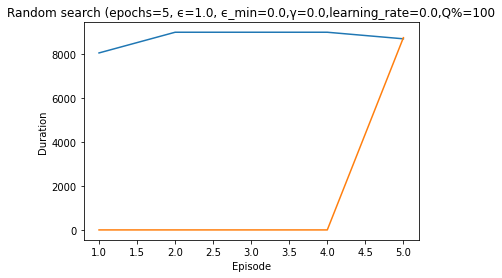

In [8]:
randomlearning_results = learner.epsilon_greedy_search(
    cyberbattlechain_10,
    ep,
    learner=a.QTabularLearner(ep, trained=qlearning_bestrun_10['learner'],
                              gamma=0.0, learning_rate=0.0, exploit_percentile=100),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    title="Random search"
)

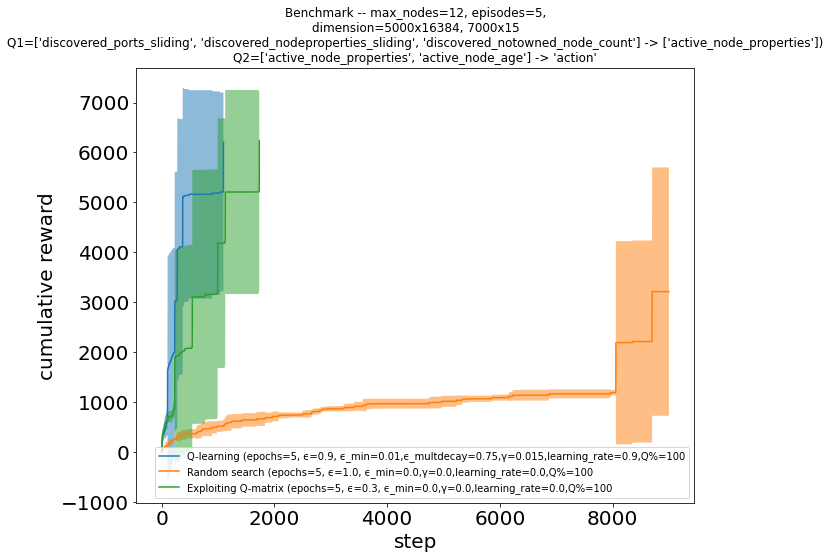

In [9]:
# Plot averaged cumulative rewards for Q-learning vs Random vs Q-Exploit
all_runs = [*qlearning_results,
            randomlearning_results,
            nolearning_results
            ]

Q_source_10 = cast(a.QTabularLearner, qlearning_bestrun_10['learner']).qsource
Q_attack_10 = cast(a.QTabularLearner, qlearning_bestrun_10['learner']).qattack

p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f'Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n'
    f'dimension={Q_source_10.state_space.flat_size()}x{Q_source_10.action_space.flat_size()}, '
    f'{Q_attack_10.state_space.flat_size()}x{Q_attack_10.action_space.flat_size()}\n'
    f'Q1={[f.name() for f in Q_source_10.state_space.feature_selection]} '
    f'-> {[f.name() for f in Q_source_10.action_space.feature_selection]})\n'
    f"Q2={[f.name() for f in Q_attack_10.state_space.feature_selection]} -> 'action'")

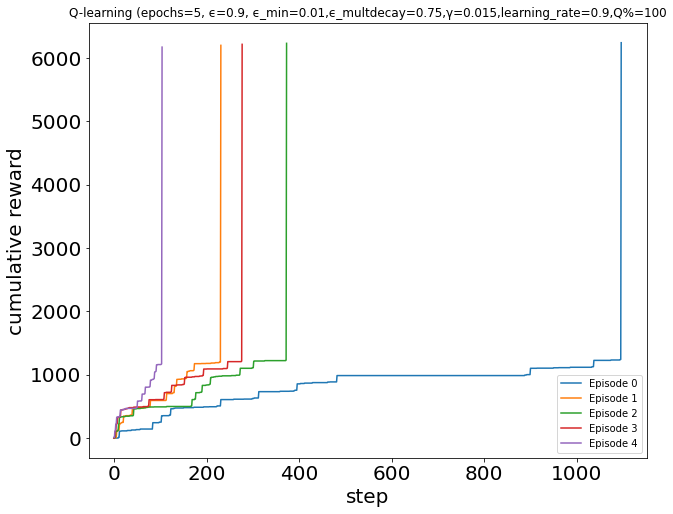

In [10]:
# plot cumulative rewards for all episodes
p.plot_all_episodes(qlearning_results[0])

In [11]:
# Plot the Q-matrices

In [12]:
# Print non-zero coordinate in the Q matrix Q_source
i = np.where(Q_source_10.qm)
q = Q_source_10.qm[i]
list(zip(np.array([Q_source_10.state_space.pretty_print(i) for i in i[0]]),
         np.array([Q_source_10.action_space.pretty_print(i) for i in i[1]]), q))

[('#93',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  0.001857546675000001),
 ('#93', array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]), 8.100089614277135),
 ('#898',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  9.345676511684735),
 ('#1470',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  90.12576899587795),
 ('#1470',
  array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
  10.21499999999999),
 ('#2248', array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]), 7.2),
 ('#2616',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  91.17262601929471),
 ('#2965',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  10.34306515330321),
 ('#3502',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  0.122369833058744),
 ('#3502',
  array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
  10.462612162269938),
 ('#3789',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  90.1388601065992),
 ('#3789',
  array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
  100.14901461

In [13]:
# Print non-zero coordinate in the Q matrix Q_attack
i2 = np.where(Q_attack_10.qm)
q2 = Q_attack_10.qm[i2]
list(zip([Q_attack_10.state_space.pretty_print(i) for i in i2[0]],
         [Q_attack_10.action_space.pretty_print(i) for i in i2[1]], q2))


##################################################

[('#372', 0, 0.00021500378775000007),
 ('#372', 1, 0.0001293235064436755),
 ('#372', 2, 0.00012287112750000012),
 ('#372', 4, 0.00020096311928847425),
 ('#372', 5, 0.0009128311444942501),
 ('#372', 6, 0.0009046752234331415),
 ('#372', 7, 0.0009391160250000015),
 ('#372', 8, 0.00020096311928847403),
 ('#372', 11, 0.0010330276275000005),
 ('#456', 0, 0.0018620801076198914),
 ('#456', 1, 0.015652102256119585),
 ('#456', 2, 0.0018734714281108027),
 ('#456', 3, 0.0017765141996715222),
 ('#456', 5, 0.00789569068127425),
 ('#456', 6, 0.007997324123489427),
 ('#456', 7, 0.0018641026821942322),
 ('#456', 8, 0.001862008958650076),
 ('#456', 9, 0.0017793790021217518),
 ('#456', 10, 0.014957675678421323),
 ('#456', 11, 0.0020479807524971354),
 ('#456', 12, 0.0018620412125645227),
 ('#456', 13, 2.398267548843743e-05),
 ('#456', 14, 3.6662260098848644e-06),
 ('#900', 0, 0.13515934337906804),
 ('#900', 1, 6.001163549571546),
 ('#900', 2, 0.1213785),
 ('#900', 3, 0.13499272959499353),
 ('#900', 4, 9.0

## Transfer learning from size 4 to size 10
Exploiting Q-matrix learned from a different network.

###### Q-learning
Learning with: episode_count=5,iteration_count=9000,ϵ=0.9,ϵ_min=0.01, ϵ_multdecay=0.75,γ=0.015,learning_rate=0.9,Q%=100
  ## Episode: 1/5 'Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.9,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   13.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   15.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   15.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  115.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  115.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  121.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  121.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  127.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  127.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:  135.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 62|reward:  144.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 62|reward:  144.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  244.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  244.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 80|reward:  250.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 80|reward:  250.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  252.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  252.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward:  256.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward:  256.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 146|reward:  256.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 172|reward:  265.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 172|reward:  265.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 1|Iteration 173|reward:  365.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 1|Iteration 173|reward:  365.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 1|Iteration 202|reward:  371.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 1|Iteration 202|reward:  371.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 1|Iteration 211|reward:  379.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 1|Iteration 211|reward:  379.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 1|Iteration 253|reward:  385.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 1|Iteration 253|reward:  385.0|last_reward_at:  253|Elapsed Time: 0:00:00||

Episode 1|Iteration 300|reward:  385.0|last_reward_at:  253|Elapsed Time: 0:00:00||

Episode 1|Iteration 342|reward:  385.0|last_reward_at:  253|Elapsed Time: 0:00:00||

Episode 1|Iteration 343|reward:  394.0|last_reward_at:  253|Elapsed Time: 0:00:00||

Episode 1|Iteration 343|reward:  394.0|last_reward_at:  343|Elapsed Time: 0:00:00||

Episode 1|Iteration 353|reward:  494.0|last_reward_at:  343|Elapsed Time: 0:00:00||

Episode 1|Iteration 353|reward:  494.0|last_reward_at:  353|Elapsed Time: 0:00:00||

Episode 1|Iteration 370|reward:  500.0|last_reward_at:  353|Elapsed Time: 0:00:00||

Episode 1|Iteration 370|reward:  500.0|last_reward_at:  370|Elapsed Time: 0:00:00||

Episode 1|Iteration 414|reward:  500.0|last_reward_at:  370|Elapsed Time: 0:00:00||

Episode 1|Iteration 456|reward:  500.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 1|Iteration 493|reward:  509.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 1|Iteration 493|reward:  509.0|last_reward_at:  493|Elapsed Time: 0:00:01||

Episode 1|Iteration 498|reward: 5509.0|last_reward_at:  493|Elapsed Time: 0:00:01||

Episode 1|Iteration 498|reward: 5509.0|last_reward_at:  498|Elapsed Time: 0:00:01||

  Episode 1 ended at t=498 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/112 (0.07)
    explore-remote: 8/176 (0.04)
    explore-connect: 0/168 (0.00)
    exploit-local: 0/7 (0.00)
    exploit-remote: 0/13 (0.00)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 25
  ## Episode: 2/5 'Q-learning' ϵ=0.6750, γ=0.015,learning_rate=0.9,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  111.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  111.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  113.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  113.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  119.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  119.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:  128.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:  128.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:  228.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:  228.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  234.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  234.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  238.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  238.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 45|reward:  240.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 45|reward:  240.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  246.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  246.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  252.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  252.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 71|reward:  261.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 71|reward:  261.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  361.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  361.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 2|Iteration 85|reward:  367.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 2|Iteration 85|reward:  367.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 2|Iteration 86|reward:  373.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 2|Iteration 86|reward:  373.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 107|reward:  381.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 107|reward:  381.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 2|Iteration 148|reward:  381.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 2|Iteration 192|reward:  381.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 2|Iteration 202|reward:  390.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 2|Iteration 202|reward:  390.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 2|Iteration 208|reward:  490.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 2|Iteration 208|reward:  490.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 2|Iteration 211|reward:  496.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 2|Iteration 211|reward:  496.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 2|Iteration 243|reward:  505.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 2|Iteration 243|reward:  505.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 2|Iteration 247|reward: 5505.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 2|Iteration 247|reward: 5505.0|last_reward_at:  247|Elapsed Time: 0:00:00||

  Episode 2 ended at t=247 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/41 (0.11)
    explore-remote: 6/85 (0.07)
    explore-connect: 0/79 (0.00)
    exploit-local: 4/9 (0.31)
    exploit-remote: 2/11 (0.15)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 40
  ## Episode: 3/5 'Q-learning' ϵ=0.5063, γ=0.015,learning_rate=0.9,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  115.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  121.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  121.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  130.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  230.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  230.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  236.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  236.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  238.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  238.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  247.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  247.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  253.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  253.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  353.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  353.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  355.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  355.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  357.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  357.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  359.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  359.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  365.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  365.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:  374.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:  374.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 56|reward:  474.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 56|reward:  474.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 3|Iteration 62|reward:  480.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 3|Iteration 62|reward:  480.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 3|Iteration 68|reward:  486.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 3|Iteration 68|reward:  486.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 3|Iteration 101|reward:  486.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 3|Iteration 106|reward:  495.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 3|Iteration 106|reward:  495.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 3|Iteration 108|reward: 5495.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 3|Iteration 108|reward: 5495.0|last_reward_at:  108|Elapsed Time: 0:00:00||

  Episode 3 ended at t=108 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/17 (0.11)
    explore-remote: 5/23 (0.18)
    explore-connect: 0/29 (0.00)
    exploit-local: 7/7 (0.50)
    exploit-remote: 2/11 (0.15)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 26
  ## Episode: 4/5 'Q-learning' ϵ=0.3797, γ=0.015,learning_rate=0.9,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  115.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  117.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  117.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  125.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  125.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  131.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  131.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  133.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  133.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:  142.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:  142.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  242.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  242.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  248.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  248.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  257.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  257.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward:  357.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward:  357.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 63|reward:  363.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 63|reward:  363.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 4|Iteration 66|reward:  372.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 4|Iteration 66|reward:  372.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 4|Iteration 68|reward:  472.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 4|Iteration 68|reward:  472.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 4|Iteration 72|reward:  478.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 4|Iteration 72|reward:  478.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  480.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  480.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 79|reward:  486.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 79|reward:  486.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 4|Iteration 83|reward:  492.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 4|Iteration 83|reward:  492.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 4|Iteration 90|reward:  501.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 4|Iteration 90|reward:  501.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 4|Iteration 91|reward: 5501.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 4|Iteration 91|reward: 5501.0|last_reward_at:   91|Elapsed Time: 0:00:00||

  Episode 4 ended at t=91 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/12 (0.08)
    explore-remote: 5/20 (0.20)
    explore-connect: 0/24 (0.00)
    exploit-local: 8/6 (0.57)
    exploit-remote: 2/8 (0.20)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 30
  ## Episode: 5/5 'Q-learning' ϵ=0.2848, γ=0.015,learning_rate=0.9,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  123.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  123.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  132.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  134.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  134.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  234.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  234.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  240.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  240.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  249.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  249.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  349.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  349.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  351.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  351.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  357.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  357.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:  366.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:  366.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:  466.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:  466.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  472.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  472.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward:  474.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward:  474.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 5|Iteration 42|reward:  480.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 5|Iteration 42|reward:  480.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:  486.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:  486.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 58|reward:  492.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 58|reward:  492.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:  492.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 5|Iteration 92|reward:  494.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 5|Iteration 92|reward:  494.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  494.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 5|Iteration 128|reward:  503.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 5|Iteration 128|reward:  503.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 5|Iteration 130|reward: 5503.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 5|Iteration 130|reward: 5503.0|last_reward_at:  130|Elapsed Time: 0:00:00||

  Episode 5 ended at t=130 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/13 (0.13)
    explore-remote: 4/28 (0.12)
    explore-connect: 0/20 (0.00)
    exploit-local: 7/19 (0.27)
    exploit-remote: 4/28 (0.12)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 40
simulation ended


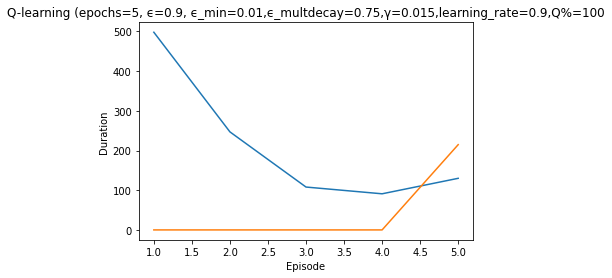

###### One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4
Learning with: episode_count=5,iteration_count=9000,ϵ=0.5,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=0
  ## Episode: 1/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:    9.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  109.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  109.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  111.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  111.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  113.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  113.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  122.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  122.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  222.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  222.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:  228.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:  228.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  234.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  234.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 60|reward:  240.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 60|reward:  240.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  244.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  244.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 75|reward:  250.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 75|reward:  250.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 1|Iteration 107|reward:  252.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 1|Iteration 107|reward:  252.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 1|Iteration 139|reward:  252.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 1|Iteration 174|reward:  252.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 1|Iteration 186|reward:  261.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 1|Iteration 186|reward:  261.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 1|Iteration 187|reward:  361.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 1|Iteration 187|reward:  361.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 1|Iteration 206|reward:  367.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 1|Iteration 206|reward:  367.0|last_reward_at:  206|Elapsed Time: 0:00:00||

Episode 1|Iteration 217|reward:  376.0|last_reward_at:  206|Elapsed Time: 0:00:00||

Episode 1|Iteration 217|reward:  376.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 1|Iteration 218|reward:  476.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 1|Iteration 218|reward:  476.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 1|Iteration 220|reward:  482.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 1|Iteration 220|reward:  482.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 1|Iteration 228|reward:  486.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 1|Iteration 228|reward:  486.0|last_reward_at:  228|Elapsed Time: 0:00:00||

Episode 1|Iteration 235|reward:  488.0|last_reward_at:  228|Elapsed Time: 0:00:00||

Episode 1|Iteration 235|reward:  488.0|last_reward_at:  235|Elapsed Time: 0:00:00||

Episode 1|Iteration 240|reward:  494.0|last_reward_at:  235|Elapsed Time: 0:00:00||

Episode 1|Iteration 240|reward:  494.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 1|Iteration 259|reward:  500.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 1|Iteration 259|reward:  500.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 1|Iteration 287|reward:  500.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 1|Iteration 313|reward:  509.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 1|Iteration 313|reward:  509.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 1|Iteration 314|reward:  609.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 1|Iteration 314|reward:  609.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 1|Iteration 329|reward:  618.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 1|Iteration 329|reward:  618.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 1|Iteration 331|reward:  718.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 1|Iteration 331|reward:  718.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 1|Iteration 335|reward:  724.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 1|Iteration 335|reward:  724.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 1|Iteration 361|reward:  724.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 1|Iteration 385|reward:  730.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 1|Iteration 385|reward:  730.0|last_reward_at:  385|Elapsed Time: 0:00:01||

Episode 1|Iteration 388|reward:  732.0|last_reward_at:  385|Elapsed Time: 0:00:01||

Episode 1|Iteration 388|reward:  732.0|last_reward_at:  388|Elapsed Time: 0:00:01||

Episode 1|Iteration 392|reward:  738.0|last_reward_at:  388|Elapsed Time: 0:00:01||

Episode 1|Iteration 392|reward:  738.0|last_reward_at:  392|Elapsed Time: 0:00:01||

Episode 1|Iteration 393|reward:  744.0|last_reward_at:  392|Elapsed Time: 0:00:01||

Episode 1|Iteration 393|reward:  744.0|last_reward_at:  393|Elapsed Time: 0:00:01||

Episode 1|Iteration 409|reward:  748.0|last_reward_at:  393|Elapsed Time: 0:00:01||

Episode 1|Iteration 409|reward:  748.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 1|Iteration 437|reward:  748.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 1|Iteration 456|reward:  748.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 1|Iteration 465|reward:  757.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 1|Iteration 465|reward:  757.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 1|Iteration 470|reward:  857.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 1|Iteration 470|reward:  857.0|last_reward_at:  470|Elapsed Time: 0:00:01||

Episode 1|Iteration 473|reward:  866.0|last_reward_at:  470|Elapsed Time: 0:00:01||

Episode 1|Iteration 473|reward:  866.0|last_reward_at:  473|Elapsed Time: 0:00:01||

Episode 1|Iteration 474|reward:  966.0|last_reward_at:  473|Elapsed Time: 0:00:01||

Episode 1|Iteration 474|reward:  966.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 1|Iteration 491|reward:  975.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 1|Iteration 491|reward:  975.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 1|Iteration 492|reward: 1075.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 1|Iteration 492|reward: 1075.0|last_reward_at:  492|Elapsed Time: 0:00:01||

Episode 1|Iteration 497|reward: 1084.0|last_reward_at:  492|Elapsed Time: 0:00:01||

Episode 1|Iteration 497|reward: 1084.0|last_reward_at:  497|Elapsed Time: 0:00:01||

Episode 1|Iteration 499|reward: 1184.0|last_reward_at:  497|Elapsed Time: 0:00:01||

Episode 1|Iteration 499|reward: 1184.0|last_reward_at:  499|Elapsed Time: 0:00:01||

Episode 1|Iteration 508|reward: 1190.0|last_reward_at:  499|Elapsed Time: 0:00:01||

Episode 1|Iteration 508|reward: 1190.0|last_reward_at:  508|Elapsed Time: 0:00:01||

Episode 1|Iteration 529|reward: 1190.0|last_reward_at:  508|Elapsed Time: 0:00:01||

Episode 1|Iteration 530|reward: 1196.0|last_reward_at:  508|Elapsed Time: 0:00:01||

Episode 1|Iteration 530|reward: 1196.0|last_reward_at:  530|Elapsed Time: 0:00:01||

Episode 1|Iteration 551|reward: 1196.0|last_reward_at:  530|Elapsed Time: 0:00:02||

Episode 1|Iteration 558|reward: 1202.0|last_reward_at:  530|Elapsed Time: 0:00:02||

Episode 1|Iteration 558|reward: 1202.0|last_reward_at:  558|Elapsed Time: 0:00:02||

Episode 1|Iteration 582|reward: 1202.0|last_reward_at:  558|Elapsed Time: 0:00:02||

Episode 1|Iteration 589|reward: 1211.0|last_reward_at:  558|Elapsed Time: 0:00:02||

Episode 1|Iteration 589|reward: 1211.0|last_reward_at:  589|Elapsed Time: 0:00:02||

Episode 1|Iteration 592|reward: 6211.0|last_reward_at:  589|Elapsed Time: 0:00:02||

Episode 1|Iteration 592|reward: 6211.0|last_reward_at:  592|Elapsed Time: 0:00:02||

  Episode 1 ended at t=592 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/106 (0.11)
    explore-remote: 13/138 (0.09)
    explore-connect: 0/178 (0.00)
    exploit-local: 6/78 (0.07)
    exploit-remote: 2/47 (0.04)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 149
  ## Episode: 2/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  109.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  218.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  218.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  224.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  224.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  228.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  228.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  230.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  230.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  239.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  239.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  241.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  241.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  341.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  341.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  347.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  347.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  353.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  353.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  355.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  355.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  361.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  361.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 73|reward:  370.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 73|reward:  370.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 2|Iteration 74|reward:  470.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 2|Iteration 74|reward:  470.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  476.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  476.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 2|Iteration 78|reward:  482.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 2|Iteration 78|reward:  482.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 2|Iteration 95|reward:  486.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 2|Iteration 95|reward:  486.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 2|Iteration 100|reward:  488.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 2|Iteration 100|reward:  488.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 2|Iteration 106|reward:  494.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 2|Iteration 106|reward:  494.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 2|Iteration 111|reward:  503.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 2|Iteration 111|reward:  503.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 2|Iteration 116|reward:  603.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 2|Iteration 116|reward:  603.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 2|Iteration 143|reward:  603.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 2|Iteration 171|reward:  609.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 2|Iteration 171|reward:  609.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 2|Iteration 200|reward:  609.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward:  609.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 2|Iteration 233|reward:  615.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 2|Iteration 233|reward:  615.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 2|Iteration 242|reward:  623.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 2|Iteration 242|reward:  623.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 2|Iteration 256|reward:  632.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 2|Iteration 256|reward:  632.0|last_reward_at:  256|Elapsed Time: 0:00:00||

Episode 2|Iteration 259|reward:  732.0|last_reward_at:  256|Elapsed Time: 0:00:00||

Episode 2|Iteration 259|reward:  732.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 2|Iteration 264|reward:  738.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 2|Iteration 264|reward:  738.0|last_reward_at:  264|Elapsed Time: 0:00:00||

Episode 2|Iteration 265|reward:  744.0|last_reward_at:  264|Elapsed Time: 0:00:00||

Episode 2|Iteration 265|reward:  744.0|last_reward_at:  265|Elapsed Time: 0:00:00||

Episode 2|Iteration 283|reward:  748.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 2|Iteration 283|reward:  748.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 2|Iteration 309|reward:  748.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 2|Iteration 318|reward:  750.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 2|Iteration 318|reward:  750.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 341|reward:  750.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 365|reward:  750.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 392|reward:  750.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 416|reward:  750.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 443|reward:  750.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 469|reward:  750.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 497|reward:  750.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 523|reward:  750.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 2|Iteration 550|reward:  750.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 2|Iteration 570|reward:  750.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 2|Iteration 596|reward:  750.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 2|Iteration 623|reward:  750.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 2|Iteration 650|reward:  750.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 2|Iteration 675|reward:  750.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 2|Iteration 701|reward:  750.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 2|Iteration 727|reward:  750.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 2|Iteration 753|reward:  750.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 2|Iteration 779|reward:  750.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 2|Iteration 798|reward:  750.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 2|Iteration 821|reward:  759.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 2|Iteration 821|reward:  759.0|last_reward_at:  821|Elapsed Time: 0:00:03||

Episode 2|Iteration 822|reward:  859.0|last_reward_at:  821|Elapsed Time: 0:00:03||

Episode 2|Iteration 822|reward:  859.0|last_reward_at:  822|Elapsed Time: 0:00:03||

Episode 2|Iteration 850|reward:  859.0|last_reward_at:  822|Elapsed Time: 0:00:03||

Episode 2|Iteration 875|reward:  859.0|last_reward_at:  822|Elapsed Time: 0:00:03||

Episode 2|Iteration 880|reward:  868.0|last_reward_at:  822|Elapsed Time: 0:00:03||

Episode 2|Iteration 880|reward:  868.0|last_reward_at:  880|Elapsed Time: 0:00:03||

Episode 2|Iteration 881|reward:  968.0|last_reward_at:  880|Elapsed Time: 0:00:03||

Episode 2|Iteration 881|reward:  968.0|last_reward_at:  881|Elapsed Time: 0:00:03||

Episode 2|Iteration 904|reward:  977.0|last_reward_at:  881|Elapsed Time: 0:00:03||

Episode 2|Iteration 904|reward:  977.0|last_reward_at:  904|Elapsed Time: 0:00:03||

Episode 2|Iteration 906|reward: 1077.0|last_reward_at:  904|Elapsed Time: 0:00:03||

Episode 2|Iteration 906|reward: 1077.0|last_reward_at:  906|Elapsed Time: 0:00:03||

Episode 2|Iteration 911|reward: 1083.0|last_reward_at:  906|Elapsed Time: 0:00:03||

Episode 2|Iteration 911|reward: 1083.0|last_reward_at:  911|Elapsed Time: 0:00:03||

Episode 2|Iteration 916|reward: 1085.0|last_reward_at:  911|Elapsed Time: 0:00:03||

Episode 2|Iteration 916|reward: 1085.0|last_reward_at:  916|Elapsed Time: 0:00:03||

Episode 2|Iteration 927|reward: 1087.0|last_reward_at:  916|Elapsed Time: 0:00:03||

Episode 2|Iteration 927|reward: 1087.0|last_reward_at:  927|Elapsed Time: 0:00:03||

Episode 2|Iteration 936|reward: 1093.0|last_reward_at:  927|Elapsed Time: 0:00:03||

Episode 2|Iteration 936|reward: 1093.0|last_reward_at:  936|Elapsed Time: 0:00:03||

Episode 2|Iteration 940|reward: 1099.0|last_reward_at:  936|Elapsed Time: 0:00:03||

Episode 2|Iteration 940|reward: 1099.0|last_reward_at:  940|Elapsed Time: 0:00:03||

Episode 2|Iteration 962|reward: 1099.0|last_reward_at:  940|Elapsed Time: 0:00:03||

Episode 2|Iteration 983|reward: 1099.0|last_reward_at:  940|Elapsed Time: 0:00:03||

Episode 2|Iteration 1007|reward: 1099.0|last_reward_at:  940|Elapsed Time: 0:00:03||

Episode 2|Iteration 1021|reward: 1108.0|last_reward_at:  940|Elapsed Time: 0:00:03||

Episode 2|Iteration 1021|reward: 1108.0|last_reward_at: 1021|Elapsed Time: 0:00:03||

Episode 2|Iteration 1022|reward: 1208.0|last_reward_at: 1021|Elapsed Time: 0:00:04||

Episode 2|Iteration 1022|reward: 1208.0|last_reward_at: 1022|Elapsed Time: 0:00:04||

Episode 2|Iteration 1046|reward: 1214.0|last_reward_at: 1022|Elapsed Time: 0:00:04||

Episode 2|Iteration 1046|reward: 1214.0|last_reward_at: 1046|Elapsed Time: 0:00:04||

Episode 2|Iteration 1052|reward: 1220.0|last_reward_at: 1046|Elapsed Time: 0:00:04||

Episode 2|Iteration 1052|reward: 1220.0|last_reward_at: 1052|Elapsed Time: 0:00:04||

Episode 2|Iteration 1073|reward: 1220.0|last_reward_at: 1052|Elapsed Time: 0:00:04||

Episode 2|Iteration 1076|reward: 1226.0|last_reward_at: 1052|Elapsed Time: 0:00:04||

Episode 2|Iteration 1076|reward: 1226.0|last_reward_at: 1076|Elapsed Time: 0:00:04||

Episode 2|Iteration 1092|reward: 1232.0|last_reward_at: 1076|Elapsed Time: 0:00:04||

Episode 2|Iteration 1092|reward: 1232.0|last_reward_at: 1092|Elapsed Time: 0:00:04||

Episode 2|Iteration 1098|reward: 1241.0|last_reward_at: 1092|Elapsed Time: 0:00:04||

Episode 2|Iteration 1098|reward: 1241.0|last_reward_at: 1098|Elapsed Time: 0:00:04||

Episode 2|Iteration 1101|reward: 6241.0|last_reward_at: 1098|Elapsed Time: 0:00:04||

Episode 2|Iteration 1101|reward: 6241.0|last_reward_at: 1101|Elapsed Time: 0:00:04||

  Episode 2 ended at t=1101 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/244 (0.05)
    explore-remote: 16/278 (0.05)
    explore-connect: 0/312 (0.00)
    exploit-local: 8/143 (0.05)
    exploit-remote: 3/73 (0.04)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 291
  ## Episode: 3/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  109.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  220.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  220.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  229.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  229.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  329.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  329.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  338.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  338.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  438.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  438.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  444.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  444.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  446.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  446.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  448.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  448.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:  454.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:  454.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward:  456.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward:  456.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward:  462.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward:  462.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  468.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  468.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 56|reward:  474.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 56|reward:  474.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 3|Iteration 60|reward:  483.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 3|Iteration 60|reward:  483.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward:  583.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward:  583.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 3|Iteration 91|reward:  585.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 3|Iteration 91|reward:  585.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 3|Iteration 110|reward:  587.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 3|Iteration 110|reward:  587.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 3|Iteration 119|reward:  593.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 3|Iteration 119|reward:  593.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 3|Iteration 146|reward:  593.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 3|Iteration 171|reward:  599.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 3|Iteration 171|reward:  599.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 3|Iteration 196|reward:  605.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 3|Iteration 196|reward:  605.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 3|Iteration 207|reward:  611.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 3|Iteration 207|reward:  611.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 3|Iteration 226|reward:  620.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 3|Iteration 226|reward:  620.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  720.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  720.0|last_reward_at:  228|Elapsed Time: 0:00:00||

Episode 3|Iteration 245|reward:  726.0|last_reward_at:  228|Elapsed Time: 0:00:00||

Episode 3|Iteration 245|reward:  726.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 3|Iteration 248|reward:  732.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 3|Iteration 248|reward:  732.0|last_reward_at:  248|Elapsed Time: 0:00:00||

Episode 3|Iteration 268|reward:  738.0|last_reward_at:  248|Elapsed Time: 0:00:00||

Episode 3|Iteration 268|reward:  738.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 3|Iteration 276|reward:  747.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 3|Iteration 276|reward:  747.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 3|Iteration 281|reward:  847.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 3|Iteration 281|reward:  847.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 3|Iteration 286|reward:  853.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 3|Iteration 286|reward:  853.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 3|Iteration 300|reward:  859.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 3|Iteration 300|reward:  859.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 3|Iteration 316|reward:  861.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 3|Iteration 316|reward:  861.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 3|Iteration 330|reward:  869.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 3|Iteration 330|reward:  869.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 3|Iteration 354|reward:  869.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 3|Iteration 370|reward:  871.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 3|Iteration 370|reward:  871.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 3|Iteration 371|reward:  880.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 3|Iteration 371|reward:  880.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 3|Iteration 372|reward:  980.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 3|Iteration 372|reward:  980.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 3|Iteration 375|reward:  986.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 3|Iteration 375|reward:  986.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 3|Iteration 394|reward:  990.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 3|Iteration 394|reward:  990.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 3|Iteration 418|reward:  992.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 3|Iteration 418|reward:  992.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 3|Iteration 441|reward:  992.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 3|Iteration 456|reward:  992.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 3|Iteration 479|reward:  992.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 3|Iteration 503|reward:  992.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 3|Iteration 527|reward:  992.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 3|Iteration 548|reward:  992.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 3|Iteration 570|reward:  992.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 3|Iteration 593|reward:  992.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 3|Iteration 616|reward:  992.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 3|Iteration 640|reward:  992.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 3|Iteration 653|reward: 1001.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 3|Iteration 653|reward: 1001.0|last_reward_at:  653|Elapsed Time: 0:00:02||

Episode 3|Iteration 654|reward: 1101.0|last_reward_at:  653|Elapsed Time: 0:00:02||

Episode 3|Iteration 654|reward: 1101.0|last_reward_at:  654|Elapsed Time: 0:00:02||

Episode 3|Iteration 677|reward: 1101.0|last_reward_at:  654|Elapsed Time: 0:00:02||

Episode 3|Iteration 699|reward: 1101.0|last_reward_at:  654|Elapsed Time: 0:00:02||

Episode 3|Iteration 722|reward: 1101.0|last_reward_at:  654|Elapsed Time: 0:00:02||

Episode 3|Iteration 745|reward: 1101.0|last_reward_at:  654|Elapsed Time: 0:00:03||

Episode 3|Iteration 765|reward: 1101.0|last_reward_at:  654|Elapsed Time: 0:00:03||

Episode 3|Iteration 789|reward: 1101.0|last_reward_at:  654|Elapsed Time: 0:00:03||

Episode 3|Iteration 810|reward: 1101.0|last_reward_at:  654|Elapsed Time: 0:00:03||

Episode 3|Iteration 834|reward: 1101.0|last_reward_at:  654|Elapsed Time: 0:00:03||

Episode 3|Iteration 857|reward: 1101.0|last_reward_at:  654|Elapsed Time: 0:00:03||

Episode 3|Iteration 867|reward: 1110.0|last_reward_at:  654|Elapsed Time: 0:00:03||

Episode 3|Iteration 867|reward: 1110.0|last_reward_at:  867|Elapsed Time: 0:00:03||

Episode 3|Iteration 869|reward: 1210.0|last_reward_at:  867|Elapsed Time: 0:00:03||

Episode 3|Iteration 869|reward: 1210.0|last_reward_at:  869|Elapsed Time: 0:00:03||

Episode 3|Iteration 874|reward: 1216.0|last_reward_at:  869|Elapsed Time: 0:00:03||

Episode 3|Iteration 874|reward: 1216.0|last_reward_at:  874|Elapsed Time: 0:00:03||

Episode 3|Iteration 876|reward: 1222.0|last_reward_at:  874|Elapsed Time: 0:00:03||

Episode 3|Iteration 876|reward: 1222.0|last_reward_at:  876|Elapsed Time: 0:00:03||

Episode 3|Iteration 897|reward: 1222.0|last_reward_at:  876|Elapsed Time: 0:00:03||

Episode 3|Iteration 912|reward: 1222.0|last_reward_at:  876|Elapsed Time: 0:00:03||

Episode 3|Iteration 931|reward: 1222.0|last_reward_at:  876|Elapsed Time: 0:00:03||

Episode 3|Iteration 950|reward: 1228.0|last_reward_at:  876|Elapsed Time: 0:00:04||

Episode 3|Iteration 950|reward: 1228.0|last_reward_at:  950|Elapsed Time: 0:00:04||

Episode 3|Iteration 964|reward: 1234.0|last_reward_at:  950|Elapsed Time: 0:00:04||

Episode 3|Iteration 964|reward: 1234.0|last_reward_at:  964|Elapsed Time: 0:00:04||

Episode 3|Iteration 986|reward: 1234.0|last_reward_at:  964|Elapsed Time: 0:00:04||

Episode 3|Iteration 1007|reward: 1234.0|last_reward_at:  964|Elapsed Time: 0:00:04||

Episode 3|Iteration 1026|reward: 1234.0|last_reward_at:  964|Elapsed Time: 0:00:04||

Episode 3|Iteration 1045|reward: 1234.0|last_reward_at:  964|Elapsed Time: 0:00:04||

Episode 3|Iteration 1066|reward: 1234.0|last_reward_at:  964|Elapsed Time: 0:00:04||

Episode 3|Iteration 1085|reward: 1234.0|last_reward_at:  964|Elapsed Time: 0:00:04||

Episode 3|Iteration 1106|reward: 1234.0|last_reward_at:  964|Elapsed Time: 0:00:04||

Episode 3|Iteration 1126|reward: 1234.0|last_reward_at:  964|Elapsed Time: 0:00:04||

Episode 3|Iteration 1140|reward: 1234.0|last_reward_at:  964|Elapsed Time: 0:00:04||

Episode 3|Iteration 1161|reward: 1234.0|last_reward_at:  964|Elapsed Time: 0:00:05||

Episode 3|Iteration 1182|reward: 1234.0|last_reward_at:  964|Elapsed Time: 0:00:05||

Episode 3|Iteration 1202|reward: 1234.0|last_reward_at:  964|Elapsed Time: 0:00:05||

Episode 3|Iteration 1222|reward: 1234.0|last_reward_at:  964|Elapsed Time: 0:00:05||

Episode 3|Iteration 1241|reward: 1234.0|last_reward_at:  964|Elapsed Time: 0:00:05||

Episode 3|Iteration 1254|reward: 1234.0|last_reward_at:  964|Elapsed Time: 0:00:05||

Episode 3|Iteration 1270|reward: 1243.0|last_reward_at:  964|Elapsed Time: 0:00:05||

Episode 3|Iteration 1270|reward: 1243.0|last_reward_at: 1270|Elapsed Time: 0:00:05||

Episode 3|Iteration 1274|reward: 6243.0|last_reward_at: 1270|Elapsed Time: 0:00:05||

Episode 3|Iteration 1274|reward: 6243.0|last_reward_at: 1274|Elapsed Time: 0:00:05||

  Episode 3 ended at t=1274 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/277 (0.05)
    explore-remote: 16/351 (0.04)
    explore-connect: 0/344 (0.00)
    exploit-local: 7/166 (0.04)
    exploit-remote: 4/84 (0.05)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 374
  ## Episode: 4/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  126.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  126.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  226.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  226.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  228.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  230.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  230.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  236.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  236.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  242.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  242.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  244.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  244.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  250.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  250.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward:  259.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward:  259.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  359.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  359.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 52|reward:  361.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 52|reward:  361.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 4|Iteration 74|reward:  367.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 4|Iteration 74|reward:  367.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  376.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  376.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 77|reward:  476.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 77|reward:  476.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 4|Iteration 93|reward:  482.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 4|Iteration 93|reward:  482.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 4|Iteration 108|reward:  491.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 4|Iteration 108|reward:  491.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 4|Iteration 109|reward:  591.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 4|Iteration 109|reward:  591.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 4|Iteration 140|reward:  591.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 4|Iteration 142|reward:  593.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 4|Iteration 142|reward:  593.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 4|Iteration 171|reward:  599.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 4|Iteration 171|reward:  599.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 4|Iteration 178|reward:  601.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 4|Iteration 178|reward:  601.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 4|Iteration 192|reward:  607.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 4|Iteration 192|reward:  607.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 4|Iteration 193|reward:  615.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 4|Iteration 193|reward:  615.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 4|Iteration 215|reward:  621.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 4|Iteration 215|reward:  621.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 4|Iteration 235|reward:  630.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 4|Iteration 235|reward:  630.0|last_reward_at:  235|Elapsed Time: 0:00:00||

Episode 4|Iteration 236|reward:  730.0|last_reward_at:  235|Elapsed Time: 0:00:00||

Episode 4|Iteration 236|reward:  730.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 4|Iteration 243|reward:  736.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 4|Iteration 243|reward:  736.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 4|Iteration 260|reward:  742.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 4|Iteration 260|reward:  742.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 4|Iteration 285|reward:  744.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 4|Iteration 285|reward:  744.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 4|Iteration 293|reward:  753.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 4|Iteration 293|reward:  753.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 4|Iteration 295|reward:  853.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 4|Iteration 295|reward:  853.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 4|Iteration 308|reward:  862.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 4|Iteration 308|reward:  862.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 4|Iteration 309|reward:  962.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 4|Iteration 309|reward:  962.0|last_reward_at:  309|Elapsed Time: 0:00:01||

Episode 4|Iteration 335|reward:  962.0|last_reward_at:  309|Elapsed Time: 0:00:01||

Episode 4|Iteration 346|reward:  971.0|last_reward_at:  309|Elapsed Time: 0:00:01||

Episode 4|Iteration 346|reward:  971.0|last_reward_at:  346|Elapsed Time: 0:00:01||

Episode 4|Iteration 348|reward:  977.0|last_reward_at:  346|Elapsed Time: 0:00:01||

Episode 4|Iteration 348|reward:  977.0|last_reward_at:  348|Elapsed Time: 0:00:01||

Episode 4|Iteration 351|reward: 1077.0|last_reward_at:  348|Elapsed Time: 0:00:01||

Episode 4|Iteration 351|reward: 1077.0|last_reward_at:  351|Elapsed Time: 0:00:01||

Episode 4|Iteration 352|reward: 1083.0|last_reward_at:  351|Elapsed Time: 0:00:01||

Episode 4|Iteration 352|reward: 1083.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 4|Iteration 364|reward: 1085.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 4|Iteration 364|reward: 1085.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 4|Iteration 366|reward: 1094.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 4|Iteration 366|reward: 1094.0|last_reward_at:  366|Elapsed Time: 0:00:01||

Episode 4|Iteration 369|reward: 1096.0|last_reward_at:  366|Elapsed Time: 0:00:01||

Episode 4|Iteration 369|reward: 1096.0|last_reward_at:  369|Elapsed Time: 0:00:01||

Episode 4|Iteration 370|reward: 1196.0|last_reward_at:  369|Elapsed Time: 0:00:01||

Episode 4|Iteration 370|reward: 1196.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 4|Iteration 391|reward: 1196.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 4|Iteration 400|reward: 1202.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 4|Iteration 400|reward: 1202.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 4|Iteration 402|reward: 1208.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 4|Iteration 402|reward: 1208.0|last_reward_at:  402|Elapsed Time: 0:00:01||

Episode 4|Iteration 407|reward: 1214.0|last_reward_at:  402|Elapsed Time: 0:00:01||

Episode 4|Iteration 407|reward: 1214.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 4|Iteration 428|reward: 1214.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 4|Iteration 441|reward: 1220.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 4|Iteration 441|reward: 1220.0|last_reward_at:  441|Elapsed Time: 0:00:01||

Episode 4|Iteration 445|reward: 1226.0|last_reward_at:  441|Elapsed Time: 0:00:01||

Episode 4|Iteration 445|reward: 1226.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 4|Iteration 451|reward: 1232.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 4|Iteration 451|reward: 1232.0|last_reward_at:  451|Elapsed Time: 0:00:01||

Episode 4|Iteration 473|reward: 1232.0|last_reward_at:  451|Elapsed Time: 0:00:01||

Episode 4|Iteration 495|reward: 1232.0|last_reward_at:  451|Elapsed Time: 0:00:01||

Episode 4|Iteration 517|reward: 1232.0|last_reward_at:  451|Elapsed Time: 0:00:02||

Episode 4|Iteration 539|reward: 1232.0|last_reward_at:  451|Elapsed Time: 0:00:02||

Episode 4|Iteration 540|reward: 1234.0|last_reward_at:  451|Elapsed Time: 0:00:02||

Episode 4|Iteration 540|reward: 1234.0|last_reward_at:  540|Elapsed Time: 0:00:02||

Episode 4|Iteration 558|reward: 1234.0|last_reward_at:  540|Elapsed Time: 0:00:02||

Episode 4|Iteration 570|reward: 1234.0|last_reward_at:  540|Elapsed Time: 0:00:02||

Episode 4|Iteration 572|reward: 1243.0|last_reward_at:  540|Elapsed Time: 0:00:02||

Episode 4|Iteration 572|reward: 1243.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 4|Iteration 574|reward: 6243.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 4|Iteration 574|reward: 6243.0|last_reward_at:  574|Elapsed Time: 0:00:02||

  Episode 4 ended at t=574 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/122 (0.11)
    explore-remote: 15/129 (0.10)
    explore-connect: 0/151 (0.00)
    exploit-local: 6/81 (0.07)
    exploit-remote: 5/39 (0.11)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 153
  ## Episode: 5/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  109.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  218.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  218.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  220.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  220.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  226.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  226.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  232.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  232.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  241.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  241.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  341.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  341.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:  343.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:  343.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  345.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  345.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:  351.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:  351.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 5|Iteration 48|reward:  360.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 5|Iteration 48|reward:  360.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  460.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  460.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 58|reward:  462.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 58|reward:  462.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  468.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  468.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 64|reward:  472.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 64|reward:  472.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 5|Iteration 69|reward:  478.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 5|Iteration 69|reward:  478.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 84|reward:  487.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 84|reward:  487.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 5|Iteration 87|reward:  489.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 5|Iteration 87|reward:  489.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 5|Iteration 88|reward:  589.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 5|Iteration 88|reward:  589.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 5|Iteration 89|reward:  595.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 5|Iteration 89|reward:  595.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  595.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 5|Iteration 115|reward:  601.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 5|Iteration 115|reward:  601.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 5|Iteration 122|reward:  610.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 5|Iteration 122|reward:  610.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 5|Iteration 129|reward:  710.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 5|Iteration 129|reward:  710.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 5|Iteration 143|reward:  716.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 5|Iteration 143|reward:  716.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 5|Iteration 161|reward:  722.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 5|Iteration 161|reward:  722.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 5|Iteration 164|reward:  731.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 5|Iteration 164|reward:  731.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 5|Iteration 166|reward:  831.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 5|Iteration 166|reward:  831.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 5|Iteration 167|reward:  837.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 5|Iteration 167|reward:  837.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 5|Iteration 182|reward:  839.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 5|Iteration 182|reward:  839.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 5|Iteration 201|reward:  848.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 5|Iteration 201|reward:  848.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 5|Iteration 202|reward:  948.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 5|Iteration 202|reward:  948.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 5|Iteration 212|reward:  954.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 5|Iteration 212|reward:  954.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 5|Iteration 219|reward:  960.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 5|Iteration 219|reward:  960.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 5|Iteration 230|reward:  966.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 5|Iteration 230|reward:  966.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 5|Iteration 247|reward:  972.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 5|Iteration 247|reward:  972.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 5|Iteration 271|reward:  976.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 5|Iteration 271|reward:  976.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 5|Iteration 287|reward:  982.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 5|Iteration 287|reward:  982.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 5|Iteration 310|reward:  982.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 5|Iteration 333|reward:  982.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 5|Iteration 347|reward:  988.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 5|Iteration 347|reward:  988.0|last_reward_at:  347|Elapsed Time: 0:00:01||

Episode 5|Iteration 354|reward:  990.0|last_reward_at:  347|Elapsed Time: 0:00:01||

Episode 5|Iteration 354|reward:  990.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 5|Iteration 377|reward:  990.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 5|Iteration 400|reward:  990.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 5|Iteration 421|reward:  990.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 5|Iteration 430|reward:  992.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 5|Iteration 430|reward:  992.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 5|Iteration 453|reward:  992.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 5|Iteration 474|reward:  992.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 5|Iteration 498|reward:  992.0|last_reward_at:  430|Elapsed Time: 0:00:02||

Episode 5|Iteration 523|reward:  992.0|last_reward_at:  430|Elapsed Time: 0:00:02||

Episode 5|Iteration 546|reward:  992.0|last_reward_at:  430|Elapsed Time: 0:00:02||

Episode 5|Iteration 568|reward: 1001.0|last_reward_at:  430|Elapsed Time: 0:00:02||

Episode 5|Iteration 568|reward: 1001.0|last_reward_at:  568|Elapsed Time: 0:00:02||

Episode 5|Iteration 570|reward: 1101.0|last_reward_at:  568|Elapsed Time: 0:00:02||

Episode 5|Iteration 570|reward: 1101.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 5|Iteration 592|reward: 1101.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 5|Iteration 615|reward: 1101.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 5|Iteration 638|reward: 1101.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 5|Iteration 661|reward: 1101.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 5|Iteration 669|reward: 1110.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 5|Iteration 669|reward: 1110.0|last_reward_at:  669|Elapsed Time: 0:00:02||

Episode 5|Iteration 670|reward: 1210.0|last_reward_at:  669|Elapsed Time: 0:00:02||

Episode 5|Iteration 670|reward: 1210.0|last_reward_at:  670|Elapsed Time: 0:00:02||

Episode 5|Iteration 679|reward: 1216.0|last_reward_at:  670|Elapsed Time: 0:00:02||

Episode 5|Iteration 679|reward: 1216.0|last_reward_at:  679|Elapsed Time: 0:00:02||

Episode 5|Iteration 692|reward: 1222.0|last_reward_at:  679|Elapsed Time: 0:00:02||

Episode 5|Iteration 692|reward: 1222.0|last_reward_at:  692|Elapsed Time: 0:00:02||

Episode 5|Iteration 713|reward: 1222.0|last_reward_at:  692|Elapsed Time: 0:00:03||

Episode 5|Iteration 734|reward: 1228.0|last_reward_at:  692|Elapsed Time: 0:00:03||

Episode 5|Iteration 734|reward: 1228.0|last_reward_at:  734|Elapsed Time: 0:00:03||

Episode 5|Iteration 754|reward: 1228.0|last_reward_at:  734|Elapsed Time: 0:00:03||

Episode 5|Iteration 774|reward: 1228.0|last_reward_at:  734|Elapsed Time: 0:00:03||

Episode 5|Iteration 794|reward: 1228.0|last_reward_at:  734|Elapsed Time: 0:00:03||

Episode 5|Iteration 805|reward: 1234.0|last_reward_at:  734|Elapsed Time: 0:00:03||

Episode 5|Iteration 805|reward: 1234.0|last_reward_at:  805|Elapsed Time: 0:00:03||

Episode 5|Iteration 828|reward: 1234.0|last_reward_at:  805|Elapsed Time: 0:00:03||

Episode 5|Iteration 848|reward: 1234.0|last_reward_at:  805|Elapsed Time: 0:00:03||

Episode 5|Iteration 869|reward: 1234.0|last_reward_at:  805|Elapsed Time: 0:00:03||

Episode 5|Iteration 885|reward: 1234.0|last_reward_at:  805|Elapsed Time: 0:00:03||

Episode 5|Iteration 906|reward: 1234.0|last_reward_at:  805|Elapsed Time: 0:00:04||

Episode 5|Iteration 927|reward: 1234.0|last_reward_at:  805|Elapsed Time: 0:00:04||

Episode 5|Iteration 946|reward: 1234.0|last_reward_at:  805|Elapsed Time: 0:00:04||

Episode 5|Iteration 966|reward: 1234.0|last_reward_at:  805|Elapsed Time: 0:00:04||

Episode 5|Iteration 986|reward: 1234.0|last_reward_at:  805|Elapsed Time: 0:00:04||

Episode 5|Iteration 991|reward: 1243.0|last_reward_at:  805|Elapsed Time: 0:00:04||

Episode 5|Iteration 991|reward: 1243.0|last_reward_at:  991|Elapsed Time: 0:00:04||

Episode 5|Iteration 992|reward: 6243.0|last_reward_at:  991|Elapsed Time: 0:00:04||

Episode 5|Iteration 992|reward: 6243.0|last_reward_at:  992|Elapsed Time: 0:00:04||

  Episode 5 ended at t=992 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/212 (0.07)
    explore-remote: 17/244 (0.07)
    explore-connect: 0/309 (0.00)
    exploit-local: 6/122 (0.05)
    exploit-remote: 3/53 (0.05)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 281
simulation ended


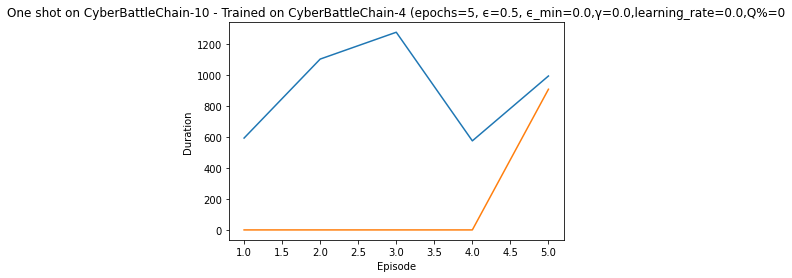

###### Benchmark
Learning with: episode_count=5,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/5 'Benchmark' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  111.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  111.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward:  113.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward:  113.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 1|Iteration 74|reward:  122.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 1|Iteration 74|reward:  122.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 1|Iteration 83|reward:  128.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 1|Iteration 83|reward:  128.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 1|Iteration 87|reward:  134.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 1|Iteration 87|reward:  134.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  142.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  142.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 157|reward:  142.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 223|reward:  142.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 230|reward:  242.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 230|reward:  242.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 1|Iteration 234|reward:  251.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 1|Iteration 234|reward:  251.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 1|Iteration 241|reward:  253.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 1|Iteration 241|reward:  253.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 1|Iteration 251|reward:  257.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 1|Iteration 251|reward:  257.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 1|Iteration 284|reward:  357.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 1|Iteration 284|reward:  357.0|last_reward_at:  284|Elapsed Time: 0:00:00||

Episode 1|Iteration 290|reward:  366.0|last_reward_at:  284|Elapsed Time: 0:00:00||

Episode 1|Iteration 290|reward:  366.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 1|Iteration 292|reward:  374.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 1|Iteration 292|reward:  374.0|last_reward_at:  292|Elapsed Time: 0:00:00||

Episode 1|Iteration 306|reward:  380.0|last_reward_at:  292|Elapsed Time: 0:00:00||

Episode 1|Iteration 306|reward:  380.0|last_reward_at:  306|Elapsed Time: 0:00:00||

Episode 1|Iteration 331|reward:  386.0|last_reward_at:  306|Elapsed Time: 0:00:00||

Episode 1|Iteration 331|reward:  386.0|last_reward_at:  331|Elapsed Time: 0:00:00||

Episode 1|Iteration 386|reward:  386.0|last_reward_at:  331|Elapsed Time: 0:00:00||

Episode 1|Iteration 409|reward:  392.0|last_reward_at:  331|Elapsed Time: 0:00:00||

Episode 1|Iteration 409|reward:  392.0|last_reward_at:  409|Elapsed Time: 0:00:00||

Episode 1|Iteration 456|reward:  392.0|last_reward_at:  409|Elapsed Time: 0:00:00||

Episode 1|Iteration 511|reward:  392.0|last_reward_at:  409|Elapsed Time: 0:00:00||

Episode 1|Iteration 567|reward:  392.0|last_reward_at:  409|Elapsed Time: 0:00:00||

Episode 1|Iteration 623|reward:  392.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 1|Iteration 677|reward:  392.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 1|Iteration 731|reward:  392.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 1|Iteration 784|reward:  392.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 1|Iteration 840|reward:  392.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 1|Iteration 896|reward:  392.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 1|Iteration 951|reward:  392.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 1|Iteration 1006|reward:  392.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 1|Iteration 1039|reward:  492.0|last_reward_at:  409|Elapsed Time: 0:00:01||

Episode 1|Iteration 1039|reward:  492.0|last_reward_at: 1039|Elapsed Time: 0:00:01||

Episode 1|Iteration 1059|reward:  498.0|last_reward_at: 1039|Elapsed Time: 0:00:01||

Episode 1|Iteration 1059|reward:  498.0|last_reward_at: 1059|Elapsed Time: 0:00:01||

Episode 1|Iteration 1070|reward:  507.0|last_reward_at: 1059|Elapsed Time: 0:00:01||

Episode 1|Iteration 1070|reward:  507.0|last_reward_at: 1070|Elapsed Time: 0:00:01||

Episode 1|Iteration 1119|reward:  507.0|last_reward_at: 1070|Elapsed Time: 0:00:02||

Episode 1|Iteration 1147|reward:  509.0|last_reward_at: 1070|Elapsed Time: 0:00:02||

Episode 1|Iteration 1147|reward:  509.0|last_reward_at: 1147|Elapsed Time: 0:00:02||

Episode 1|Iteration 1197|reward:  509.0|last_reward_at: 1147|Elapsed Time: 0:00:02||

Episode 1|Iteration 1235|reward:  513.0|last_reward_at: 1147|Elapsed Time: 0:00:02||

Episode 1|Iteration 1235|reward:  513.0|last_reward_at: 1235|Elapsed Time: 0:00:02||

Episode 1|Iteration 1283|reward:  513.0|last_reward_at: 1235|Elapsed Time: 0:00:02||

Episode 1|Iteration 1332|reward:  513.0|last_reward_at: 1235|Elapsed Time: 0:00:02||

Episode 1|Iteration 1355|reward:  613.0|last_reward_at: 1235|Elapsed Time: 0:00:02||

Episode 1|Iteration 1355|reward:  613.0|last_reward_at: 1355|Elapsed Time: 0:00:02||

Episode 1|Iteration 1402|reward:  613.0|last_reward_at: 1355|Elapsed Time: 0:00:02||

Episode 1|Iteration 1432|reward:  622.0|last_reward_at: 1355|Elapsed Time: 0:00:02||

Episode 1|Iteration 1432|reward:  622.0|last_reward_at: 1432|Elapsed Time: 0:00:02||

Episode 1|Iteration 1443|reward:  630.0|last_reward_at: 1432|Elapsed Time: 0:00:02||

Episode 1|Iteration 1443|reward:  630.0|last_reward_at: 1443|Elapsed Time: 0:00:02||

Episode 1|Iteration 1451|reward:  636.0|last_reward_at: 1443|Elapsed Time: 0:00:02||

Episode 1|Iteration 1451|reward:  636.0|last_reward_at: 1451|Elapsed Time: 0:00:02||

Episode 1|Iteration 1473|reward:  642.0|last_reward_at: 1451|Elapsed Time: 0:00:02||

Episode 1|Iteration 1473|reward:  642.0|last_reward_at: 1473|Elapsed Time: 0:00:02||

Episode 1|Iteration 1518|reward:  642.0|last_reward_at: 1473|Elapsed Time: 0:00:02||

Episode 1|Iteration 1563|reward:  642.0|last_reward_at: 1473|Elapsed Time: 0:00:02||

Episode 1|Iteration 1595|reward:  642.0|last_reward_at: 1473|Elapsed Time: 0:00:03||

Episode 1|Iteration 1640|reward:  642.0|last_reward_at: 1473|Elapsed Time: 0:00:03||

Episode 1|Iteration 1674|reward:  642.0|last_reward_at: 1473|Elapsed Time: 0:00:03||

Episode 1|Iteration 1709|reward:  642.0|last_reward_at: 1473|Elapsed Time: 0:00:03||

Episode 1|Iteration 1752|reward:  642.0|last_reward_at: 1473|Elapsed Time: 0:00:03||

Episode 1|Iteration 1786|reward:  742.0|last_reward_at: 1473|Elapsed Time: 0:00:03||

Episode 1|Iteration 1786|reward:  742.0|last_reward_at: 1786|Elapsed Time: 0:00:03||

Episode 1|Iteration 1823|reward:  742.0|last_reward_at: 1786|Elapsed Time: 0:00:03||

Episode 1|Iteration 1852|reward:  751.0|last_reward_at: 1786|Elapsed Time: 0:00:03||

Episode 1|Iteration 1852|reward:  751.0|last_reward_at: 1852|Elapsed Time: 0:00:03||

Episode 1|Iteration 1859|reward:  851.0|last_reward_at: 1852|Elapsed Time: 0:00:03||

Episode 1|Iteration 1859|reward:  851.0|last_reward_at: 1859|Elapsed Time: 0:00:03||

Episode 1|Iteration 1886|reward:  853.0|last_reward_at: 1859|Elapsed Time: 0:00:03||

Episode 1|Iteration 1886|reward:  853.0|last_reward_at: 1886|Elapsed Time: 0:00:03||

Episode 1|Iteration 1905|reward:  855.0|last_reward_at: 1886|Elapsed Time: 0:00:03||

Episode 1|Iteration 1905|reward:  855.0|last_reward_at: 1905|Elapsed Time: 0:00:03||

Episode 1|Iteration 1915|reward:  864.0|last_reward_at: 1905|Elapsed Time: 0:00:03||

Episode 1|Iteration 1915|reward:  864.0|last_reward_at: 1915|Elapsed Time: 0:00:03||

Episode 1|Iteration 1919|reward:  870.0|last_reward_at: 1915|Elapsed Time: 0:00:03||

Episode 1|Iteration 1919|reward:  870.0|last_reward_at: 1919|Elapsed Time: 0:00:03||

Episode 1|Iteration 1932|reward:  970.0|last_reward_at: 1919|Elapsed Time: 0:00:03||

Episode 1|Iteration 1932|reward:  970.0|last_reward_at: 1932|Elapsed Time: 0:00:03||

Episode 1|Iteration 1937|reward:  979.0|last_reward_at: 1932|Elapsed Time: 0:00:03||

Episode 1|Iteration 1937|reward:  979.0|last_reward_at: 1937|Elapsed Time: 0:00:03||

Episode 1|Iteration 1957|reward:  985.0|last_reward_at: 1937|Elapsed Time: 0:00:03||

Episode 1|Iteration 1957|reward:  985.0|last_reward_at: 1957|Elapsed Time: 0:00:03||

Episode 1|Iteration 1970|reward:  991.0|last_reward_at: 1957|Elapsed Time: 0:00:04||

Episode 1|Iteration 1970|reward:  991.0|last_reward_at: 1970|Elapsed Time: 0:00:04||

Episode 1|Iteration 1981|reward:  997.0|last_reward_at: 1970|Elapsed Time: 0:00:04||

Episode 1|Iteration 1981|reward:  997.0|last_reward_at: 1981|Elapsed Time: 0:00:04||

Episode 1|Iteration 1985|reward: 1001.0|last_reward_at: 1981|Elapsed Time: 0:00:04||

Episode 1|Iteration 1985|reward: 1001.0|last_reward_at: 1985|Elapsed Time: 0:00:04||

Episode 1|Iteration 2020|reward: 1001.0|last_reward_at: 1985|Elapsed Time: 0:00:04||

Episode 1|Iteration 2030|reward: 1007.0|last_reward_at: 1985|Elapsed Time: 0:00:04||

Episode 1|Iteration 2030|reward: 1007.0|last_reward_at: 2030|Elapsed Time: 0:00:04||

Episode 1|Iteration 2051|reward: 1007.0|last_reward_at: 2030|Elapsed Time: 0:00:04||

Episode 1|Iteration 2072|reward: 1009.0|last_reward_at: 2030|Elapsed Time: 0:00:04||

Episode 1|Iteration 2072|reward: 1009.0|last_reward_at: 2072|Elapsed Time: 0:00:04||

Episode 1|Iteration 2106|reward: 1009.0|last_reward_at: 2072|Elapsed Time: 0:00:04||

Episode 1|Iteration 2141|reward: 1009.0|last_reward_at: 2072|Elapsed Time: 0:00:04||

Episode 1|Iteration 2165|reward: 1009.0|last_reward_at: 2072|Elapsed Time: 0:00:04||

Episode 1|Iteration 2198|reward: 1009.0|last_reward_at: 2072|Elapsed Time: 0:00:04||

Episode 1|Iteration 2232|reward: 1009.0|last_reward_at: 2072|Elapsed Time: 0:00:04||

Episode 1|Iteration 2265|reward: 1009.0|last_reward_at: 2072|Elapsed Time: 0:00:04||

Episode 1|Iteration 2300|reward: 1009.0|last_reward_at: 2072|Elapsed Time: 0:00:05||

Episode 1|Iteration 2334|reward: 1009.0|last_reward_at: 2072|Elapsed Time: 0:00:05||

Episode 1|Iteration 2369|reward: 1009.0|last_reward_at: 2072|Elapsed Time: 0:00:05||

Episode 1|Iteration 2393|reward: 1009.0|last_reward_at: 2072|Elapsed Time: 0:00:05||

Episode 1|Iteration 2426|reward: 1009.0|last_reward_at: 2072|Elapsed Time: 0:00:05||

Episode 1|Iteration 2460|reward: 1009.0|last_reward_at: 2072|Elapsed Time: 0:00:05||

Episode 1|Iteration 2467|reward: 1109.0|last_reward_at: 2072|Elapsed Time: 0:00:05||

Episode 1|Iteration 2467|reward: 1109.0|last_reward_at: 2467|Elapsed Time: 0:00:05||

Episode 1|Iteration 2500|reward: 1109.0|last_reward_at: 2467|Elapsed Time: 0:00:05||

Episode 1|Iteration 2508|reward: 1118.0|last_reward_at: 2467|Elapsed Time: 0:00:05||

Episode 1|Iteration 2508|reward: 1118.0|last_reward_at: 2508|Elapsed Time: 0:00:05||

Episode 1|Iteration 2517|reward: 1124.0|last_reward_at: 2508|Elapsed Time: 0:00:05||

Episode 1|Iteration 2517|reward: 1124.0|last_reward_at: 2517|Elapsed Time: 0:00:05||

Episode 1|Iteration 2548|reward: 1124.0|last_reward_at: 2517|Elapsed Time: 0:00:05||

Episode 1|Iteration 2574|reward: 1132.0|last_reward_at: 2517|Elapsed Time: 0:00:05||

Episode 1|Iteration 2574|reward: 1132.0|last_reward_at: 2574|Elapsed Time: 0:00:05||

Episode 1|Iteration 2576|reward: 1138.0|last_reward_at: 2574|Elapsed Time: 0:00:05||

Episode 1|Iteration 2576|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:05||

Episode 1|Iteration 2605|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:05||

Episode 1|Iteration 2636|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:06||

Episode 1|Iteration 2667|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:06||

Episode 1|Iteration 2698|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:06||

Episode 1|Iteration 2728|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:06||

Episode 1|Iteration 2759|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:06||

Episode 1|Iteration 2788|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:06||

Episode 1|Iteration 2818|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:06||

Episode 1|Iteration 2849|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:06||

Episode 1|Iteration 2879|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:06||

Episode 1|Iteration 2909|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:06||

Episode 1|Iteration 2938|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:07||

Episode 1|Iteration 2963|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:07||

Episode 1|Iteration 2993|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:07||

Episode 1|Iteration 3012|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:07||

Episode 1|Iteration 3041|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:07||

Episode 1|Iteration 3072|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:07||

Episode 1|Iteration 3103|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:07||

Episode 1|Iteration 3131|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:07||

Episode 1|Iteration 3161|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:07||

Episode 1|Iteration 3190|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:07||

Episode 1|Iteration 3220|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:08||

Episode 1|Iteration 3251|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:08||

Episode 1|Iteration 3281|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:08||

Episode 1|Iteration 3304|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:08||

Episode 1|Iteration 3333|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:08||

Episode 1|Iteration 3363|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:08||

Episode 1|Iteration 3394|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:08||

Episode 1|Iteration 3418|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:08||

Episode 1|Iteration 3447|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:08||

Episode 1|Iteration 3477|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:08||

Episode 1|Iteration 3507|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:09||

Episode 1|Iteration 3532|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:09||

Episode 1|Iteration 3561|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:09||

Episode 1|Iteration 3591|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:09||

Episode 1|Iteration 3613|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:09||

Episode 1|Iteration 3643|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:09||

Episode 1|Iteration 3673|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:09||

Episode 1|Iteration 3701|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:09||

Episode 1|Iteration 3729|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:09||

Episode 1|Iteration 3755|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:09||

Episode 1|Iteration 3783|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:10||

Episode 1|Iteration 3812|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:10||

Episode 1|Iteration 3839|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:10||

Episode 1|Iteration 3867|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:10||

Episode 1|Iteration 3889|reward: 1138.0|last_reward_at: 2576|Elapsed Time: 0:00:10||

Episode 1|Iteration 3902|reward: 1238.0|last_reward_at: 2576|Elapsed Time: 0:00:10||

Episode 1|Iteration 3902|reward: 1238.0|last_reward_at: 3902|Elapsed Time: 0:00:10||

Episode 1|Iteration 3932|reward: 1238.0|last_reward_at: 3902|Elapsed Time: 0:00:10||

Episode 1|Iteration 3961|reward: 1238.0|last_reward_at: 3902|Elapsed Time: 0:00:10||

Episode 1|Iteration 3988|reward: 1238.0|last_reward_at: 3902|Elapsed Time: 0:00:10||

Episode 1|Iteration 4017|reward: 1238.0|last_reward_at: 3902|Elapsed Time: 0:00:10||

Episode 1|Iteration 4044|reward: 1238.0|last_reward_at: 3902|Elapsed Time: 0:00:10||

Episode 1|Iteration 4067|reward: 1244.0|last_reward_at: 3902|Elapsed Time: 0:00:11||

Episode 1|Iteration 4067|reward: 1244.0|last_reward_at: 4067|Elapsed Time: 0:00:11||

Episode 1|Iteration 4096|reward: 1244.0|last_reward_at: 4067|Elapsed Time: 0:00:11||

Episode 1|Iteration 4123|reward: 1244.0|last_reward_at: 4067|Elapsed Time: 0:00:11||

Episode 1|Iteration 4149|reward: 1253.0|last_reward_at: 4067|Elapsed Time: 0:00:11||

Episode 1|Iteration 4149|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:11||

Episode 1|Iteration 4168|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:11||

Episode 1|Iteration 4195|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:11||

Episode 1|Iteration 4216|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:11||

Episode 1|Iteration 4241|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:11||

Episode 1|Iteration 4268|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:11||

Episode 1|Iteration 4295|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:11||

Episode 1|Iteration 4322|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:12||

Episode 1|Iteration 4347|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:12||

Episode 1|Iteration 4373|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:12||

Episode 1|Iteration 4396|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:12||

Episode 1|Iteration 4415|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:12||

Episode 1|Iteration 4443|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:12||

Episode 1|Iteration 4471|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:12||

Episode 1|Iteration 4499|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:12||

Episode 1|Iteration 4525|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:12||

Episode 1|Iteration 4553|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:12||

Episode 1|Iteration 4580|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:13||

Episode 1|Iteration 4608|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:13||

Episode 1|Iteration 4635|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:13||

Episode 1|Iteration 4662|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:13||

Episode 1|Iteration 4682|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:13||

Episode 1|Iteration 4710|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:13||

Episode 1|Iteration 4738|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:13||

Episode 1|Iteration 4766|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:13||

Episode 1|Iteration 4785|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:13||

Episode 1|Iteration 4811|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:13||

Episode 1|Iteration 4839|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:14||

Episode 1|Iteration 4864|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:14||

Episode 1|Iteration 4891|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:14||

Episode 1|Iteration 4918|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:14||

Episode 1|Iteration 4939|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:14||

Episode 1|Iteration 4966|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:14||

Episode 1|Iteration 4993|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:14||

Episode 1|Iteration 5013|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:14||

Episode 1|Iteration 5039|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:14||

Episode 1|Iteration 5067|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:14||

Episode 1|Iteration 5095|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:15||

Episode 1|Iteration 5122|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:15||

Episode 1|Iteration 5150|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:15||

Episode 1|Iteration 5176|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:15||

Episode 1|Iteration 5203|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:15||

Episode 1|Iteration 5229|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:15||

Episode 1|Iteration 5257|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:15||

Episode 1|Iteration 5284|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:15||

Episode 1|Iteration 5311|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:15||

Episode 1|Iteration 5339|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:15||

Episode 1|Iteration 5355|reward: 1253.0|last_reward_at: 4149|Elapsed Time: 0:00:16||

Episode 1|Iteration 5360|reward: 6253.0|last_reward_at: 4149|Elapsed Time: 0:00:16||

Episode 1|Iteration 5360|reward: 6253.0|last_reward_at: 5360|Elapsed Time: 0:00:16||

  Episode 1 ended at t=5360 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/1475 (0.01)
    explore-remote: 20/1871 (0.01)
    explore-connect: 11/1962 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Benchmark' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:   13.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:   13.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:   15.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  115.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  115.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward:  121.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward:  121.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:  127.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:  127.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  135.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  135.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  144.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  144.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  144.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 178|reward:  144.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 204|reward:  244.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 204|reward:  244.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 2|Iteration 212|reward:  250.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 2|Iteration 212|reward:  250.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 2|Iteration 245|reward:  259.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 2|Iteration 245|reward:  259.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 2|Iteration 256|reward:  263.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 2|Iteration 256|reward:  263.0|last_reward_at:  256|Elapsed Time: 0:00:00||

Episode 2|Iteration 311|reward:  263.0|last_reward_at:  256|Elapsed Time: 0:00:00||

Episode 2|Iteration 314|reward:  265.0|last_reward_at:  256|Elapsed Time: 0:00:00||

Episode 2|Iteration 314|reward:  265.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 2|Iteration 374|reward:  265.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 2|Iteration 434|reward:  265.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 2|Iteration 493|reward:  265.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 2|Iteration 549|reward:  265.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 2|Iteration 609|reward:  265.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 2|Iteration 627|reward:  365.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 2|Iteration 627|reward:  365.0|last_reward_at:  627|Elapsed Time: 0:00:01||

Episode 2|Iteration 672|reward:  374.0|last_reward_at:  627|Elapsed Time: 0:00:01||

Episode 2|Iteration 672|reward:  374.0|last_reward_at:  672|Elapsed Time: 0:00:01||

Episode 2|Iteration 674|reward:  380.0|last_reward_at:  672|Elapsed Time: 0:00:01||

Episode 2|Iteration 674|reward:  380.0|last_reward_at:  674|Elapsed Time: 0:00:01||

Episode 2|Iteration 677|reward:  386.0|last_reward_at:  674|Elapsed Time: 0:00:01||

Episode 2|Iteration 677|reward:  386.0|last_reward_at:  677|Elapsed Time: 0:00:01||

Episode 2|Iteration 703|reward:  394.0|last_reward_at:  677|Elapsed Time: 0:00:01||

Episode 2|Iteration 703|reward:  394.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 2|Iteration 713|reward:  494.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 2|Iteration 713|reward:  494.0|last_reward_at:  713|Elapsed Time: 0:00:01||

Episode 2|Iteration 716|reward:  500.0|last_reward_at:  713|Elapsed Time: 0:00:01||

Episode 2|Iteration 716|reward:  500.0|last_reward_at:  716|Elapsed Time: 0:00:01||

Episode 2|Iteration 718|reward:  502.0|last_reward_at:  716|Elapsed Time: 0:00:01||

Episode 2|Iteration 718|reward:  502.0|last_reward_at:  718|Elapsed Time: 0:00:01||

Episode 2|Iteration 721|reward:  506.0|last_reward_at:  718|Elapsed Time: 0:00:01||

Episode 2|Iteration 721|reward:  506.0|last_reward_at:  721|Elapsed Time: 0:00:01||

Episode 2|Iteration 729|reward:  515.0|last_reward_at:  721|Elapsed Time: 0:00:01||

Episode 2|Iteration 729|reward:  515.0|last_reward_at:  729|Elapsed Time: 0:00:01||

Episode 2|Iteration 772|reward:  515.0|last_reward_at:  729|Elapsed Time: 0:00:01||

Episode 2|Iteration 798|reward:  515.0|last_reward_at:  729|Elapsed Time: 0:00:01||

Episode 2|Iteration 833|reward:  515.0|last_reward_at:  729|Elapsed Time: 0:00:01||

Episode 2|Iteration 878|reward:  615.0|last_reward_at:  729|Elapsed Time: 0:00:01||

Episode 2|Iteration 878|reward:  615.0|last_reward_at:  878|Elapsed Time: 0:00:01||

Episode 2|Iteration 880|reward:  621.0|last_reward_at:  878|Elapsed Time: 0:00:01||

Episode 2|Iteration 880|reward:  621.0|last_reward_at:  880|Elapsed Time: 0:00:01||

Episode 2|Iteration 888|reward:  627.0|last_reward_at:  880|Elapsed Time: 0:00:01||

Episode 2|Iteration 888|reward:  627.0|last_reward_at:  888|Elapsed Time: 0:00:01||

Episode 2|Iteration 909|reward:  635.0|last_reward_at:  888|Elapsed Time: 0:00:01||

Episode 2|Iteration 909|reward:  635.0|last_reward_at:  909|Elapsed Time: 0:00:01||

Episode 2|Iteration 916|reward:  644.0|last_reward_at:  909|Elapsed Time: 0:00:01||

Episode 2|Iteration 916|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:01||

Episode 2|Iteration 962|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:01||

Episode 2|Iteration 1007|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:01||

Episode 2|Iteration 1052|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:02||

Episode 2|Iteration 1099|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:02||

Episode 2|Iteration 1140|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:02||

Episode 2|Iteration 1183|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:02||

Episode 2|Iteration 1226|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:02||

Episode 2|Iteration 1254|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:02||

Episode 2|Iteration 1296|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:02||

Episode 2|Iteration 1340|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:02||

Episode 2|Iteration 1368|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:02||

Episode 2|Iteration 1411|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:02||

Episode 2|Iteration 1454|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:02||

Episode 2|Iteration 1482|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:03||

Episode 2|Iteration 1527|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:03||

Episode 2|Iteration 1570|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:03||

Episode 2|Iteration 1595|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:03||

Episode 2|Iteration 1638|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:03||

Episode 2|Iteration 1675|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:03||

Episode 2|Iteration 1709|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:03||

Episode 2|Iteration 1750|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:03||

Episode 2|Iteration 1795|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:03||

Episode 2|Iteration 1823|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:03||

Episode 2|Iteration 1863|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:03||

Episode 2|Iteration 1903|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:04||

Episode 2|Iteration 1937|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:04||

Episode 2|Iteration 1979|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:04||

Episode 2|Iteration 2024|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:04||

Episode 2|Iteration 2051|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:04||

Episode 2|Iteration 2092|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:04||

Episode 2|Iteration 2132|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:04||

Episode 2|Iteration 2165|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:04||

Episode 2|Iteration 2203|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:04||

Episode 2|Iteration 2246|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:04||

Episode 2|Iteration 2279|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:04||

Episode 2|Iteration 2315|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:05||

Episode 2|Iteration 2358|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:05||

Episode 2|Iteration 2393|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:05||

Episode 2|Iteration 2434|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:05||

Episode 2|Iteration 2478|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:05||

Episode 2|Iteration 2507|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:05||

Episode 2|Iteration 2549|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:05||

Episode 2|Iteration 2592|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:05||

Episode 2|Iteration 2621|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:05||

Episode 2|Iteration 2660|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:05||

Episode 2|Iteration 2699|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:05||

Episode 2|Iteration 2735|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:06||

Episode 2|Iteration 2775|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:06||

Episode 2|Iteration 2817|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:06||

Episode 2|Iteration 2849|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:06||

Episode 2|Iteration 2890|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:06||

Episode 2|Iteration 2929|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:06||

Episode 2|Iteration 2963|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:06||

Episode 2|Iteration 3004|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:06||

Episode 2|Iteration 3043|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:06||

Episode 2|Iteration 3076|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:06||

Episode 2|Iteration 3118|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:07||

Episode 2|Iteration 3162|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:07||

Episode 2|Iteration 3190|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:07||

Episode 2|Iteration 3232|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:07||

Episode 2|Iteration 3276|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:07||

Episode 2|Iteration 3304|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:07||

Episode 2|Iteration 3347|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:07||

Episode 2|Iteration 3389|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:07||

Episode 2|Iteration 3418|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:07||

Episode 2|Iteration 3460|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:07||

Episode 2|Iteration 3502|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:07||

Episode 2|Iteration 3532|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:07||

Episode 2|Iteration 3574|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:08||

Episode 2|Iteration 3616|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:08||

Episode 2|Iteration 3646|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:08||

Episode 2|Iteration 3687|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:08||

Episode 2|Iteration 3728|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:08||

Episode 2|Iteration 3760|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:08||

Episode 2|Iteration 3797|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:08||

Episode 2|Iteration 3838|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:08||

Episode 2|Iteration 3874|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:08||

Episode 2|Iteration 3917|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:08||

Episode 2|Iteration 3961|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:09||

Episode 2|Iteration 3988|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:09||

Episode 2|Iteration 4030|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:09||

Episode 2|Iteration 4072|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:09||

Episode 2|Iteration 4102|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:09||

Episode 2|Iteration 4144|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:09||

Episode 2|Iteration 4185|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:09||

Episode 2|Iteration 4216|reward:  644.0|last_reward_at:  916|Elapsed Time: 0:00:09||

Episode 2|Iteration 4232|reward:  744.0|last_reward_at:  916|Elapsed Time: 0:00:09||

Episode 2|Iteration 4232|reward:  744.0|last_reward_at: 4232|Elapsed Time: 0:00:09||

Episode 2|Iteration 4240|reward:  750.0|last_reward_at: 4232|Elapsed Time: 0:00:09||

Episode 2|Iteration 4240|reward:  750.0|last_reward_at: 4240|Elapsed Time: 0:00:09||

Episode 2|Iteration 4244|reward:  754.0|last_reward_at: 4240|Elapsed Time: 0:00:09||

Episode 2|Iteration 4244|reward:  754.0|last_reward_at: 4244|Elapsed Time: 0:00:09||

Episode 2|Iteration 4282|reward:  754.0|last_reward_at: 4244|Elapsed Time: 0:00:09||

Episode 2|Iteration 4312|reward:  763.0|last_reward_at: 4244|Elapsed Time: 0:00:09||

Episode 2|Iteration 4312|reward:  763.0|last_reward_at: 4312|Elapsed Time: 0:00:09||

Episode 2|Iteration 4343|reward:  765.0|last_reward_at: 4312|Elapsed Time: 0:00:10||

Episode 2|Iteration 4343|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:10||

Episode 2|Iteration 4382|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:10||

Episode 2|Iteration 4419|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:10||

Episode 2|Iteration 4444|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:10||

Episode 2|Iteration 4483|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:10||

Episode 2|Iteration 4523|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:10||

Episode 2|Iteration 4556|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:10||

Episode 2|Iteration 4594|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:10||

Episode 2|Iteration 4632|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:10||

Episode 2|Iteration 4671|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:10||

Episode 2|Iteration 4708|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:10||

Episode 2|Iteration 4748|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:11||

Episode 2|Iteration 4785|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:11||

Episode 2|Iteration 4821|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:11||

Episode 2|Iteration 4857|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:11||

Episode 2|Iteration 4896|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:11||

Episode 2|Iteration 4933|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:11||

Episode 2|Iteration 4971|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:11||

Episode 2|Iteration 5010|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:11||

Episode 2|Iteration 5049|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:11||

Episode 2|Iteration 5088|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:12||

Episode 2|Iteration 5127|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:12||

Episode 2|Iteration 5166|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:12||

Episode 2|Iteration 5201|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:12||

Episode 2|Iteration 5240|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:12||

Episode 2|Iteration 5278|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:12||

Episode 2|Iteration 5318|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:12||

Episode 2|Iteration 5355|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:12||

Episode 2|Iteration 5393|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:12||

Episode 2|Iteration 5432|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:12||

Episode 2|Iteration 5469|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:13||

Episode 2|Iteration 5506|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:13||

Episode 2|Iteration 5545|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:13||

Episode 2|Iteration 5581|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:13||

Episode 2|Iteration 5620|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:13||

Episode 2|Iteration 5657|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:13||

Episode 2|Iteration 5695|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:13||

Episode 2|Iteration 5733|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:13||

Episode 2|Iteration 5771|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:13||

Episode 2|Iteration 5809|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:13||

Episode 2|Iteration 5847|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:14||

Episode 2|Iteration 5883|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:14||

Episode 2|Iteration 5921|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:14||

Episode 2|Iteration 5960|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:14||

Episode 2|Iteration 5997|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:14||

Episode 2|Iteration 6035|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:14||

Episode 2|Iteration 6068|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:14||

Episode 2|Iteration 6105|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:14||

Episode 2|Iteration 6138|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:14||

Episode 2|Iteration 6177|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:14||

Episode 2|Iteration 6214|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:15||

Episode 2|Iteration 6252|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:15||

Episode 2|Iteration 6291|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:15||

Episode 2|Iteration 6328|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:15||

Episode 2|Iteration 6366|reward:  765.0|last_reward_at: 4343|Elapsed Time: 0:00:15||

Episode 2|Iteration 6367|reward:  865.0|last_reward_at: 4343|Elapsed Time: 0:00:15||

Episode 2|Iteration 6367|reward:  865.0|last_reward_at: 6367|Elapsed Time: 0:00:15||

Episode 2|Iteration 6374|reward:  874.0|last_reward_at: 6367|Elapsed Time: 0:00:15||

Episode 2|Iteration 6374|reward:  874.0|last_reward_at: 6374|Elapsed Time: 0:00:15||

Episode 2|Iteration 6394|reward:  882.0|last_reward_at: 6374|Elapsed Time: 0:00:15||

Episode 2|Iteration 6394|reward:  882.0|last_reward_at: 6394|Elapsed Time: 0:00:15||

Episode 2|Iteration 6413|reward:  888.0|last_reward_at: 6394|Elapsed Time: 0:00:15||

Episode 2|Iteration 6413|reward:  888.0|last_reward_at: 6413|Elapsed Time: 0:00:15||

Episode 2|Iteration 6439|reward:  894.0|last_reward_at: 6413|Elapsed Time: 0:00:15||

Episode 2|Iteration 6439|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:15||

Episode 2|Iteration 6470|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:15||

Episode 2|Iteration 6494|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:15||

Episode 2|Iteration 6517|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:15||

Episode 2|Iteration 6550|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:16||

Episode 2|Iteration 6584|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:16||

Episode 2|Iteration 6608|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:16||

Episode 2|Iteration 6641|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:16||

Episode 2|Iteration 6673|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:16||

Episode 2|Iteration 6705|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:16||

Episode 2|Iteration 6722|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:16||

Episode 2|Iteration 6753|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:16||

Episode 2|Iteration 6785|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:16||

Episode 2|Iteration 6817|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:16||

Episode 2|Iteration 6836|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:16||

Episode 2|Iteration 6867|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:17||

Episode 2|Iteration 6900|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:17||

Episode 2|Iteration 6933|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:17||

Episode 2|Iteration 6950|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:17||

Episode 2|Iteration 6982|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:17||

Episode 2|Iteration 7015|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:17||

Episode 2|Iteration 7050|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:17||

Episode 2|Iteration 7083|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:17||

Episode 2|Iteration 7117|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:17||

Episode 2|Iteration 7150|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:17||

Episode 2|Iteration 7178|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:17||

Episode 2|Iteration 7209|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:18||

Episode 2|Iteration 7243|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:18||

Episode 2|Iteration 7275|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:18||

Episode 2|Iteration 7310|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:18||

Episode 2|Iteration 7345|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:18||

Episode 2|Iteration 7377|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:18||

Episode 2|Iteration 7406|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:18||

Episode 2|Iteration 7439|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:18||

Episode 2|Iteration 7472|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:18||

Episode 2|Iteration 7506|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:18||

Episode 2|Iteration 7540|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:19||

Episode 2|Iteration 7573|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:19||

Episode 2|Iteration 7605|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:19||

Episode 2|Iteration 7633|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:19||

Episode 2|Iteration 7666|reward:  894.0|last_reward_at: 6439|Elapsed Time: 0:00:19||

Episode 2|Iteration 7680|reward:  994.0|last_reward_at: 6439|Elapsed Time: 0:00:19||

Episode 2|Iteration 7680|reward:  994.0|last_reward_at: 7680|Elapsed Time: 0:00:19||

Episode 2|Iteration 7713|reward:  994.0|last_reward_at: 7680|Elapsed Time: 0:00:19||

Episode 2|Iteration 7715|reward: 1000.0|last_reward_at: 7680|Elapsed Time: 0:00:19||

Episode 2|Iteration 7715|reward: 1000.0|last_reward_at: 7715|Elapsed Time: 0:00:19||

Episode 2|Iteration 7747|reward: 1000.0|last_reward_at: 7715|Elapsed Time: 0:00:19||

Episode 2|Iteration 7751|reward: 1004.0|last_reward_at: 7715|Elapsed Time: 0:00:19||

Episode 2|Iteration 7751|reward: 1004.0|last_reward_at: 7751|Elapsed Time: 0:00:19||

Episode 2|Iteration 7783|reward: 1004.0|last_reward_at: 7751|Elapsed Time: 0:00:19||

Episode 2|Iteration 7812|reward: 1006.0|last_reward_at: 7751|Elapsed Time: 0:00:19||

Episode 2|Iteration 7812|reward: 1006.0|last_reward_at: 7812|Elapsed Time: 0:00:19||

Episode 2|Iteration 7829|reward: 1015.0|last_reward_at: 7812|Elapsed Time: 0:00:19||

Episode 2|Iteration 7829|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:19||

Episode 2|Iteration 7860|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:20||

Episode 2|Iteration 7892|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:20||

Episode 2|Iteration 7924|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:20||

Episode 2|Iteration 7956|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:20||

Episode 2|Iteration 7975|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:20||

Episode 2|Iteration 8005|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:20||

Episode 2|Iteration 8037|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:20||

Episode 2|Iteration 8068|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:20||

Episode 2|Iteration 8089|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:20||

Episode 2|Iteration 8119|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:20||

Episode 2|Iteration 8151|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:21||

Episode 2|Iteration 8179|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:21||

Episode 2|Iteration 8203|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:21||

Episode 2|Iteration 8233|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:21||

Episode 2|Iteration 8264|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:21||

Episode 2|Iteration 8295|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:21||

Episode 2|Iteration 8317|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:21||

Episode 2|Iteration 8348|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:21||

Episode 2|Iteration 8379|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:21||

Episode 2|Iteration 8406|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:21||

Episode 2|Iteration 8431|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:21||

Episode 2|Iteration 8462|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:22||

Episode 2|Iteration 8493|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:22||

Episode 2|Iteration 8525|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:22||

Episode 2|Iteration 8545|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:22||

Episode 2|Iteration 8575|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:22||

Episode 2|Iteration 8606|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:22||

Episode 2|Iteration 8637|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:22||

Episode 2|Iteration 8659|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:22||

Episode 2|Iteration 8690|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:22||

Episode 2|Iteration 8721|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:22||

Episode 2|Iteration 8752|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:22||

Episode 2|Iteration 8773|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:23||

Episode 2|Iteration 8803|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:23||

Episode 2|Iteration 8833|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:23||

Episode 2|Iteration 8865|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:23||

Episode 2|Iteration 8887|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:23||

Episode 2|Iteration 8916|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:23||

Episode 2|Iteration 8942|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:23||

Episode 2|Iteration 8973|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:23||

Episode 2|Iteration 9000|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:23||

Episode 2|Iteration 9000|reward: 1015.0|last_reward_at: 7829|Elapsed Time: 0:00:23||

  Episode 2 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/2388 (0.01)
    explore-remote: 18/3247 (0.01)
    explore-connect: 8/3322 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Benchmark' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:   15.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:   15.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  115.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  115.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  121.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  121.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:  130.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:  130.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 56|reward:  136.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 56|reward:  136.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  144.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  144.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  144.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 181|reward:  144.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  144.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 277|reward:  244.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 277|reward:  244.0|last_reward_at:  277|Elapsed Time: 0:00:00||

Episode 3|Iteration 337|reward:  250.0|last_reward_at:  277|Elapsed Time: 0:00:00||

Episode 3|Iteration 337|reward:  250.0|last_reward_at:  337|Elapsed Time: 0:00:00||

Episode 3|Iteration 347|reward:  252.0|last_reward_at:  337|Elapsed Time: 0:00:00||

Episode 3|Iteration 347|reward:  252.0|last_reward_at:  347|Elapsed Time: 0:00:00||

Episode 3|Iteration 352|reward:  261.0|last_reward_at:  347|Elapsed Time: 0:00:00||

Episode 3|Iteration 352|reward:  261.0|last_reward_at:  352|Elapsed Time: 0:00:00||

Episode 3|Iteration 369|reward:  361.0|last_reward_at:  352|Elapsed Time: 0:00:00||

Episode 3|Iteration 369|reward:  361.0|last_reward_at:  369|Elapsed Time: 0:00:00||

Episode 3|Iteration 377|reward:  370.0|last_reward_at:  369|Elapsed Time: 0:00:00||

Episode 3|Iteration 377|reward:  370.0|last_reward_at:  377|Elapsed Time: 0:00:00||

Episode 3|Iteration 380|reward:  372.0|last_reward_at:  377|Elapsed Time: 0:00:00||

Episode 3|Iteration 380|reward:  372.0|last_reward_at:  380|Elapsed Time: 0:00:00||

Episode 3|Iteration 384|reward:  380.0|last_reward_at:  380|Elapsed Time: 0:00:00||

Episode 3|Iteration 384|reward:  380.0|last_reward_at:  384|Elapsed Time: 0:00:00||

Episode 3|Iteration 430|reward:  386.0|last_reward_at:  384|Elapsed Time: 0:00:00||

Episode 3|Iteration 430|reward:  386.0|last_reward_at:  430|Elapsed Time: 0:00:00||

Episode 3|Iteration 485|reward:  386.0|last_reward_at:  430|Elapsed Time: 0:00:00||

Episode 3|Iteration 497|reward:  392.0|last_reward_at:  430|Elapsed Time: 0:00:00||

Episode 3|Iteration 497|reward:  392.0|last_reward_at:  497|Elapsed Time: 0:00:00||

Episode 3|Iteration 553|reward:  392.0|last_reward_at:  497|Elapsed Time: 0:00:00||

Episode 3|Iteration 609|reward:  392.0|last_reward_at:  497|Elapsed Time: 0:00:01||

Episode 3|Iteration 640|reward:  492.0|last_reward_at:  497|Elapsed Time: 0:00:01||

Episode 3|Iteration 640|reward:  492.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 3|Iteration 643|reward:  501.0|last_reward_at:  640|Elapsed Time: 0:00:01||

Episode 3|Iteration 643|reward:  501.0|last_reward_at:  643|Elapsed Time: 0:00:01||

Episode 3|Iteration 647|reward:  507.0|last_reward_at:  643|Elapsed Time: 0:00:01||

Episode 3|Iteration 647|reward:  507.0|last_reward_at:  647|Elapsed Time: 0:00:01||

Episode 3|Iteration 657|reward:  511.0|last_reward_at:  647|Elapsed Time: 0:00:01||

Episode 3|Iteration 657|reward:  511.0|last_reward_at:  657|Elapsed Time: 0:00:01||

Episode 3|Iteration 684|reward:  511.0|last_reward_at:  657|Elapsed Time: 0:00:01||

Episode 3|Iteration 702|reward:  513.0|last_reward_at:  657|Elapsed Time: 0:00:01||

Episode 3|Iteration 702|reward:  513.0|last_reward_at:  702|Elapsed Time: 0:00:01||

Episode 3|Iteration 747|reward:  513.0|last_reward_at:  702|Elapsed Time: 0:00:01||

Episode 3|Iteration 794|reward:  513.0|last_reward_at:  702|Elapsed Time: 0:00:01||

Episode 3|Iteration 842|reward:  513.0|last_reward_at:  702|Elapsed Time: 0:00:01||

Episode 3|Iteration 892|reward:  513.0|last_reward_at:  702|Elapsed Time: 0:00:01||

Episode 3|Iteration 941|reward:  513.0|last_reward_at:  702|Elapsed Time: 0:00:01||

Episode 3|Iteration 990|reward:  513.0|last_reward_at:  702|Elapsed Time: 0:00:01||

Episode 3|Iteration 1006|reward:  613.0|last_reward_at:  702|Elapsed Time: 0:00:01||

Episode 3|Iteration 1006|reward:  613.0|last_reward_at: 1006|Elapsed Time: 0:00:01||

Episode 3|Iteration 1053|reward:  622.0|last_reward_at: 1006|Elapsed Time: 0:00:01||

Episode 3|Iteration 1053|reward:  622.0|last_reward_at: 1053|Elapsed Time: 0:00:01||

Episode 3|Iteration 1066|reward:  630.0|last_reward_at: 1053|Elapsed Time: 0:00:02||

Episode 3|Iteration 1066|reward:  630.0|last_reward_at: 1066|Elapsed Time: 0:00:02||

Episode 3|Iteration 1074|reward:  636.0|last_reward_at: 1066|Elapsed Time: 0:00:02||

Episode 3|Iteration 1074|reward:  636.0|last_reward_at: 1074|Elapsed Time: 0:00:02||

Episode 3|Iteration 1098|reward:  642.0|last_reward_at: 1074|Elapsed Time: 0:00:02||

Episode 3|Iteration 1098|reward:  642.0|last_reward_at: 1098|Elapsed Time: 0:00:02||

Episode 3|Iteration 1140|reward:  642.0|last_reward_at: 1098|Elapsed Time: 0:00:02||

Episode 3|Iteration 1185|reward:  642.0|last_reward_at: 1098|Elapsed Time: 0:00:02||

Episode 3|Iteration 1230|reward:  642.0|last_reward_at: 1098|Elapsed Time: 0:00:02||

Episode 3|Iteration 1254|reward:  642.0|last_reward_at: 1098|Elapsed Time: 0:00:02||

Episode 3|Iteration 1298|reward:  642.0|last_reward_at: 1098|Elapsed Time: 0:00:02||

Episode 3|Iteration 1336|reward:  642.0|last_reward_at: 1098|Elapsed Time: 0:00:02||

Episode 3|Iteration 1368|reward:  642.0|last_reward_at: 1098|Elapsed Time: 0:00:02||

Episode 3|Iteration 1410|reward:  642.0|last_reward_at: 1098|Elapsed Time: 0:00:02||

Episode 3|Iteration 1416|reward:  742.0|last_reward_at: 1098|Elapsed Time: 0:00:02||

Episode 3|Iteration 1416|reward:  742.0|last_reward_at: 1416|Elapsed Time: 0:00:02||

Episode 3|Iteration 1457|reward:  742.0|last_reward_at: 1416|Elapsed Time: 0:00:02||

Episode 3|Iteration 1475|reward:  751.0|last_reward_at: 1416|Elapsed Time: 0:00:03||

Episode 3|Iteration 1475|reward:  751.0|last_reward_at: 1475|Elapsed Time: 0:00:03||

Episode 3|Iteration 1485|reward:  757.0|last_reward_at: 1475|Elapsed Time: 0:00:03||

Episode 3|Iteration 1485|reward:  757.0|last_reward_at: 1485|Elapsed Time: 0:00:03||

Episode 3|Iteration 1488|reward:  761.0|last_reward_at: 1485|Elapsed Time: 0:00:03||

Episode 3|Iteration 1488|reward:  761.0|last_reward_at: 1488|Elapsed Time: 0:00:03||

Episode 3|Iteration 1509|reward:  763.0|last_reward_at: 1488|Elapsed Time: 0:00:03||

Episode 3|Iteration 1509|reward:  763.0|last_reward_at: 1509|Elapsed Time: 0:00:03||

Episode 3|Iteration 1540|reward:  763.0|last_reward_at: 1509|Elapsed Time: 0:00:03||

Episode 3|Iteration 1582|reward:  763.0|last_reward_at: 1509|Elapsed Time: 0:00:03||

Episode 3|Iteration 1623|reward:  763.0|last_reward_at: 1509|Elapsed Time: 0:00:03||

Episode 3|Iteration 1665|reward:  763.0|last_reward_at: 1509|Elapsed Time: 0:00:03||

Episode 3|Iteration 1707|reward:  763.0|last_reward_at: 1509|Elapsed Time: 0:00:03||

Episode 3|Iteration 1727|reward:  863.0|last_reward_at: 1509|Elapsed Time: 0:00:03||

Episode 3|Iteration 1727|reward:  863.0|last_reward_at: 1727|Elapsed Time: 0:00:03||

Episode 3|Iteration 1768|reward:  863.0|last_reward_at: 1727|Elapsed Time: 0:00:03||

Episode 3|Iteration 1787|reward:  869.0|last_reward_at: 1727|Elapsed Time: 0:00:03||

Episode 3|Iteration 1787|reward:  869.0|last_reward_at: 1787|Elapsed Time: 0:00:03||

Episode 3|Iteration 1823|reward:  869.0|last_reward_at: 1787|Elapsed Time: 0:00:03||

Episode 3|Iteration 1834|reward:  878.0|last_reward_at: 1787|Elapsed Time: 0:00:03||

Episode 3|Iteration 1834|reward:  878.0|last_reward_at: 1834|Elapsed Time: 0:00:03||

Episode 3|Iteration 1863|reward:  886.0|last_reward_at: 1834|Elapsed Time: 0:00:04||

Episode 3|Iteration 1863|reward:  886.0|last_reward_at: 1863|Elapsed Time: 0:00:04||

Episode 3|Iteration 1880|reward:  892.0|last_reward_at: 1863|Elapsed Time: 0:00:04||

Episode 3|Iteration 1880|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:04||

Episode 3|Iteration 1916|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:04||

Episode 3|Iteration 1937|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:04||

Episode 3|Iteration 1971|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:04||

Episode 3|Iteration 2005|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:04||

Episode 3|Iteration 2039|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:04||

Episode 3|Iteration 2074|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:04||

Episode 3|Iteration 2109|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:04||

Episode 3|Iteration 2140|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:04||

Episode 3|Iteration 2165|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:04||

Episode 3|Iteration 2202|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:05||

Episode 3|Iteration 2236|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:05||

Episode 3|Iteration 2264|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:05||

Episode 3|Iteration 2300|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:05||

Episode 3|Iteration 2338|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:05||

Episode 3|Iteration 2373|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:05||

Episode 3|Iteration 2393|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:05||

Episode 3|Iteration 2430|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:05||

Episode 3|Iteration 2468|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:05||

Episode 3|Iteration 2506|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:05||

Episode 3|Iteration 2543|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:05||

Episode 3|Iteration 2579|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:06||

Episode 3|Iteration 2613|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:06||

Episode 3|Iteration 2649|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:06||

Episode 3|Iteration 2684|reward:  892.0|last_reward_at: 1880|Elapsed Time: 0:00:06||

Episode 3|Iteration 2692|reward:  992.0|last_reward_at: 1880|Elapsed Time: 0:00:06||

Episode 3|Iteration 2692|reward:  992.0|last_reward_at: 2692|Elapsed Time: 0:00:06||

Episode 3|Iteration 2728|reward:  992.0|last_reward_at: 2692|Elapsed Time: 0:00:06||

Episode 3|Iteration 2749|reward:  998.0|last_reward_at: 2692|Elapsed Time: 0:00:06||

Episode 3|Iteration 2749|reward:  998.0|last_reward_at: 2749|Elapsed Time: 0:00:06||

Episode 3|Iteration 2774|reward: 1002.0|last_reward_at: 2749|Elapsed Time: 0:00:06||

Episode 3|Iteration 2774|reward: 1002.0|last_reward_at: 2774|Elapsed Time: 0:00:06||

Episode 3|Iteration 2805|reward: 1004.0|last_reward_at: 2774|Elapsed Time: 0:00:06||

Episode 3|Iteration 2805|reward: 1004.0|last_reward_at: 2805|Elapsed Time: 0:00:06||

Episode 3|Iteration 2826|reward: 1013.0|last_reward_at: 2805|Elapsed Time: 0:00:06||

Episode 3|Iteration 2826|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:06||

Episode 3|Iteration 2849|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:06||

Episode 3|Iteration 2882|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:06||

Episode 3|Iteration 2917|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:07||

Episode 3|Iteration 2951|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:07||

Episode 3|Iteration 2985|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:07||

Episode 3|Iteration 3016|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:07||

Episode 3|Iteration 3048|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:07||

Episode 3|Iteration 3076|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:07||

Episode 3|Iteration 3108|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:07||

Episode 3|Iteration 3140|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:07||

Episode 3|Iteration 3172|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:07||

Episode 3|Iteration 3190|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:07||

Episode 3|Iteration 3222|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:08||

Episode 3|Iteration 3254|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:08||

Episode 3|Iteration 3282|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:08||

Episode 3|Iteration 3304|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:08||

Episode 3|Iteration 3336|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:08||

Episode 3|Iteration 3369|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:08||

Episode 3|Iteration 3403|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:08||

Episode 3|Iteration 3436|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:08||

Episode 3|Iteration 3469|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:08||

Episode 3|Iteration 3502|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:08||

Episode 3|Iteration 3532|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:08||

Episode 3|Iteration 3562|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:09||

Episode 3|Iteration 3593|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:09||

Episode 3|Iteration 3615|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:09||

Episode 3|Iteration 3646|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:09||

Episode 3|Iteration 3676|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:09||

Episode 3|Iteration 3709|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:09||

Episode 3|Iteration 3743|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:09||

Episode 3|Iteration 3776|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:09||

Episode 3|Iteration 3809|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:09||

Episode 3|Iteration 3841|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:10||

Episode 3|Iteration 3873|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:10||

Episode 3|Iteration 3906|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:10||

Episode 3|Iteration 3938|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:10||

Episode 3|Iteration 3970|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:10||

Episode 3|Iteration 3988|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:10||

Episode 3|Iteration 4018|reward: 1013.0|last_reward_at: 2826|Elapsed Time: 0:00:10||

Episode 3|Iteration 4035|reward: 1113.0|last_reward_at: 2826|Elapsed Time: 0:00:10||

Episode 3|Iteration 4035|reward: 1113.0|last_reward_at: 4035|Elapsed Time: 0:00:10||

Episode 3|Iteration 4064|reward: 1113.0|last_reward_at: 4035|Elapsed Time: 0:00:10||

Episode 3|Iteration 4096|reward: 1113.0|last_reward_at: 4035|Elapsed Time: 0:00:10||

Episode 3|Iteration 4129|reward: 1113.0|last_reward_at: 4035|Elapsed Time: 0:00:10||

Episode 3|Iteration 4143|reward: 1122.0|last_reward_at: 4035|Elapsed Time: 0:00:10||

Episode 3|Iteration 4143|reward: 1122.0|last_reward_at: 4143|Elapsed Time: 0:00:10||

Episode 3|Iteration 4162|reward: 1130.0|last_reward_at: 4143|Elapsed Time: 0:00:11||

Episode 3|Iteration 4162|reward: 1130.0|last_reward_at: 4162|Elapsed Time: 0:00:11||

Episode 3|Iteration 4192|reward: 1130.0|last_reward_at: 4162|Elapsed Time: 0:00:11||

Episode 3|Iteration 4216|reward: 1130.0|last_reward_at: 4162|Elapsed Time: 0:00:11||

Episode 3|Iteration 4244|reward: 1136.0|last_reward_at: 4162|Elapsed Time: 0:00:11||

Episode 3|Iteration 4244|reward: 1136.0|last_reward_at: 4244|Elapsed Time: 0:00:11||

Episode 3|Iteration 4273|reward: 1136.0|last_reward_at: 4244|Elapsed Time: 0:00:11||

Episode 3|Iteration 4295|reward: 1142.0|last_reward_at: 4244|Elapsed Time: 0:00:11||

Episode 3|Iteration 4295|reward: 1142.0|last_reward_at: 4295|Elapsed Time: 0:00:11||

Episode 3|Iteration 4325|reward: 1142.0|last_reward_at: 4295|Elapsed Time: 0:00:11||

Episode 3|Iteration 4353|reward: 1142.0|last_reward_at: 4295|Elapsed Time: 0:00:11||

Episode 3|Iteration 4383|reward: 1142.0|last_reward_at: 4295|Elapsed Time: 0:00:11||

Episode 3|Iteration 4413|reward: 1142.0|last_reward_at: 4295|Elapsed Time: 0:00:11||

Episode 3|Iteration 4442|reward: 1142.0|last_reward_at: 4295|Elapsed Time: 0:00:12||

Episode 3|Iteration 4470|reward: 1142.0|last_reward_at: 4295|Elapsed Time: 0:00:12||

Episode 3|Iteration 4500|reward: 1142.0|last_reward_at: 4295|Elapsed Time: 0:00:12||

Episode 3|Iteration 4525|reward: 1142.0|last_reward_at: 4295|Elapsed Time: 0:00:12||

Episode 3|Iteration 4552|reward: 1142.0|last_reward_at: 4295|Elapsed Time: 0:00:12||

Episode 3|Iteration 4560|reward: 1242.0|last_reward_at: 4295|Elapsed Time: 0:00:12||

Episode 3|Iteration 4560|reward: 1242.0|last_reward_at: 4560|Elapsed Time: 0:00:12||

Episode 3|Iteration 4576|reward: 1248.0|last_reward_at: 4560|Elapsed Time: 0:00:12||

Episode 3|Iteration 4576|reward: 1248.0|last_reward_at: 4576|Elapsed Time: 0:00:12||

Episode 3|Iteration 4604|reward: 1248.0|last_reward_at: 4576|Elapsed Time: 0:00:12||

Episode 3|Iteration 4630|reward: 1248.0|last_reward_at: 4576|Elapsed Time: 0:00:12||

Episode 3|Iteration 4657|reward: 1248.0|last_reward_at: 4576|Elapsed Time: 0:00:12||

Episode 3|Iteration 4686|reward: 1248.0|last_reward_at: 4576|Elapsed Time: 0:00:12||

Episode 3|Iteration 4711|reward: 1248.0|last_reward_at: 4576|Elapsed Time: 0:00:13||

Episode 3|Iteration 4739|reward: 1248.0|last_reward_at: 4576|Elapsed Time: 0:00:13||

Episode 3|Iteration 4755|reward: 1257.0|last_reward_at: 4576|Elapsed Time: 0:00:13||

Episode 3|Iteration 4755|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:13||

Episode 3|Iteration 4784|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:13||

Episode 3|Iteration 4811|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:13||

Episode 3|Iteration 4839|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:13||

Episode 3|Iteration 4865|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:13||

Episode 3|Iteration 4893|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:13||

Episode 3|Iteration 4920|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:13||

Episode 3|Iteration 4948|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:13||

Episode 3|Iteration 4975|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:14||

Episode 3|Iteration 5004|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:14||

Episode 3|Iteration 5032|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:14||

Episode 3|Iteration 5061|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:14||

Episode 3|Iteration 5088|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:14||

Episode 3|Iteration 5115|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:14||

Episode 3|Iteration 5143|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:14||

Episode 3|Iteration 5171|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:14||

Episode 3|Iteration 5198|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:14||

Episode 3|Iteration 5226|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:14||

Episode 3|Iteration 5241|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:14||

Episode 3|Iteration 5268|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:15||

Episode 3|Iteration 5296|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:15||

Episode 3|Iteration 5324|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:15||

Episode 3|Iteration 5351|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:15||

Episode 3|Iteration 5379|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:15||

Episode 3|Iteration 5404|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:15||

Episode 3|Iteration 5430|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:15||

Episode 3|Iteration 5455|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:15||

Episode 3|Iteration 5483|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:15||

Episode 3|Iteration 5510|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:15||

Episode 3|Iteration 5538|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:16||

Episode 3|Iteration 5566|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:16||

Episode 3|Iteration 5583|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:16||

Episode 3|Iteration 5608|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:16||

Episode 3|Iteration 5635|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:16||

Episode 3|Iteration 5662|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:16||

Episode 3|Iteration 5688|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:16||

Episode 3|Iteration 5714|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:16||

Episode 3|Iteration 5740|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:16||

Episode 3|Iteration 5765|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:16||

Episode 3|Iteration 5791|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:17||

Episode 3|Iteration 5811|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:17||

Episode 3|Iteration 5838|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:17||

Episode 3|Iteration 5866|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:17||

Episode 3|Iteration 5893|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:17||

Episode 3|Iteration 5921|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:17||

Episode 3|Iteration 5947|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:17||

Episode 3|Iteration 5975|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:17||

Episode 3|Iteration 6002|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:17||

Episode 3|Iteration 6029|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:17||

Episode 3|Iteration 6056|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:18||

Episode 3|Iteration 6083|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:18||

Episode 3|Iteration 6111|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:18||

Episode 3|Iteration 6138|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:18||

Episode 3|Iteration 6165|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:18||

Episode 3|Iteration 6191|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:18||

Episode 3|Iteration 6218|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:18||

Episode 3|Iteration 6246|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:18||

Episode 3|Iteration 6266|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:18||

Episode 3|Iteration 6293|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:18||

Episode 3|Iteration 6321|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:19||

Episode 3|Iteration 6349|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:19||

Episode 3|Iteration 6376|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:19||

Episode 3|Iteration 6402|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:19||

Episode 3|Iteration 6419|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:19||

Episode 3|Iteration 6445|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:19||

Episode 3|Iteration 6472|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:19||

Episode 3|Iteration 6494|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:19||

Episode 3|Iteration 6519|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:19||

Episode 3|Iteration 6545|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:19||

Episode 3|Iteration 6572|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:20||

Episode 3|Iteration 6597|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:20||

Episode 3|Iteration 6624|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:20||

Episode 3|Iteration 6651|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:20||

Episode 3|Iteration 6677|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:20||

Episode 3|Iteration 6704|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:20||

Episode 3|Iteration 6722|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:20||

Episode 3|Iteration 6749|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:20||

Episode 3|Iteration 6777|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:20||

Episode 3|Iteration 6804|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:20||

Episode 3|Iteration 6830|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:21||

Episode 3|Iteration 6857|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:21||

Episode 3|Iteration 6883|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:21||

Episode 3|Iteration 6909|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:21||

Episode 3|Iteration 6935|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:21||

Episode 3|Iteration 6950|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:21||

Episode 3|Iteration 6974|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:21||

Episode 3|Iteration 7000|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:21||

Episode 3|Iteration 7026|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:21||

Episode 3|Iteration 7051|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:21||

Episode 3|Iteration 7077|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:21||

Episode 3|Iteration 7102|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:22||

Episode 3|Iteration 7128|reward: 1257.0|last_reward_at: 4755|Elapsed Time: 0:00:22||

Episode 3|Iteration 7135|reward: 6257.0|last_reward_at: 4755|Elapsed Time: 0:00:22||

Episode 3|Iteration 7135|reward: 6257.0|last_reward_at: 7135|Elapsed Time: 0:00:22||

  Episode 3 ended at t=7135 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/1998 (0.01)
    explore-remote: 20/2557 (0.01)
    explore-connect: 11/2528 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Benchmark' ϵ=1.0000, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   13.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   15.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   15.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  115.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  115.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward:  124.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward:  124.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 4|Iteration 62|reward:  132.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 4|Iteration 62|reward:  132.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 4|Iteration 68|reward:  138.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 4|Iteration 68|reward:  138.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 4|Iteration 69|reward:  144.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 4|Iteration 69|reward:  144.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  144.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 151|reward:  244.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 4|Iteration 151|reward:  244.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 4|Iteration 213|reward:  244.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 4|Iteration 222|reward:  253.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 4|Iteration 222|reward:  253.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 4|Iteration 234|reward:  255.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 4|Iteration 234|reward:  255.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 4|Iteration 240|reward:  259.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 4|Iteration 240|reward:  259.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 4|Iteration 241|reward:  359.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 4|Iteration 241|reward:  359.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 4|Iteration 249|reward:  368.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 4|Iteration 249|reward:  368.0|last_reward_at:  249|Elapsed Time: 0:00:00||

Episode 4|Iteration 257|reward:  374.0|last_reward_at:  249|Elapsed Time: 0:00:00||

Episode 4|Iteration 257|reward:  374.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 4|Iteration 294|reward:  382.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 4|Iteration 294|reward:  382.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 4|Iteration 298|reward:  388.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 4|Iteration 298|reward:  388.0|last_reward_at:  298|Elapsed Time: 0:00:00||

Episode 4|Iteration 342|reward:  388.0|last_reward_at:  298|Elapsed Time: 0:00:00||

Episode 4|Iteration 356|reward:  394.0|last_reward_at:  298|Elapsed Time: 0:00:00||

Episode 4|Iteration 356|reward:  394.0|last_reward_at:  356|Elapsed Time: 0:00:00||

Episode 4|Iteration 410|reward:  394.0|last_reward_at:  356|Elapsed Time: 0:00:00||

Episode 4|Iteration 456|reward:  394.0|last_reward_at:  356|Elapsed Time: 0:00:00||

Episode 4|Iteration 507|reward:  394.0|last_reward_at:  356|Elapsed Time: 0:00:00||

Episode 4|Iteration 562|reward:  394.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 4|Iteration 618|reward:  394.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 4|Iteration 672|reward:  394.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 4|Iteration 725|reward:  394.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 4|Iteration 779|reward:  394.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 4|Iteration 830|reward:  394.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 4|Iteration 838|reward:  494.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 4|Iteration 838|reward:  494.0|last_reward_at:  838|Elapsed Time: 0:00:01||

Episode 4|Iteration 884|reward:  503.0|last_reward_at:  838|Elapsed Time: 0:00:01||

Episode 4|Iteration 884|reward:  503.0|last_reward_at:  884|Elapsed Time: 0:00:01||

Episode 4|Iteration 891|reward:  603.0|last_reward_at:  884|Elapsed Time: 0:00:01||

Episode 4|Iteration 891|reward:  603.0|last_reward_at:  891|Elapsed Time: 0:00:01||

Episode 4|Iteration 908|reward:  609.0|last_reward_at:  891|Elapsed Time: 0:00:01||

Episode 4|Iteration 908|reward:  609.0|last_reward_at:  908|Elapsed Time: 0:00:01||

Episode 4|Iteration 911|reward:  615.0|last_reward_at:  908|Elapsed Time: 0:00:01||

Episode 4|Iteration 911|reward:  615.0|last_reward_at:  911|Elapsed Time: 0:00:01||

Episode 4|Iteration 913|reward:  621.0|last_reward_at:  911|Elapsed Time: 0:00:01||

Episode 4|Iteration 913|reward:  621.0|last_reward_at:  913|Elapsed Time: 0:00:01||

Episode 4|Iteration 914|reward:  623.0|last_reward_at:  913|Elapsed Time: 0:00:01||

Episode 4|Iteration 914|reward:  623.0|last_reward_at:  914|Elapsed Time: 0:00:01||

Episode 4|Iteration 915|reward:  625.0|last_reward_at:  914|Elapsed Time: 0:00:01||

Episode 4|Iteration 915|reward:  625.0|last_reward_at:  915|Elapsed Time: 0:00:01||

Episode 4|Iteration 949|reward:  633.0|last_reward_at:  915|Elapsed Time: 0:00:01||

Episode 4|Iteration 949|reward:  633.0|last_reward_at:  949|Elapsed Time: 0:00:01||

Episode 4|Iteration 996|reward:  633.0|last_reward_at:  949|Elapsed Time: 0:00:01||

Episode 4|Iteration 1026|reward:  633.0|last_reward_at:  949|Elapsed Time: 0:00:01||

Episode 4|Iteration 1070|reward:  633.0|last_reward_at:  949|Elapsed Time: 0:00:02||

Episode 4|Iteration 1114|reward:  633.0|last_reward_at:  949|Elapsed Time: 0:00:02||

Episode 4|Iteration 1140|reward:  633.0|last_reward_at:  949|Elapsed Time: 0:00:02||

Episode 4|Iteration 1173|reward:  633.0|last_reward_at:  949|Elapsed Time: 0:00:02||

Episode 4|Iteration 1217|reward:  633.0|last_reward_at:  949|Elapsed Time: 0:00:02||

Episode 4|Iteration 1254|reward:  633.0|last_reward_at:  949|Elapsed Time: 0:00:02||

Episode 4|Iteration 1298|reward:  633.0|last_reward_at:  949|Elapsed Time: 0:00:02||

Episode 4|Iteration 1329|reward:  642.0|last_reward_at:  949|Elapsed Time: 0:00:02||

Episode 4|Iteration 1329|reward:  642.0|last_reward_at: 1329|Elapsed Time: 0:00:02||

Episode 4|Iteration 1368|reward:  642.0|last_reward_at: 1329|Elapsed Time: 0:00:02||

Episode 4|Iteration 1410|reward:  642.0|last_reward_at: 1329|Elapsed Time: 0:00:02||

Episode 4|Iteration 1444|reward:  742.0|last_reward_at: 1329|Elapsed Time: 0:00:02||

Episode 4|Iteration 1444|reward:  742.0|last_reward_at: 1444|Elapsed Time: 0:00:02||

Episode 4|Iteration 1482|reward:  742.0|last_reward_at: 1444|Elapsed Time: 0:00:03||

Episode 4|Iteration 1514|reward:  751.0|last_reward_at: 1444|Elapsed Time: 0:00:03||

Episode 4|Iteration 1514|reward:  751.0|last_reward_at: 1514|Elapsed Time: 0:00:03||

Episode 4|Iteration 1536|reward:  755.0|last_reward_at: 1514|Elapsed Time: 0:00:03||

Episode 4|Iteration 1536|reward:  755.0|last_reward_at: 1536|Elapsed Time: 0:00:03||

Episode 4|Iteration 1555|reward:  757.0|last_reward_at: 1536|Elapsed Time: 0:00:03||

Episode 4|Iteration 1555|reward:  757.0|last_reward_at: 1555|Elapsed Time: 0:00:03||

Episode 4|Iteration 1595|reward:  757.0|last_reward_at: 1555|Elapsed Time: 0:00:03||

Episode 4|Iteration 1609|reward:  857.0|last_reward_at: 1555|Elapsed Time: 0:00:03||

Episode 4|Iteration 1609|reward:  857.0|last_reward_at: 1609|Elapsed Time: 0:00:03||

Episode 4|Iteration 1631|reward:  863.0|last_reward_at: 1609|Elapsed Time: 0:00:03||

Episode 4|Iteration 1631|reward:  863.0|last_reward_at: 1631|Elapsed Time: 0:00:03||

Episode 4|Iteration 1670|reward:  863.0|last_reward_at: 1631|Elapsed Time: 0:00:03||

Episode 4|Iteration 1690|reward:  869.0|last_reward_at: 1631|Elapsed Time: 0:00:03||

Episode 4|Iteration 1690|reward:  869.0|last_reward_at: 1690|Elapsed Time: 0:00:03||

Episode 4|Iteration 1698|reward:  877.0|last_reward_at: 1690|Elapsed Time: 0:00:03||

Episode 4|Iteration 1698|reward:  877.0|last_reward_at: 1698|Elapsed Time: 0:00:03||

Episode 4|Iteration 1720|reward:  883.0|last_reward_at: 1698|Elapsed Time: 0:00:03||

Episode 4|Iteration 1720|reward:  883.0|last_reward_at: 1720|Elapsed Time: 0:00:03||

Episode 4|Iteration 1760|reward:  883.0|last_reward_at: 1720|Elapsed Time: 0:00:03||

Episode 4|Iteration 1797|reward:  883.0|last_reward_at: 1720|Elapsed Time: 0:00:03||

Episode 4|Iteration 1823|reward:  883.0|last_reward_at: 1720|Elapsed Time: 0:00:03||

Episode 4|Iteration 1860|reward:  883.0|last_reward_at: 1720|Elapsed Time: 0:00:04||

Episode 4|Iteration 1897|reward:  883.0|last_reward_at: 1720|Elapsed Time: 0:00:04||

Episode 4|Iteration 1924|reward:  892.0|last_reward_at: 1720|Elapsed Time: 0:00:04||

Episode 4|Iteration 1924|reward:  892.0|last_reward_at: 1924|Elapsed Time: 0:00:04||

Episode 4|Iteration 1957|reward:  892.0|last_reward_at: 1924|Elapsed Time: 0:00:04||

Episode 4|Iteration 1994|reward:  892.0|last_reward_at: 1924|Elapsed Time: 0:00:04||

Episode 4|Iteration 2031|reward:  892.0|last_reward_at: 1924|Elapsed Time: 0:00:04||

Episode 4|Iteration 2051|reward:  892.0|last_reward_at: 1924|Elapsed Time: 0:00:04||

Episode 4|Iteration 2084|reward:  892.0|last_reward_at: 1924|Elapsed Time: 0:00:04||

Episode 4|Iteration 2115|reward:  992.0|last_reward_at: 1924|Elapsed Time: 0:00:04||

Episode 4|Iteration 2115|reward:  992.0|last_reward_at: 2115|Elapsed Time: 0:00:04||

Episode 4|Iteration 2152|reward:  992.0|last_reward_at: 2115|Elapsed Time: 0:00:04||

Episode 4|Iteration 2188|reward:  992.0|last_reward_at: 2115|Elapsed Time: 0:00:04||

Episode 4|Iteration 2224|reward:  992.0|last_reward_at: 2115|Elapsed Time: 0:00:05||

Episode 4|Iteration 2261|reward:  992.0|last_reward_at: 2115|Elapsed Time: 0:00:05||

Episode 4|Iteration 2281|reward:  998.0|last_reward_at: 2115|Elapsed Time: 0:00:05||

Episode 4|Iteration 2281|reward:  998.0|last_reward_at: 2281|Elapsed Time: 0:00:05||

Episode 4|Iteration 2300|reward: 1002.0|last_reward_at: 2281|Elapsed Time: 0:00:05||

Episode 4|Iteration 2300|reward: 1002.0|last_reward_at: 2300|Elapsed Time: 0:00:05||

Episode 4|Iteration 2307|reward: 1011.0|last_reward_at: 2300|Elapsed Time: 0:00:05||

Episode 4|Iteration 2307|reward: 1011.0|last_reward_at: 2307|Elapsed Time: 0:00:05||

Episode 4|Iteration 2339|reward: 1011.0|last_reward_at: 2307|Elapsed Time: 0:00:05||

Episode 4|Iteration 2370|reward: 1011.0|last_reward_at: 2307|Elapsed Time: 0:00:05||

Episode 4|Iteration 2393|reward: 1011.0|last_reward_at: 2307|Elapsed Time: 0:00:05||

Episode 4|Iteration 2427|reward: 1011.0|last_reward_at: 2307|Elapsed Time: 0:00:05||

Episode 4|Iteration 2460|reward: 1011.0|last_reward_at: 2307|Elapsed Time: 0:00:05||

Episode 4|Iteration 2483|reward: 1013.0|last_reward_at: 2307|Elapsed Time: 0:00:05||

Episode 4|Iteration 2483|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:05||

Episode 4|Iteration 2507|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:05||

Episode 4|Iteration 2540|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:05||

Episode 4|Iteration 2572|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:06||

Episode 4|Iteration 2603|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:06||

Episode 4|Iteration 2621|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:06||

Episode 4|Iteration 2651|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:06||

Episode 4|Iteration 2683|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:06||

Episode 4|Iteration 2715|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:06||

Episode 4|Iteration 2735|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:06||

Episode 4|Iteration 2767|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:06||

Episode 4|Iteration 2801|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:06||

Episode 4|Iteration 2833|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:06||

Episode 4|Iteration 2866|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:07||

Episode 4|Iteration 2898|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:07||

Episode 4|Iteration 2930|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:07||

Episode 4|Iteration 2963|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:07||

Episode 4|Iteration 2993|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:07||

Episode 4|Iteration 3026|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:07||

Episode 4|Iteration 3058|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:07||

Episode 4|Iteration 3076|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:07||

Episode 4|Iteration 3107|reward: 1013.0|last_reward_at: 2483|Elapsed Time: 0:00:07||

Episode 4|Iteration 3125|reward: 1113.0|last_reward_at: 2483|Elapsed Time: 0:00:07||

Episode 4|Iteration 3125|reward: 1113.0|last_reward_at: 3125|Elapsed Time: 0:00:07||

Episode 4|Iteration 3151|reward: 1113.0|last_reward_at: 3125|Elapsed Time: 0:00:07||

Episode 4|Iteration 3182|reward: 1113.0|last_reward_at: 3125|Elapsed Time: 0:00:08||

Episode 4|Iteration 3214|reward: 1113.0|last_reward_at: 3125|Elapsed Time: 0:00:08||

Episode 4|Iteration 3246|reward: 1113.0|last_reward_at: 3125|Elapsed Time: 0:00:08||

Episode 4|Iteration 3262|reward: 1122.0|last_reward_at: 3125|Elapsed Time: 0:00:08||

Episode 4|Iteration 3262|reward: 1122.0|last_reward_at: 3262|Elapsed Time: 0:00:08||

Episode 4|Iteration 3278|reward: 1128.0|last_reward_at: 3262|Elapsed Time: 0:00:08||

Episode 4|Iteration 3278|reward: 1128.0|last_reward_at: 3278|Elapsed Time: 0:00:08||

Episode 4|Iteration 3304|reward: 1128.0|last_reward_at: 3278|Elapsed Time: 0:00:08||

Episode 4|Iteration 3332|reward: 1128.0|last_reward_at: 3278|Elapsed Time: 0:00:08||

Episode 4|Iteration 3363|reward: 1128.0|last_reward_at: 3278|Elapsed Time: 0:00:08||

Episode 4|Iteration 3393|reward: 1128.0|last_reward_at: 3278|Elapsed Time: 0:00:08||

Episode 4|Iteration 3416|reward: 1134.0|last_reward_at: 3278|Elapsed Time: 0:00:08||

Episode 4|Iteration 3416|reward: 1134.0|last_reward_at: 3416|Elapsed Time: 0:00:08||

Episode 4|Iteration 3446|reward: 1134.0|last_reward_at: 3416|Elapsed Time: 0:00:08||

Episode 4|Iteration 3448|reward: 1142.0|last_reward_at: 3416|Elapsed Time: 0:00:08||

Episode 4|Iteration 3448|reward: 1142.0|last_reward_at: 3448|Elapsed Time: 0:00:08||

Episode 4|Iteration 3478|reward: 1142.0|last_reward_at: 3448|Elapsed Time: 0:00:09||

Episode 4|Iteration 3508|reward: 1142.0|last_reward_at: 3448|Elapsed Time: 0:00:09||

Episode 4|Iteration 3532|reward: 1142.0|last_reward_at: 3448|Elapsed Time: 0:00:09||

Episode 4|Iteration 3561|reward: 1142.0|last_reward_at: 3448|Elapsed Time: 0:00:09||

Episode 4|Iteration 3590|reward: 1142.0|last_reward_at: 3448|Elapsed Time: 0:00:09||

Episode 4|Iteration 3619|reward: 1142.0|last_reward_at: 3448|Elapsed Time: 0:00:09||

Episode 4|Iteration 3646|reward: 1142.0|last_reward_at: 3448|Elapsed Time: 0:00:09||

Episode 4|Iteration 3676|reward: 1142.0|last_reward_at: 3448|Elapsed Time: 0:00:09||

Episode 4|Iteration 3704|reward: 1142.0|last_reward_at: 3448|Elapsed Time: 0:00:09||

Episode 4|Iteration 3732|reward: 1142.0|last_reward_at: 3448|Elapsed Time: 0:00:09||

Episode 4|Iteration 3760|reward: 1142.0|last_reward_at: 3448|Elapsed Time: 0:00:10||

Episode 4|Iteration 3789|reward: 1142.0|last_reward_at: 3448|Elapsed Time: 0:00:10||

Episode 4|Iteration 3820|reward: 1142.0|last_reward_at: 3448|Elapsed Time: 0:00:10||

Episode 4|Iteration 3849|reward: 1142.0|last_reward_at: 3448|Elapsed Time: 0:00:10||

Episode 4|Iteration 3873|reward: 1142.0|last_reward_at: 3448|Elapsed Time: 0:00:10||

Episode 4|Iteration 3900|reward: 1142.0|last_reward_at: 3448|Elapsed Time: 0:00:10||

Episode 4|Iteration 3928|reward: 1142.0|last_reward_at: 3448|Elapsed Time: 0:00:10||

Episode 4|Iteration 3942|reward: 1242.0|last_reward_at: 3448|Elapsed Time: 0:00:10||

Episode 4|Iteration 3942|reward: 1242.0|last_reward_at: 3942|Elapsed Time: 0:00:10||

Episode 4|Iteration 3969|reward: 1242.0|last_reward_at: 3942|Elapsed Time: 0:00:10||

Episode 4|Iteration 3988|reward: 1242.0|last_reward_at: 3942|Elapsed Time: 0:00:10||

Episode 4|Iteration 4015|reward: 1242.0|last_reward_at: 3942|Elapsed Time: 0:00:10||

Episode 4|Iteration 4043|reward: 1242.0|last_reward_at: 3942|Elapsed Time: 0:00:11||

Episode 4|Iteration 4070|reward: 1242.0|last_reward_at: 3942|Elapsed Time: 0:00:11||

Episode 4|Iteration 4098|reward: 1242.0|last_reward_at: 3942|Elapsed Time: 0:00:11||

Episode 4|Iteration 4125|reward: 1242.0|last_reward_at: 3942|Elapsed Time: 0:00:11||

Episode 4|Iteration 4133|reward: 1248.0|last_reward_at: 3942|Elapsed Time: 0:00:11||

Episode 4|Iteration 4133|reward: 1248.0|last_reward_at: 4133|Elapsed Time: 0:00:11||

Episode 4|Iteration 4161|reward: 1248.0|last_reward_at: 4133|Elapsed Time: 0:00:11||

Episode 4|Iteration 4189|reward: 1248.0|last_reward_at: 4133|Elapsed Time: 0:00:11||

Episode 4|Iteration 4198|reward: 1257.0|last_reward_at: 4133|Elapsed Time: 0:00:11||

Episode 4|Iteration 4198|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:11||

Episode 4|Iteration 4216|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:11||

Episode 4|Iteration 4243|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:11||

Episode 4|Iteration 4271|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:11||

Episode 4|Iteration 4298|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:12||

Episode 4|Iteration 4324|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:12||

Episode 4|Iteration 4351|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:12||

Episode 4|Iteration 4380|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:12||

Episode 4|Iteration 4408|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:12||

Episode 4|Iteration 4435|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:12||

Episode 4|Iteration 4462|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:12||

Episode 4|Iteration 4490|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:12||

Episode 4|Iteration 4518|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:12||

Episode 4|Iteration 4546|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:12||

Episode 4|Iteration 4574|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:13||

Episode 4|Iteration 4603|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:13||

Episode 4|Iteration 4631|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:13||

Episode 4|Iteration 4659|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:13||

Episode 4|Iteration 4685|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:13||

Episode 4|Iteration 4713|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:13||

Episode 4|Iteration 4741|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:13||

Episode 4|Iteration 4767|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:13||

Episode 4|Iteration 4785|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:13||

Episode 4|Iteration 4809|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:13||

Episode 4|Iteration 4836|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:14||

Episode 4|Iteration 4861|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:14||

Episode 4|Iteration 4886|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:14||

Episode 4|Iteration 4914|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:14||

Episode 4|Iteration 4941|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:14||

Episode 4|Iteration 4967|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:14||

Episode 4|Iteration 4995|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:14||

Episode 4|Iteration 5013|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:14||

Episode 4|Iteration 5040|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:14||

Episode 4|Iteration 5068|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:14||

Episode 4|Iteration 5096|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:15||

Episode 4|Iteration 5123|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:15||

Episode 4|Iteration 5151|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:15||

Episode 4|Iteration 5179|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:15||

Episode 4|Iteration 5206|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:15||

Episode 4|Iteration 5231|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:15||

Episode 4|Iteration 5259|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:15||

Episode 4|Iteration 5287|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:15||

Episode 4|Iteration 5314|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:15||

Episode 4|Iteration 5342|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:15||

Episode 4|Iteration 5370|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:16||

Episode 4|Iteration 5398|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:16||

Episode 4|Iteration 5425|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:16||

Episode 4|Iteration 5454|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:16||

Episode 4|Iteration 5469|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:16||

Episode 4|Iteration 5495|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:16||

Episode 4|Iteration 5521|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:16||

Episode 4|Iteration 5549|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:16||

Episode 4|Iteration 5577|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:16||

Episode 4|Iteration 5603|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:16||

Episode 4|Iteration 5630|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:17||

Episode 4|Iteration 5658|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:17||

Episode 4|Iteration 5686|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:17||

Episode 4|Iteration 5714|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:17||

Episode 4|Iteration 5741|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:17||

Episode 4|Iteration 5767|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:17||

Episode 4|Iteration 5793|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:17||

Episode 4|Iteration 5811|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:17||

Episode 4|Iteration 5838|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:17||

Episode 4|Iteration 5865|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:17||

Episode 4|Iteration 5892|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:17||

Episode 4|Iteration 5919|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:18||

Episode 4|Iteration 5946|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:18||

Episode 4|Iteration 5973|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:18||

Episode 4|Iteration 6000|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:18||

Episode 4|Iteration 6026|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:18||

Episode 4|Iteration 6052|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:18||

Episode 4|Iteration 6077|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:18||

Episode 4|Iteration 6105|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:18||

Episode 4|Iteration 6131|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:18||

Episode 4|Iteration 6152|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:18||

Episode 4|Iteration 6174|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:19||

Episode 4|Iteration 6201|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:19||

Episode 4|Iteration 6228|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:19||

Episode 4|Iteration 6255|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:19||

Episode 4|Iteration 6283|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:19||

Episode 4|Iteration 6310|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:19||

Episode 4|Iteration 6337|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:19||

Episode 4|Iteration 6364|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:19||

Episode 4|Iteration 6380|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:19||

Episode 4|Iteration 6407|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:19||

Episode 4|Iteration 6435|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:20||

Episode 4|Iteration 6460|reward: 1257.0|last_reward_at: 4198|Elapsed Time: 0:00:20||

Episode 4|Iteration 6468|reward: 6257.0|last_reward_at: 4198|Elapsed Time: 0:00:20||

Episode 4|Iteration 6468|reward: 6257.0|last_reward_at: 6468|Elapsed Time: 0:00:20||

  Episode 4 ended at t=6468 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/1743 (0.01)
    explore-remote: 20/2395 (0.01)
    explore-connect: 11/2278 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Benchmark' ϵ=1.0000, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:    9.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:   11.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:   11.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:   15.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:   15.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  115.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  115.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward:  121.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward:  121.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  129.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  129.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  135.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  135.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 69|reward:  144.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 69|reward:  144.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  144.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 179|reward:  144.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 228|reward:  144.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 290|reward:  144.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 342|reward:  144.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 406|reward:  144.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 456|reward:  144.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 515|reward:  244.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 5|Iteration 515|reward:  244.0|last_reward_at:  515|Elapsed Time: 0:00:00||

Episode 5|Iteration 524|reward:  250.0|last_reward_at:  515|Elapsed Time: 0:00:00||

Episode 5|Iteration 524|reward:  250.0|last_reward_at:  524|Elapsed Time: 0:00:00||

Episode 5|Iteration 531|reward:  252.0|last_reward_at:  524|Elapsed Time: 0:00:00||

Episode 5|Iteration 531|reward:  252.0|last_reward_at:  531|Elapsed Time: 0:00:00||

Episode 5|Iteration 553|reward:  256.0|last_reward_at:  531|Elapsed Time: 0:00:00||

Episode 5|Iteration 553|reward:  256.0|last_reward_at:  553|Elapsed Time: 0:00:00||

Episode 5|Iteration 575|reward:  265.0|last_reward_at:  553|Elapsed Time: 0:00:00||

Episode 5|Iteration 575|reward:  265.0|last_reward_at:  575|Elapsed Time: 0:00:00||

Episode 5|Iteration 637|reward:  265.0|last_reward_at:  575|Elapsed Time: 0:00:01||

Episode 5|Iteration 671|reward:  365.0|last_reward_at:  575|Elapsed Time: 0:00:01||

Episode 5|Iteration 671|reward:  365.0|last_reward_at:  671|Elapsed Time: 0:00:01||

Episode 5|Iteration 692|reward:  374.0|last_reward_at:  671|Elapsed Time: 0:00:01||

Episode 5|Iteration 692|reward:  374.0|last_reward_at:  692|Elapsed Time: 0:00:01||

Episode 5|Iteration 704|reward:  380.0|last_reward_at:  692|Elapsed Time: 0:00:01||

Episode 5|Iteration 704|reward:  380.0|last_reward_at:  704|Elapsed Time: 0:00:01||

Episode 5|Iteration 707|reward:  386.0|last_reward_at:  704|Elapsed Time: 0:00:01||

Episode 5|Iteration 707|reward:  386.0|last_reward_at:  707|Elapsed Time: 0:00:01||

Episode 5|Iteration 717|reward:  394.0|last_reward_at:  707|Elapsed Time: 0:00:01||

Episode 5|Iteration 717|reward:  394.0|last_reward_at:  717|Elapsed Time: 0:00:01||

Episode 5|Iteration 728|reward:  494.0|last_reward_at:  717|Elapsed Time: 0:00:01||

Episode 5|Iteration 728|reward:  494.0|last_reward_at:  728|Elapsed Time: 0:00:01||

Episode 5|Iteration 763|reward:  500.0|last_reward_at:  728|Elapsed Time: 0:00:01||

Episode 5|Iteration 763|reward:  500.0|last_reward_at:  763|Elapsed Time: 0:00:01||

Episode 5|Iteration 773|reward:  504.0|last_reward_at:  763|Elapsed Time: 0:00:01||

Episode 5|Iteration 773|reward:  504.0|last_reward_at:  773|Elapsed Time: 0:00:01||

Episode 5|Iteration 798|reward:  504.0|last_reward_at:  773|Elapsed Time: 0:00:01||

Episode 5|Iteration 822|reward:  506.0|last_reward_at:  773|Elapsed Time: 0:00:01||

Episode 5|Iteration 822|reward:  506.0|last_reward_at:  822|Elapsed Time: 0:00:01||

Episode 5|Iteration 871|reward:  506.0|last_reward_at:  822|Elapsed Time: 0:00:01||

Episode 5|Iteration 912|reward:  506.0|last_reward_at:  822|Elapsed Time: 0:00:01||

Episode 5|Iteration 939|reward:  515.0|last_reward_at:  822|Elapsed Time: 0:00:01||

Episode 5|Iteration 939|reward:  515.0|last_reward_at:  939|Elapsed Time: 0:00:01||

Episode 5|Iteration 989|reward:  515.0|last_reward_at:  939|Elapsed Time: 0:00:01||

Episode 5|Iteration 1002|reward:  615.0|last_reward_at:  939|Elapsed Time: 0:00:01||

Episode 5|Iteration 1002|reward:  615.0|last_reward_at: 1002|Elapsed Time: 0:00:01||

Episode 5|Iteration 1024|reward:  621.0|last_reward_at: 1002|Elapsed Time: 0:00:01||

Episode 5|Iteration 1024|reward:  621.0|last_reward_at: 1024|Elapsed Time: 0:00:01||

Episode 5|Iteration 1031|reward:  627.0|last_reward_at: 1024|Elapsed Time: 0:00:01||

Episode 5|Iteration 1031|reward:  627.0|last_reward_at: 1031|Elapsed Time: 0:00:01||

Episode 5|Iteration 1070|reward:  635.0|last_reward_at: 1031|Elapsed Time: 0:00:01||

Episode 5|Iteration 1070|reward:  635.0|last_reward_at: 1070|Elapsed Time: 0:00:01||

Episode 5|Iteration 1113|reward:  635.0|last_reward_at: 1070|Elapsed Time: 0:00:02||

Episode 5|Iteration 1138|reward:  644.0|last_reward_at: 1070|Elapsed Time: 0:00:02||

Episode 5|Iteration 1138|reward:  644.0|last_reward_at: 1138|Elapsed Time: 0:00:02||

Episode 5|Iteration 1181|reward:  644.0|last_reward_at: 1138|Elapsed Time: 0:00:02||

Episode 5|Iteration 1226|reward:  644.0|last_reward_at: 1138|Elapsed Time: 0:00:02||

Episode 5|Iteration 1254|reward:  644.0|last_reward_at: 1138|Elapsed Time: 0:00:02||

Episode 5|Iteration 1296|reward:  644.0|last_reward_at: 1138|Elapsed Time: 0:00:02||

Episode 5|Iteration 1339|reward:  644.0|last_reward_at: 1138|Elapsed Time: 0:00:02||

Episode 5|Iteration 1368|reward:  644.0|last_reward_at: 1138|Elapsed Time: 0:00:02||

Episode 5|Iteration 1371|reward:  744.0|last_reward_at: 1138|Elapsed Time: 0:00:02||

Episode 5|Iteration 1371|reward:  744.0|last_reward_at: 1371|Elapsed Time: 0:00:02||

Episode 5|Iteration 1404|reward:  750.0|last_reward_at: 1371|Elapsed Time: 0:00:02||

Episode 5|Iteration 1404|reward:  750.0|last_reward_at: 1404|Elapsed Time: 0:00:02||

Episode 5|Iteration 1413|reward:  754.0|last_reward_at: 1404|Elapsed Time: 0:00:02||

Episode 5|Iteration 1413|reward:  754.0|last_reward_at: 1413|Elapsed Time: 0:00:02||

Episode 5|Iteration 1455|reward:  754.0|last_reward_at: 1413|Elapsed Time: 0:00:02||

Episode 5|Iteration 1464|reward:  756.0|last_reward_at: 1413|Elapsed Time: 0:00:02||

Episode 5|Iteration 1464|reward:  756.0|last_reward_at: 1464|Elapsed Time: 0:00:02||

Episode 5|Iteration 1499|reward:  765.0|last_reward_at: 1464|Elapsed Time: 0:00:02||

Episode 5|Iteration 1499|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:02||

Episode 5|Iteration 1541|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:03||

Episode 5|Iteration 1583|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:03||

Episode 5|Iteration 1623|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:03||

Episode 5|Iteration 1661|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:03||

Episode 5|Iteration 1699|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:03||

Episode 5|Iteration 1733|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:03||

Episode 5|Iteration 1774|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:03||

Episode 5|Iteration 1816|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:03||

Episode 5|Iteration 1857|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:03||

Episode 5|Iteration 1897|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:03||

Episode 5|Iteration 1934|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:04||

Episode 5|Iteration 1973|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:04||

Episode 5|Iteration 2014|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:04||

Episode 5|Iteration 2051|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:04||

Episode 5|Iteration 2090|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:04||

Episode 5|Iteration 2130|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:04||

Episode 5|Iteration 2165|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:04||

Episode 5|Iteration 2205|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:04||

Episode 5|Iteration 2244|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:04||

Episode 5|Iteration 2279|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:04||

Episode 5|Iteration 2318|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:05||

Episode 5|Iteration 2356|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:05||

Episode 5|Iteration 2393|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:05||

Episode 5|Iteration 2433|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:05||

Episode 5|Iteration 2461|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:05||

Episode 5|Iteration 2498|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:05||

Episode 5|Iteration 2538|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:05||

Episode 5|Iteration 2579|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:05||

Episode 5|Iteration 2618|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:05||

Episode 5|Iteration 2658|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:05||

Episode 5|Iteration 2696|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:06||

Episode 5|Iteration 2735|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:06||

Episode 5|Iteration 2774|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:06||

Episode 5|Iteration 2814|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:06||

Episode 5|Iteration 2849|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:06||

Episode 5|Iteration 2888|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:06||

Episode 5|Iteration 2926|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:06||

Episode 5|Iteration 2963|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:06||

Episode 5|Iteration 3002|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:06||

Episode 5|Iteration 3041|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:06||

Episode 5|Iteration 3076|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:07||

Episode 5|Iteration 3116|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:07||

Episode 5|Iteration 3155|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:07||

Episode 5|Iteration 3190|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:07||

Episode 5|Iteration 3225|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:07||

Episode 5|Iteration 3252|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:07||

Episode 5|Iteration 3292|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:07||

Episode 5|Iteration 3331|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:07||

Episode 5|Iteration 3368|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:07||

Episode 5|Iteration 3406|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:07||

Episode 5|Iteration 3445|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:08||

Episode 5|Iteration 3485|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:08||

Episode 5|Iteration 3525|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:08||

Episode 5|Iteration 3566|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:08||

Episode 5|Iteration 3605|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:08||

Episode 5|Iteration 3644|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:08||

Episode 5|Iteration 3683|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:08||

Episode 5|Iteration 3723|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:08||

Episode 5|Iteration 3760|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:08||

Episode 5|Iteration 3799|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:08||

Episode 5|Iteration 3839|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:09||

Episode 5|Iteration 3874|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:09||

Episode 5|Iteration 3913|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:09||

Episode 5|Iteration 3952|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:09||

Episode 5|Iteration 3988|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:09||

Episode 5|Iteration 4026|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:09||

Episode 5|Iteration 4059|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:09||

Episode 5|Iteration 4094|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:09||

Episode 5|Iteration 4133|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:09||

Episode 5|Iteration 4171|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:09||

Episode 5|Iteration 4211|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:10||

Episode 5|Iteration 4249|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:10||

Episode 5|Iteration 4287|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:10||

Episode 5|Iteration 4327|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:10||

Episode 5|Iteration 4365|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:10||

Episode 5|Iteration 4404|reward:  765.0|last_reward_at: 1499|Elapsed Time: 0:00:10||

Episode 5|Iteration 4413|reward:  865.0|last_reward_at: 1499|Elapsed Time: 0:00:10||

Episode 5|Iteration 4413|reward:  865.0|last_reward_at: 4413|Elapsed Time: 0:00:10||

Episode 5|Iteration 4444|reward:  865.0|last_reward_at: 4413|Elapsed Time: 0:00:10||

Episode 5|Iteration 4455|reward:  874.0|last_reward_at: 4413|Elapsed Time: 0:00:10||

Episode 5|Iteration 4455|reward:  874.0|last_reward_at: 4455|Elapsed Time: 0:00:10||

Episode 5|Iteration 4485|reward:  880.0|last_reward_at: 4455|Elapsed Time: 0:00:10||

Episode 5|Iteration 4485|reward:  880.0|last_reward_at: 4485|Elapsed Time: 0:00:10||

Episode 5|Iteration 4520|reward:  880.0|last_reward_at: 4485|Elapsed Time: 0:00:10||

Episode 5|Iteration 4556|reward:  880.0|last_reward_at: 4485|Elapsed Time: 0:00:10||

Episode 5|Iteration 4574|reward:  886.0|last_reward_at: 4485|Elapsed Time: 0:00:11||

Episode 5|Iteration 4574|reward:  886.0|last_reward_at: 4574|Elapsed Time: 0:00:11||

Episode 5|Iteration 4608|reward:  886.0|last_reward_at: 4574|Elapsed Time: 0:00:11||

Episode 5|Iteration 4639|reward:  894.0|last_reward_at: 4574|Elapsed Time: 0:00:11||

Episode 5|Iteration 4639|reward:  894.0|last_reward_at: 4639|Elapsed Time: 0:00:11||

Episode 5|Iteration 4671|reward:  894.0|last_reward_at: 4639|Elapsed Time: 0:00:11||

Episode 5|Iteration 4707|reward:  894.0|last_reward_at: 4639|Elapsed Time: 0:00:11||

Episode 5|Iteration 4743|reward:  894.0|last_reward_at: 4639|Elapsed Time: 0:00:11||

Episode 5|Iteration 4756|reward:  994.0|last_reward_at: 4639|Elapsed Time: 0:00:11||

Episode 5|Iteration 4756|reward:  994.0|last_reward_at: 4756|Elapsed Time: 0:00:11||

Episode 5|Iteration 4785|reward:  994.0|last_reward_at: 4756|Elapsed Time: 0:00:11||

Episode 5|Iteration 4799|reward: 1003.0|last_reward_at: 4756|Elapsed Time: 0:00:11||

Episode 5|Iteration 4799|reward: 1003.0|last_reward_at: 4799|Elapsed Time: 0:00:11||

Episode 5|Iteration 4800|reward: 1009.0|last_reward_at: 4799|Elapsed Time: 0:00:11||

Episode 5|Iteration 4800|reward: 1009.0|last_reward_at: 4800|Elapsed Time: 0:00:11||

Episode 5|Iteration 4815|reward: 1011.0|last_reward_at: 4800|Elapsed Time: 0:00:11||

Episode 5|Iteration 4815|reward: 1011.0|last_reward_at: 4815|Elapsed Time: 0:00:11||

Episode 5|Iteration 4850|reward: 1011.0|last_reward_at: 4815|Elapsed Time: 0:00:11||

Episode 5|Iteration 4883|reward: 1011.0|last_reward_at: 4815|Elapsed Time: 0:00:11||

Episode 5|Iteration 4917|reward: 1011.0|last_reward_at: 4815|Elapsed Time: 0:00:12||

Episode 5|Iteration 4950|reward: 1011.0|last_reward_at: 4815|Elapsed Time: 0:00:12||

Episode 5|Iteration 4961|reward: 1015.0|last_reward_at: 4815|Elapsed Time: 0:00:12||

Episode 5|Iteration 4961|reward: 1015.0|last_reward_at: 4961|Elapsed Time: 0:00:12||

Episode 5|Iteration 4994|reward: 1015.0|last_reward_at: 4961|Elapsed Time: 0:00:12||

Episode 5|Iteration 5013|reward: 1015.0|last_reward_at: 4961|Elapsed Time: 0:00:12||

Episode 5|Iteration 5045|reward: 1015.0|last_reward_at: 4961|Elapsed Time: 0:00:12||

Episode 5|Iteration 5078|reward: 1015.0|last_reward_at: 4961|Elapsed Time: 0:00:12||

Episode 5|Iteration 5110|reward: 1015.0|last_reward_at: 4961|Elapsed Time: 0:00:12||

Episode 5|Iteration 5127|reward: 1015.0|last_reward_at: 4961|Elapsed Time: 0:00:12||

Episode 5|Iteration 5159|reward: 1015.0|last_reward_at: 4961|Elapsed Time: 0:00:12||

Episode 5|Iteration 5191|reward: 1015.0|last_reward_at: 4961|Elapsed Time: 0:00:12||

Episode 5|Iteration 5223|reward: 1015.0|last_reward_at: 4961|Elapsed Time: 0:00:12||

Episode 5|Iteration 5241|reward: 1015.0|last_reward_at: 4961|Elapsed Time: 0:00:13||

Episode 5|Iteration 5272|reward: 1015.0|last_reward_at: 4961|Elapsed Time: 0:00:13||

Episode 5|Iteration 5279|reward: 1115.0|last_reward_at: 4961|Elapsed Time: 0:00:13||

Episode 5|Iteration 5279|reward: 1115.0|last_reward_at: 5279|Elapsed Time: 0:00:13||

Episode 5|Iteration 5310|reward: 1115.0|last_reward_at: 5279|Elapsed Time: 0:00:13||

Episode 5|Iteration 5340|reward: 1115.0|last_reward_at: 5279|Elapsed Time: 0:00:13||

Episode 5|Iteration 5341|reward: 1124.0|last_reward_at: 5279|Elapsed Time: 0:00:13||

Episode 5|Iteration 5341|reward: 1124.0|last_reward_at: 5341|Elapsed Time: 0:00:13||

Episode 5|Iteration 5372|reward: 1124.0|last_reward_at: 5341|Elapsed Time: 0:00:13||

Episode 5|Iteration 5388|reward: 1130.0|last_reward_at: 5341|Elapsed Time: 0:00:13||

Episode 5|Iteration 5388|reward: 1130.0|last_reward_at: 5388|Elapsed Time: 0:00:13||

Episode 5|Iteration 5394|reward: 1138.0|last_reward_at: 5388|Elapsed Time: 0:00:13||

Episode 5|Iteration 5394|reward: 1138.0|last_reward_at: 5394|Elapsed Time: 0:00:13||

Episode 5|Iteration 5425|reward: 1138.0|last_reward_at: 5394|Elapsed Time: 0:00:13||

Episode 5|Iteration 5434|reward: 1144.0|last_reward_at: 5394|Elapsed Time: 0:00:13||

Episode 5|Iteration 5434|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:13||

Episode 5|Iteration 5463|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:13||

Episode 5|Iteration 5491|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:13||

Episode 5|Iteration 5520|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:14||

Episode 5|Iteration 5550|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:14||

Episode 5|Iteration 5579|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:14||

Episode 5|Iteration 5607|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:14||

Episode 5|Iteration 5637|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:14||

Episode 5|Iteration 5666|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:14||

Episode 5|Iteration 5693|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:14||

Episode 5|Iteration 5723|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:14||

Episode 5|Iteration 5754|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:14||

Episode 5|Iteration 5781|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:14||

Episode 5|Iteration 5811|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:15||

Episode 5|Iteration 5840|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:15||

Episode 5|Iteration 5869|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:15||

Episode 5|Iteration 5899|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:15||

Episode 5|Iteration 5925|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:15||

Episode 5|Iteration 5954|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:15||

Episode 5|Iteration 5982|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:15||

Episode 5|Iteration 6010|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:15||

Episode 5|Iteration 6038|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:15||

Episode 5|Iteration 6064|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:15||

Episode 5|Iteration 6092|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:16||

Episode 5|Iteration 6120|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:16||

Episode 5|Iteration 6149|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:16||

Episode 5|Iteration 6179|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:16||

Episode 5|Iteration 6208|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:16||

Episode 5|Iteration 6238|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:16||

Episode 5|Iteration 6266|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:16||

Episode 5|Iteration 6294|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:16||

Episode 5|Iteration 6323|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:16||

Episode 5|Iteration 6352|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:16||

Episode 5|Iteration 6380|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:17||

Episode 5|Iteration 6409|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:17||

Episode 5|Iteration 6438|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:17||

Episode 5|Iteration 6468|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:17||

Episode 5|Iteration 6492|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:17||

Episode 5|Iteration 6520|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:17||

Episode 5|Iteration 6548|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:17||

Episode 5|Iteration 6576|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:17||

Episode 5|Iteration 6604|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:17||

Episode 5|Iteration 6632|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:17||

Episode 5|Iteration 6660|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:18||

Episode 5|Iteration 6687|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:18||

Episode 5|Iteration 6716|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:18||

Episode 5|Iteration 6746|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:18||

Episode 5|Iteration 6775|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:18||

Episode 5|Iteration 6804|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:18||

Episode 5|Iteration 6832|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:18||

Episode 5|Iteration 6858|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:18||

Episode 5|Iteration 6887|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:18||

Episode 5|Iteration 6917|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:18||

Episode 5|Iteration 6946|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:19||

Episode 5|Iteration 6976|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:19||

Episode 5|Iteration 7004|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:19||

Episode 5|Iteration 7032|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:19||

Episode 5|Iteration 7058|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:19||

Episode 5|Iteration 7088|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:19||

Episode 5|Iteration 7118|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:19||

Episode 5|Iteration 7147|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:19||

Episode 5|Iteration 7177|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:19||

Episode 5|Iteration 7207|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:19||

Episode 5|Iteration 7237|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:20||

Episode 5|Iteration 7267|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:20||

Episode 5|Iteration 7292|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:20||

Episode 5|Iteration 7320|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:20||

Episode 5|Iteration 7348|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:20||

Episode 5|Iteration 7378|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:20||

Episode 5|Iteration 7406|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:20||

Episode 5|Iteration 7432|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:20||

Episode 5|Iteration 7461|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:20||

Episode 5|Iteration 7490|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:20||

Episode 5|Iteration 7517|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:21||

Episode 5|Iteration 7547|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:21||

Episode 5|Iteration 7575|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:21||

Episode 5|Iteration 7602|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:21||

Episode 5|Iteration 7630|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:21||

Episode 5|Iteration 7658|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:21||

Episode 5|Iteration 7684|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:21||

Episode 5|Iteration 7712|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:21||

Episode 5|Iteration 7740|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:21||

Episode 5|Iteration 7769|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:21||

Episode 5|Iteration 7798|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:22||

Episode 5|Iteration 7827|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:22||

Episode 5|Iteration 7856|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:22||

Episode 5|Iteration 7885|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:22||

Episode 5|Iteration 7914|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:22||

Episode 5|Iteration 7942|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:22||

Episode 5|Iteration 7971|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:22||

Episode 5|Iteration 8000|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:22||

Episode 5|Iteration 8028|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:22||

Episode 5|Iteration 8057|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:23||

Episode 5|Iteration 8085|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:23||

Episode 5|Iteration 8114|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:23||

Episode 5|Iteration 8143|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:23||

Episode 5|Iteration 8172|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:23||

Episode 5|Iteration 8200|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:23||

Episode 5|Iteration 8229|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:23||

Episode 5|Iteration 8257|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:23||

Episode 5|Iteration 8286|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:23||

Episode 5|Iteration 8314|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:23||

Episode 5|Iteration 8343|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:24||

Episode 5|Iteration 8372|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:24||

Episode 5|Iteration 8400|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:24||

Episode 5|Iteration 8429|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:24||

Episode 5|Iteration 8458|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:24||

Episode 5|Iteration 8487|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:24||

Episode 5|Iteration 8515|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:24||

Episode 5|Iteration 8543|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:24||

Episode 5|Iteration 8569|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:24||

Episode 5|Iteration 8594|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:24||

Episode 5|Iteration 8624|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:25||

Episode 5|Iteration 8653|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:25||

Episode 5|Iteration 8681|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:25||

Episode 5|Iteration 8710|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:25||

Episode 5|Iteration 8739|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:25||

Episode 5|Iteration 8768|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:25||

Episode 5|Iteration 8797|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:25||

Episode 5|Iteration 8824|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:25||

Episode 5|Iteration 8852|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:25||

Episode 5|Iteration 8880|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:25||

Episode 5|Iteration 8908|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:26||

Episode 5|Iteration 8937|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:26||

Episode 5|Iteration 8966|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:26||

Episode 5|Iteration 8995|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:26||

Episode 5|Iteration 9000|reward: 1144.0|last_reward_at: 5434|Elapsed Time: 0:00:26||

  Episode 5 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2543 (0.01)
    explore-remote: 20/3177 (0.01)
    explore-connect: 9/3232 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


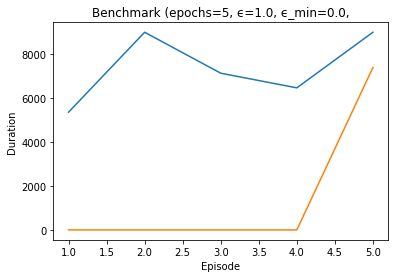

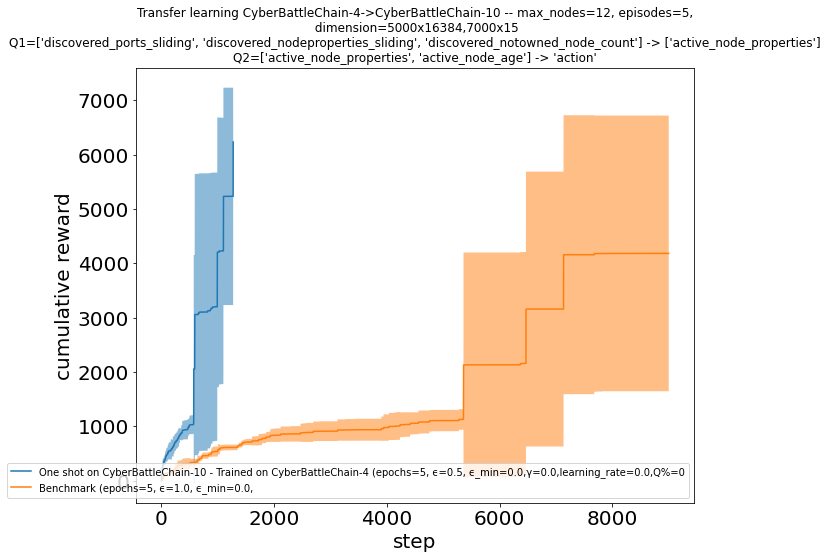

###### One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10
Learning with: episode_count=5,iteration_count=9000,ϵ=0.5,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=0
  ## Episode: 1/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  109.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  111.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  111.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  113.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  113.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  119.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  119.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  125.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  125.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  134.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  134.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  234.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  234.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  243.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  243.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:  343.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:  343.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  345.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  345.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  351.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  351.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:  353.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:  353.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 53|reward:  359.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 53|reward:  359.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  367.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  367.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  373.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  373.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 84|reward:  379.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 84|reward:  379.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  379.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 1|Iteration 123|reward:  388.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 1|Iteration 123|reward:  388.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 1|Iteration 125|reward:  488.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 1|Iteration 125|reward:  488.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 1|Iteration 134|reward:  497.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 1|Iteration 134|reward:  497.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 1|Iteration 135|reward: 5497.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 1|Iteration 135|reward: 5497.0|last_reward_at:  135|Elapsed Time: 0:00:00||

  Episode 1 ended at t=135 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/20 (0.17)
    explore-remote: 7/21 (0.25)
    explore-connect: 0/41 (0.00)
    exploit-local: 4/24 (0.14)
    exploit-remote: 1/8 (0.11)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 37
  ## Episode: 2/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  111.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  122.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  122.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  222.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  222.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  228.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  228.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  234.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  234.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  240.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  240.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  249.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  249.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  349.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  349.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:  355.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward:  355.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  357.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  357.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 52|reward:  366.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 52|reward:  366.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  466.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  466.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  472.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  472.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 68|reward:  478.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 68|reward:  478.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 2|Iteration 90|reward:  484.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 2|Iteration 90|reward:  484.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 2|Iteration 92|reward:  486.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 2|Iteration 92|reward:  486.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  486.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 2|Iteration 130|reward:  495.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 2|Iteration 130|reward:  495.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 2|Iteration 133|reward: 5495.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 2|Iteration 133|reward: 5495.0|last_reward_at:  133|Elapsed Time: 0:00:00||

  Episode 2 ended at t=133 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/22 (0.15)
    explore-remote: 7/30 (0.19)
    explore-connect: 0/31 (0.00)
    exploit-local: 4/25 (0.14)
    exploit-remote: 1/4 (0.20)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 27
  ## Episode: 3/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:    9.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  109.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  109.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  111.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  111.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  120.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  120.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:  220.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:  220.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  222.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  222.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  231.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  231.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 45|reward:  237.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 45|reward:  237.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  337.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  337.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  339.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  339.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward:  341.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward:  341.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 3|Iteration 68|reward:  347.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 3|Iteration 68|reward:  347.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:  353.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:  353.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 3|Iteration 81|reward:  359.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 3|Iteration 81|reward:  359.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 3|Iteration 95|reward:  365.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 3|Iteration 95|reward:  365.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  365.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 3|Iteration 143|reward:  373.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 3|Iteration 143|reward:  373.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 3|Iteration 182|reward:  373.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 3|Iteration 197|reward:  379.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 3|Iteration 197|reward:  379.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  379.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 3|Iteration 265|reward:  379.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 3|Iteration 298|reward:  379.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 3|Iteration 336|reward:  379.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 3|Iteration 373|reward:  379.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 3|Iteration 413|reward:  379.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 3|Iteration 432|reward:  388.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 3|Iteration 432|reward:  388.0|last_reward_at:  432|Elapsed Time: 0:00:01||

Episode 3|Iteration 433|reward:  488.0|last_reward_at:  432|Elapsed Time: 0:00:01||

Episode 3|Iteration 433|reward:  488.0|last_reward_at:  433|Elapsed Time: 0:00:01||

Episode 3|Iteration 456|reward:  488.0|last_reward_at:  433|Elapsed Time: 0:00:01||

Episode 3|Iteration 457|reward:  494.0|last_reward_at:  433|Elapsed Time: 0:00:01||

Episode 3|Iteration 457|reward:  494.0|last_reward_at:  457|Elapsed Time: 0:00:01||

Episode 3|Iteration 481|reward:  503.0|last_reward_at:  457|Elapsed Time: 0:00:01||

Episode 3|Iteration 481|reward:  503.0|last_reward_at:  481|Elapsed Time: 0:00:01||

Episode 3|Iteration 483|reward: 5503.0|last_reward_at:  481|Elapsed Time: 0:00:01||

Episode 3|Iteration 483|reward: 5503.0|last_reward_at:  483|Elapsed Time: 0:00:01||

  Episode 3 ended at t=483 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/68 (0.08)
    explore-remote: 8/145 (0.05)
    explore-connect: 0/141 (0.00)
    exploit-local: 3/71 (0.04)
    exploit-remote: 0/36 (0.00)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 136
  ## Episode: 4/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  121.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  121.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  130.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  230.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  230.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  239.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  239.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  241.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  241.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  341.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  341.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  343.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  343.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:  345.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:  345.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  354.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  354.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  360.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  360.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  460.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  460.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 39|reward:  466.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 39|reward:  466.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:  468.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:  468.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 4|Iteration 48|reward:  474.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 4|Iteration 48|reward:  474.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  480.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  480.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 73|reward:  486.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 73|reward:  486.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 4|Iteration 106|reward:  495.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 4|Iteration 106|reward:  495.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 4|Iteration 107|reward: 5495.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 4|Iteration 107|reward: 5495.0|last_reward_at:  107|Elapsed Time: 0:00:00||

  Episode 4 ended at t=107 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/16 (0.24)
    explore-remote: 5/20 (0.20)
    explore-connect: 0/32 (0.00)
    exploit-local: 4/11 (0.27)
    exploit-remote: 2/7 (0.22)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 30
  ## Episode: 5/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  109.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  115.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  115.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  121.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  121.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  123.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  123.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  132.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  132.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  232.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  232.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  234.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  234.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  240.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  240.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  249.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  249.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward:  251.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward:  251.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  351.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  351.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:  353.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:  353.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 71|reward:  359.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 71|reward:  359.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 5|Iteration 97|reward:  365.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 5|Iteration 97|reward:  365.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 5|Iteration 104|reward:  371.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 5|Iteration 104|reward:  371.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 5|Iteration 135|reward:  379.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 5|Iteration 135|reward:  379.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 5|Iteration 174|reward:  379.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 5|Iteration 210|reward:  379.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 5|Iteration 214|reward:  388.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 5|Iteration 214|reward:  388.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 5|Iteration 216|reward:  488.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 5|Iteration 216|reward:  488.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 5|Iteration 229|reward:  497.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 5|Iteration 229|reward:  497.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 5|Iteration 231|reward: 5497.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 5|Iteration 231|reward: 5497.0|last_reward_at:  231|Elapsed Time: 0:00:00||

  Episode 5 ended at t=231 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/31 (0.09)
    explore-remote: 8/71 (0.10)
    explore-connect: 0/61 (0.00)
    exploit-local: 5/36 (0.12)
    exploit-remote: 0/11 (0.00)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 52
simulation ended


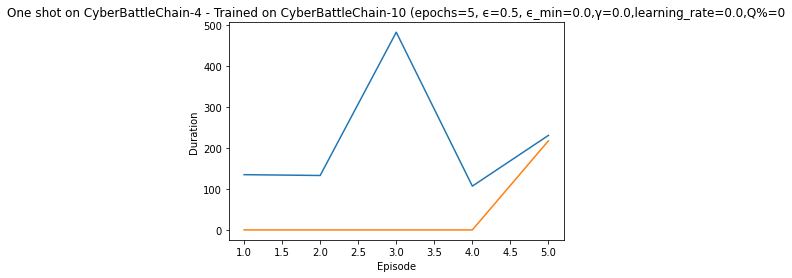

###### Benchmark
Learning with: episode_count=5,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/5 'Benchmark' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   13.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   15.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   15.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 50|reward:  115.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 50|reward:  115.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 1|Iteration 52|reward:  121.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 1|Iteration 52|reward:  121.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  129.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  129.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 60|reward:  138.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 60|reward:  138.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 1|Iteration 86|reward:  144.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 1|Iteration 86|reward:  144.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 1|Iteration 191|reward:  144.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 1|Iteration 291|reward:  144.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 1|Iteration 342|reward:  144.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 1|Iteration 386|reward:  244.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 1|Iteration 386|reward:  244.0|last_reward_at:  386|Elapsed Time: 0:00:00||

Episode 1|Iteration 389|reward:  250.0|last_reward_at:  386|Elapsed Time: 0:00:00||

Episode 1|Iteration 389|reward:  250.0|last_reward_at:  389|Elapsed Time: 0:00:00||

Episode 1|Iteration 393|reward:  252.0|last_reward_at:  389|Elapsed Time: 0:00:00||

Episode 1|Iteration 393|reward:  252.0|last_reward_at:  393|Elapsed Time: 0:00:00||

Episode 1|Iteration 436|reward:  256.0|last_reward_at:  393|Elapsed Time: 0:00:00||

Episode 1|Iteration 436|reward:  256.0|last_reward_at:  436|Elapsed Time: 0:00:00||

Episode 1|Iteration 485|reward:  265.0|last_reward_at:  436|Elapsed Time: 0:00:00||

Episode 1|Iteration 485|reward:  265.0|last_reward_at:  485|Elapsed Time: 0:00:00||

Episode 1|Iteration 566|reward:  265.0|last_reward_at:  485|Elapsed Time: 0:00:00||

Episode 1|Iteration 626|reward:  365.0|last_reward_at:  485|Elapsed Time: 0:00:00||

Episode 1|Iteration 626|reward:  365.0|last_reward_at:  626|Elapsed Time: 0:00:00||

Episode 1|Iteration 684|reward:  365.0|last_reward_at:  626|Elapsed Time: 0:00:00||

Episode 1|Iteration 727|reward:  371.0|last_reward_at:  626|Elapsed Time: 0:00:00||

Episode 1|Iteration 727|reward:  371.0|last_reward_at:  727|Elapsed Time: 0:00:00||

Episode 1|Iteration 729|reward:  380.0|last_reward_at:  727|Elapsed Time: 0:00:00||

Episode 1|Iteration 729|reward:  380.0|last_reward_at:  729|Elapsed Time: 0:00:00||

Episode 1|Iteration 735|reward:  388.0|last_reward_at:  729|Elapsed Time: 0:00:00||

Episode 1|Iteration 735|reward:  388.0|last_reward_at:  735|Elapsed Time: 0:00:00||

Episode 1|Iteration 746|reward:  488.0|last_reward_at:  735|Elapsed Time: 0:00:00||

Episode 1|Iteration 746|reward:  488.0|last_reward_at:  746|Elapsed Time: 0:00:00||

Episode 1|Iteration 750|reward:  494.0|last_reward_at:  746|Elapsed Time: 0:00:00||

Episode 1|Iteration 750|reward:  494.0|last_reward_at:  750|Elapsed Time: 0:00:00||

Episode 1|Iteration 773|reward:  503.0|last_reward_at:  750|Elapsed Time: 0:00:00||

Episode 1|Iteration 773|reward:  503.0|last_reward_at:  773|Elapsed Time: 0:00:00||

Episode 1|Iteration 801|reward:  509.0|last_reward_at:  773|Elapsed Time: 0:00:00||

Episode 1|Iteration 801|reward:  509.0|last_reward_at:  801|Elapsed Time: 0:00:00||

Episode 1|Iteration 868|reward:  509.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 912|reward:  509.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 979|reward:  509.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1026|reward:  509.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1095|reward:  509.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1140|reward:  509.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1210|reward:  509.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1254|reward:  509.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1324|reward:  509.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1368|reward:  509.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1432|reward:  509.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1482|reward:  509.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1548|reward:  509.0|last_reward_at:  801|Elapsed Time: 0:00:02||

Episode 1|Iteration 1595|reward:  509.0|last_reward_at:  801|Elapsed Time: 0:00:02||

Episode 1|Iteration 1663|reward:  509.0|last_reward_at:  801|Elapsed Time: 0:00:02||

Episode 1|Iteration 1705|reward: 5509.0|last_reward_at:  801|Elapsed Time: 0:00:02||

Episode 1|Iteration 1705|reward: 5509.0|last_reward_at: 1705|Elapsed Time: 0:00:02||

  Episode 1 ended at t=1705 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/439 (0.02)
    explore-remote: 8/628 (0.01)
    explore-connect: 5/616 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Benchmark' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:    9.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:   13.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:   13.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:   15.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:   15.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  115.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  115.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 80|reward:  121.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 80|reward:  121.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  130.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  130.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 112|reward:  230.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 112|reward:  230.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 2|Iteration 128|reward:  236.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 2|Iteration 128|reward:  236.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 2|Iteration 134|reward:  242.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 2|Iteration 134|reward:  242.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 2|Iteration 181|reward:  248.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 2|Iteration 181|reward:  248.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 2|Iteration 204|reward:  250.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 2|Iteration 204|reward:  250.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 2|Iteration 214|reward:  259.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 2|Iteration 214|reward:  259.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 2|Iteration 241|reward:  263.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 2|Iteration 241|reward:  263.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 2|Iteration 332|reward:  263.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 2|Iteration 426|reward:  263.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 2|Iteration 492|reward:  263.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 2|Iteration 570|reward:  263.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 2|Iteration 658|reward:  263.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 2|Iteration 750|reward:  263.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 2|Iteration 798|reward:  263.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 2|Iteration 887|reward:  263.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 2|Iteration 977|reward:  263.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 2|Iteration 1026|reward:  263.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 2|Iteration 1047|reward:  363.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 2|Iteration 1047|reward:  363.0|last_reward_at: 1047|Elapsed Time: 0:00:01||

Episode 2|Iteration 1079|reward:  372.0|last_reward_at: 1047|Elapsed Time: 0:00:01||

Episode 2|Iteration 1079|reward:  372.0|last_reward_at: 1079|Elapsed Time: 0:00:01||

Episode 2|Iteration 1086|reward:  378.0|last_reward_at: 1079|Elapsed Time: 0:00:01||

Episode 2|Iteration 1086|reward:  378.0|last_reward_at: 1086|Elapsed Time: 0:00:01||

Episode 2|Iteration 1114|reward:  386.0|last_reward_at: 1086|Elapsed Time: 0:00:01||

Episode 2|Iteration 1114|reward:  386.0|last_reward_at: 1114|Elapsed Time: 0:00:01||

Episode 2|Iteration 1131|reward:  392.0|last_reward_at: 1114|Elapsed Time: 0:00:01||

Episode 2|Iteration 1131|reward:  392.0|last_reward_at: 1131|Elapsed Time: 0:00:01||

Episode 2|Iteration 1211|reward:  392.0|last_reward_at: 1131|Elapsed Time: 0:00:01||

Episode 2|Iteration 1254|reward:  392.0|last_reward_at: 1131|Elapsed Time: 0:00:01||

Episode 2|Iteration 1308|reward:  392.0|last_reward_at: 1131|Elapsed Time: 0:00:01||

Episode 2|Iteration 1361|reward:  492.0|last_reward_at: 1131|Elapsed Time: 0:00:01||

Episode 2|Iteration 1361|reward:  492.0|last_reward_at: 1361|Elapsed Time: 0:00:01||

Episode 2|Iteration 1382|reward:  501.0|last_reward_at: 1361|Elapsed Time: 0:00:01||

Episode 2|Iteration 1382|reward:  501.0|last_reward_at: 1382|Elapsed Time: 0:00:01||

Episode 2|Iteration 1452|reward:  501.0|last_reward_at: 1382|Elapsed Time: 0:00:01||

Episode 2|Iteration 1519|reward:  507.0|last_reward_at: 1382|Elapsed Time: 0:00:01||

Episode 2|Iteration 1519|reward:  507.0|last_reward_at: 1519|Elapsed Time: 0:00:01||

Episode 2|Iteration 1588|reward:  507.0|last_reward_at: 1519|Elapsed Time: 0:00:01||

Episode 2|Iteration 1654|reward:  507.0|last_reward_at: 1519|Elapsed Time: 0:00:02||

Episode 2|Iteration 1709|reward:  507.0|last_reward_at: 1519|Elapsed Time: 0:00:02||

Episode 2|Iteration 1773|reward:  507.0|last_reward_at: 1519|Elapsed Time: 0:00:02||

Episode 2|Iteration 1823|reward:  507.0|last_reward_at: 1519|Elapsed Time: 0:00:02||

Episode 2|Iteration 1891|reward:  507.0|last_reward_at: 1519|Elapsed Time: 0:00:02||

Episode 2|Iteration 1937|reward:  507.0|last_reward_at: 1519|Elapsed Time: 0:00:02||

Episode 2|Iteration 2006|reward:  507.0|last_reward_at: 1519|Elapsed Time: 0:00:02||

Episode 2|Iteration 2051|reward:  507.0|last_reward_at: 1519|Elapsed Time: 0:00:02||

Episode 2|Iteration 2120|reward:  507.0|last_reward_at: 1519|Elapsed Time: 0:00:02||

Episode 2|Iteration 2165|reward:  507.0|last_reward_at: 1519|Elapsed Time: 0:00:02||

Episode 2|Iteration 2224|reward: 5507.0|last_reward_at: 1519|Elapsed Time: 0:00:02||

Episode 2|Iteration 2224|reward: 5507.0|last_reward_at: 2224|Elapsed Time: 0:00:02||

  Episode 2 ended at t=2224 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/549 (0.02)
    explore-remote: 8/834 (0.01)
    explore-connect: 5/819 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Benchmark' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:   15.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  115.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  115.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  121.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  121.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  130.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  130.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  138.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  138.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 83|reward:  144.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 83|reward:  144.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 3|Iteration 187|reward:  144.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 3|Iteration 239|reward:  244.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 3|Iteration 239|reward:  244.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 3|Iteration 251|reward:  253.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 3|Iteration 251|reward:  253.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 3|Iteration 256|reward:  257.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 3|Iteration 256|reward:  257.0|last_reward_at:  256|Elapsed Time: 0:00:00||

Episode 3|Iteration 277|reward:  259.0|last_reward_at:  256|Elapsed Time: 0:00:00||

Episode 3|Iteration 277|reward:  259.0|last_reward_at:  277|Elapsed Time: 0:00:00||

Episode 3|Iteration 296|reward:  265.0|last_reward_at:  277|Elapsed Time: 0:00:00||

Episode 3|Iteration 296|reward:  265.0|last_reward_at:  296|Elapsed Time: 0:00:00||

Episode 3|Iteration 307|reward:  365.0|last_reward_at:  296|Elapsed Time: 0:00:00||

Episode 3|Iteration 307|reward:  365.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 3|Iteration 394|reward:  374.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 3|Iteration 394|reward:  374.0|last_reward_at:  394|Elapsed Time: 0:00:00||

Episode 3|Iteration 398|reward:  382.0|last_reward_at:  394|Elapsed Time: 0:00:00||

Episode 3|Iteration 398|reward:  382.0|last_reward_at:  398|Elapsed Time: 0:00:00||

Episode 3|Iteration 409|reward:  388.0|last_reward_at:  398|Elapsed Time: 0:00:00||

Episode 3|Iteration 409|reward:  388.0|last_reward_at:  409|Elapsed Time: 0:00:00||

Episode 3|Iteration 429|reward:  488.0|last_reward_at:  409|Elapsed Time: 0:00:00||

Episode 3|Iteration 429|reward:  488.0|last_reward_at:  429|Elapsed Time: 0:00:00||

Episode 3|Iteration 436|reward:  494.0|last_reward_at:  429|Elapsed Time: 0:00:00||

Episode 3|Iteration 436|reward:  494.0|last_reward_at:  436|Elapsed Time: 0:00:00||

Episode 3|Iteration 458|reward:  503.0|last_reward_at:  436|Elapsed Time: 0:00:00||

Episode 3|Iteration 458|reward:  503.0|last_reward_at:  458|Elapsed Time: 0:00:00||

Episode 3|Iteration 528|reward:  503.0|last_reward_at:  458|Elapsed Time: 0:00:00||

Episode 3|Iteration 570|reward:  503.0|last_reward_at:  458|Elapsed Time: 0:00:00||

Episode 3|Iteration 571|reward:  509.0|last_reward_at:  458|Elapsed Time: 0:00:00||

Episode 3|Iteration 571|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:00||

Episode 3|Iteration 631|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:00||

Episode 3|Iteration 684|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:00||

Episode 3|Iteration 750|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 3|Iteration 798|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 3|Iteration 863|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 3|Iteration 912|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 3|Iteration 977|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 3|Iteration 1026|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 3|Iteration 1094|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 3|Iteration 1140|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 3|Iteration 1201|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 3|Iteration 1254|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 3|Iteration 1323|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 3|Iteration 1368|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:01||

Episode 3|Iteration 1434|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 3|Iteration 1482|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 3|Iteration 1552|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 3|Iteration 1595|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 3|Iteration 1664|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 3|Iteration 1709|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 3|Iteration 1777|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 3|Iteration 1823|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 3|Iteration 1875|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 3|Iteration 1937|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 3|Iteration 2004|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 3|Iteration 2051|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 3|Iteration 2114|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:03||

Episode 3|Iteration 2165|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:03||

Episode 3|Iteration 2227|reward:  509.0|last_reward_at:  571|Elapsed Time: 0:00:03||

Episode 3|Iteration 2230|reward: 5509.0|last_reward_at:  571|Elapsed Time: 0:00:03||

Episode 3|Iteration 2230|reward: 5509.0|last_reward_at: 2230|Elapsed Time: 0:00:03||

  Episode 3 ended at t=2230 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/581 (0.02)
    explore-remote: 8/804 (0.01)
    explore-connect: 5/823 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Benchmark' ϵ=1.0000, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  111.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  111.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  120.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  120.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  122.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  122.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  128.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  128.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  136.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  136.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  142.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  142.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  142.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 214|reward:  142.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 309|reward:  142.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 402|reward:  142.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 420|reward:  242.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 420|reward:  242.0|last_reward_at:  420|Elapsed Time: 0:00:00||

Episode 4|Iteration 435|reward:  248.0|last_reward_at:  420|Elapsed Time: 0:00:00||

Episode 4|Iteration 435|reward:  248.0|last_reward_at:  435|Elapsed Time: 0:00:00||

Episode 4|Iteration 441|reward:  252.0|last_reward_at:  435|Elapsed Time: 0:00:00||

Episode 4|Iteration 441|reward:  252.0|last_reward_at:  441|Elapsed Time: 0:00:00||

Episode 4|Iteration 449|reward:  254.0|last_reward_at:  441|Elapsed Time: 0:00:00||

Episode 4|Iteration 449|reward:  254.0|last_reward_at:  449|Elapsed Time: 0:00:00||

Episode 4|Iteration 493|reward:  263.0|last_reward_at:  449|Elapsed Time: 0:00:00||

Episode 4|Iteration 493|reward:  263.0|last_reward_at:  493|Elapsed Time: 0:00:00||

Episode 4|Iteration 570|reward:  263.0|last_reward_at:  493|Elapsed Time: 0:00:00||

Episode 4|Iteration 639|reward:  363.0|last_reward_at:  493|Elapsed Time: 0:00:00||

Episode 4|Iteration 639|reward:  363.0|last_reward_at:  639|Elapsed Time: 0:00:00||

Episode 4|Iteration 645|reward:  372.0|last_reward_at:  639|Elapsed Time: 0:00:00||

Episode 4|Iteration 645|reward:  372.0|last_reward_at:  645|Elapsed Time: 0:00:00||

Episode 4|Iteration 662|reward:  380.0|last_reward_at:  645|Elapsed Time: 0:00:00||

Episode 4|Iteration 662|reward:  380.0|last_reward_at:  662|Elapsed Time: 0:00:00||

Episode 4|Iteration 715|reward:  386.0|last_reward_at:  662|Elapsed Time: 0:00:00||

Episode 4|Iteration 715|reward:  386.0|last_reward_at:  715|Elapsed Time: 0:00:00||

Episode 4|Iteration 768|reward:  392.0|last_reward_at:  715|Elapsed Time: 0:00:00||

Episode 4|Iteration 768|reward:  392.0|last_reward_at:  768|Elapsed Time: 0:00:00||

Episode 4|Iteration 848|reward:  392.0|last_reward_at:  768|Elapsed Time: 0:00:01||

Episode 4|Iteration 912|reward:  392.0|last_reward_at:  768|Elapsed Time: 0:00:01||

Episode 4|Iteration 989|reward:  392.0|last_reward_at:  768|Elapsed Time: 0:00:01||

Episode 4|Iteration 1026|reward:  392.0|last_reward_at:  768|Elapsed Time: 0:00:01||

Episode 4|Iteration 1104|reward:  392.0|last_reward_at:  768|Elapsed Time: 0:00:01||

Episode 4|Iteration 1182|reward:  392.0|last_reward_at:  768|Elapsed Time: 0:00:01||

Episode 4|Iteration 1254|reward:  392.0|last_reward_at:  768|Elapsed Time: 0:00:01||

Episode 4|Iteration 1328|reward:  392.0|last_reward_at:  768|Elapsed Time: 0:00:01||

Episode 4|Iteration 1368|reward:  392.0|last_reward_at:  768|Elapsed Time: 0:00:01||

Episode 4|Iteration 1443|reward:  392.0|last_reward_at:  768|Elapsed Time: 0:00:01||

Episode 4|Iteration 1522|reward:  392.0|last_reward_at:  768|Elapsed Time: 0:00:01||

Episode 4|Iteration 1595|reward:  392.0|last_reward_at:  768|Elapsed Time: 0:00:01||

Episode 4|Iteration 1672|reward:  392.0|last_reward_at:  768|Elapsed Time: 0:00:02||

Episode 4|Iteration 1744|reward:  392.0|last_reward_at:  768|Elapsed Time: 0:00:02||

Episode 4|Iteration 1821|reward:  392.0|last_reward_at:  768|Elapsed Time: 0:00:02||

Episode 4|Iteration 1899|reward:  392.0|last_reward_at:  768|Elapsed Time: 0:00:02||

Episode 4|Iteration 1937|reward:  392.0|last_reward_at:  768|Elapsed Time: 0:00:02||

Episode 4|Iteration 1945|reward:  492.0|last_reward_at:  768|Elapsed Time: 0:00:02||

Episode 4|Iteration 1945|reward:  492.0|last_reward_at: 1945|Elapsed Time: 0:00:02||

Episode 4|Iteration 1963|reward:  498.0|last_reward_at: 1945|Elapsed Time: 0:00:02||

Episode 4|Iteration 1963|reward:  498.0|last_reward_at: 1963|Elapsed Time: 0:00:02||

Episode 4|Iteration 1984|reward:  507.0|last_reward_at: 1963|Elapsed Time: 0:00:02||

Episode 4|Iteration 1984|reward:  507.0|last_reward_at: 1984|Elapsed Time: 0:00:02||

Episode 4|Iteration 2051|reward:  507.0|last_reward_at: 1984|Elapsed Time: 0:00:02||

Episode 4|Iteration 2120|reward:  507.0|last_reward_at: 1984|Elapsed Time: 0:00:02||

Episode 4|Iteration 2165|reward:  507.0|last_reward_at: 1984|Elapsed Time: 0:00:02||

Episode 4|Iteration 2217|reward: 5507.0|last_reward_at: 1984|Elapsed Time: 0:00:02||

Episode 4|Iteration 2217|reward: 5507.0|last_reward_at: 2217|Elapsed Time: 0:00:02||

  Episode 4 ended at t=2217 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/510 (0.02)
    explore-remote: 8/821 (0.01)
    explore-connect: 5/864 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Benchmark' ϵ=1.0000, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  109.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  111.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  111.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  113.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  113.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:  122.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:  122.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  128.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  128.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  136.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  136.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:  142.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:  142.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 130|reward:  242.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 130|reward:  242.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 5|Iteration 134|reward:  251.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 5|Iteration 134|reward:  251.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 5|Iteration 141|reward:  257.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 5|Iteration 141|reward:  257.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 5|Iteration 148|reward:  259.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 5|Iteration 148|reward:  259.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 5|Iteration 214|reward:  263.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 5|Iteration 214|reward:  263.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 5|Iteration 252|reward:  363.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 5|Iteration 252|reward:  363.0|last_reward_at:  252|Elapsed Time: 0:00:00||

Episode 5|Iteration 273|reward:  369.0|last_reward_at:  252|Elapsed Time: 0:00:00||

Episode 5|Iteration 273|reward:  369.0|last_reward_at:  273|Elapsed Time: 0:00:00||

Episode 5|Iteration 285|reward:  377.0|last_reward_at:  273|Elapsed Time: 0:00:00||

Episode 5|Iteration 285|reward:  377.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 5|Iteration 298|reward:  383.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 5|Iteration 298|reward:  383.0|last_reward_at:  298|Elapsed Time: 0:00:00||

Episode 5|Iteration 301|reward:  392.0|last_reward_at:  298|Elapsed Time: 0:00:00||

Episode 5|Iteration 301|reward:  392.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 5|Iteration 342|reward:  392.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 5|Iteration 415|reward:  392.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 5|Iteration 456|reward:  392.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 5|Iteration 521|reward:  392.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 5|Iteration 570|reward:  392.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 5|Iteration 629|reward:  492.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 5|Iteration 629|reward:  492.0|last_reward_at:  629|Elapsed Time: 0:00:00||

Episode 5|Iteration 661|reward:  498.0|last_reward_at:  629|Elapsed Time: 0:00:00||

Episode 5|Iteration 661|reward:  498.0|last_reward_at:  661|Elapsed Time: 0:00:00||

Episode 5|Iteration 663|reward:  507.0|last_reward_at:  661|Elapsed Time: 0:00:00||

Episode 5|Iteration 663|reward:  507.0|last_reward_at:  663|Elapsed Time: 0:00:00||

Episode 5|Iteration 731|reward:  507.0|last_reward_at:  663|Elapsed Time: 0:00:00||

Episode 5|Iteration 798|reward:  507.0|last_reward_at:  663|Elapsed Time: 0:00:01||

Episode 5|Iteration 822|reward: 5507.0|last_reward_at:  663|Elapsed Time: 0:00:01||

Episode 5|Iteration 822|reward: 5507.0|last_reward_at:  822|Elapsed Time: 0:00:01||

  Episode 5 ended at t=822 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/202 (0.04)
    explore-remote: 8/275 (0.03)
    explore-connect: 5/323 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


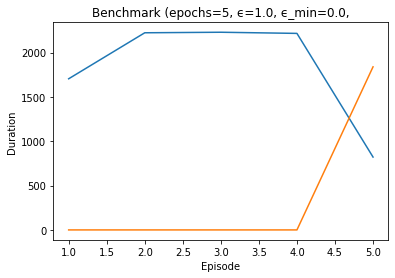

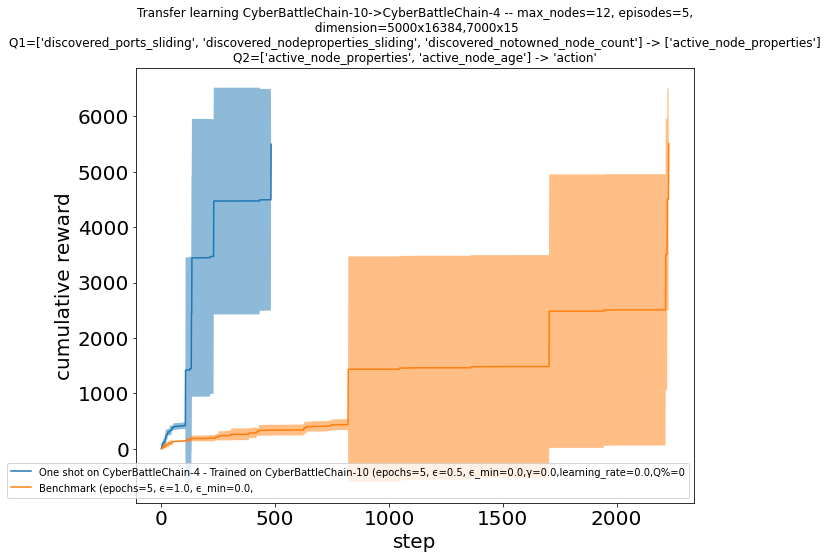

In [14]:
# Train Q-matrix on CyberBattle network of size 4
cyberbattlechain_4 = gym.make('CyberBattleChain-v0', size=4,
                              attacker_goal=AttackerGoal(own_atleast_percent=1.0)
                              )

qlearning_bestrun_4 = qlearning_run(0.015, gym_env=cyberbattlechain_4)


def stop_learning(trained_learner):
    return TrainedLearner(
        learner=a.QTabularLearner(
            ep,
            gamma=0.0,
            learning_rate=0.0,
            exploit_percentile=0,
            trained=trained_learner['learner']
        ),
        title=trained_learner['title'],
        trained_on=trained_learner['trained_on'],
        all_episodes_rewards=trained_learner['all_episodes_rewards'],
        all_episodes_availability=trained_learner['all_episodes_availability']
    )


learner.transfer_learning_evaluation(
    environment_properties=ep,
    trained_learner=stop_learning(qlearning_bestrun_4),
    eval_env=cyberbattlechain_10,
    eval_epsilon=0.5,  # alternate with exploration to help generalization to bigger network
    eval_episode_count=eval_episode_count,
    iteration_count=iteration_count
)

learner.transfer_learning_evaluation(
    environment_properties=ep,
    trained_learner=stop_learning(qlearning_bestrun_10),
    eval_env=cyberbattlechain_4,
    eval_epsilon=0.5,
    eval_episode_count=eval_episode_count,
    iteration_count=iteration_count
)